# init

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # for XGBoost
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 

from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
from catboost                import CatBoostClassifier
from sklearn.linear_model    import LogisticRegression

from sklearn                 import datasets
from sklearn.model_selection import train_test_split
from copy                    import copy
from umap                    import UMAP


In [19]:
# import domestic lib
import ppap.tabular_util   as ppap_tab_ut
import ppap.tabular_2class as ppap_tab_2c

import importlib
importlib.reload(ppap_tab_ut)
importlib.reload(ppap_tab_2c)


<module 'ppap.tabular_2class' from '/Users/mucunwuxian/MICIN/20190705_houken_and_PPAP/PPAP/ppap/tabular_2class.py'>

# Pre-Process

In [4]:
# load sample data from sklearn
breast_cancer_data = datasets.load_breast_cancer()
column_name        = breast_cancer_data.feature_names

# prepare X and y
X = breast_cancer_data.data
y = breast_cancer_data.target

# print size of X and y
print('np.shape(X) = (%d, %d)' % np.shape(X))
print('np.shape(y) = (%d)'     % np.shape(y))


np.shape(X) = (569, 30)
np.shape(y) = (569)


In [5]:
# [STEP 1]
# check nan ratio (vertical)
print('check for X')
ppap_tab_ut.check_nan_ratio_vert(X           = X, 
                                 column_name = column_name)
print('')

print('check for y')
ppap_tab_ut.check_nan_ratio_vert(X           = y, 
                                 column_name = 'target')


check for X

include nan column is ...

------------------------------------------------------------
nan is not exist. check OK!

check for y

include nan column is ...

------------------------------------------------------------
nan is not exist. check OK!


array([0.])

In [6]:
# [STEP 2]
# check nan ratio (horizontal)
print('check for X')
ppap_tab_ut.check_nan_ratio_horz(X = X)
print('')


check for X
nan is not exist. check OK!



In [7]:
# [STEP 3-1]
# value state check (of X)
ppap_tab_ut.check_value_count(X           = X, 
                              column_name = column_name)



numeric ratio is ...

------------------------------------------------------------
  - mean radius -> 1.00000
  - mean texture -> 1.00000
  - mean perimeter -> 1.00000
  - mean area -> 1.00000
  - mean smoothness -> 1.00000
  - mean compactness -> 1.00000
  - mean concavity -> 1.00000
  - mean concave points -> 1.00000
  - mean symmetry -> 1.00000
  - mean fractal dimension -> 1.00000
  - radius error -> 1.00000
  - texture error -> 1.00000
  - perimeter error -> 1.00000
  - area error -> 1.00000
  - smoothness error -> 1.00000
  - compactness error -> 1.00000
  - concavity error -> 1.00000
  - concave points error -> 1.00000
  - symmetry error -> 1.00000
  - fractal dimension error -> 1.00000
  - worst radius -> 1.00000
  - worst texture -> 1.00000
  - worst perimeter -> 1.00000
  - worst area -> 1.00000
  - worst smoothness -> 1.00000
  - worst compactness -> 1.00000
  - worst concavity -> 1.00000
  - worst concave points -> 1.00000
  - worst symmetry -> 1.00000
  - worst fractal di

0.1717    4
0.1601    4
0.1714    4
0.1769    4
0.1893    4
0.1885    3
0.1720    3
0.1487    3
0.1861    3
0.1943    3
0.1925    3
0.1779    3
0.1590    3
0.1953    3
0.1506    3
0.1739    3
0.1467    3
0.1966    3
0.1619    3
0.1667    3
0.2116    3
0.1669    3
0.1516    3
0.1638    3
0.1735    3
0.1809    3
0.1930    3
0.1555    2
0.1598    2
0.1847    2
         ..
0.1929    1
0.1688    1
0.1811    1
0.2595    1
0.1806    1
0.1944    1
0.1526    1
0.2108    1
0.1661    1
0.1652    1
0.1726    1
0.1703    1
0.1971    1
0.2123    1
0.2252    1
0.1574    1
0.1365    1
0.1546    1
0.1399    1
0.1802    1
0.2419    1
0.1936    1
0.2330    1
0.1908    1
0.1823    1
0.2079    1
0.1671    1
0.2127    1
0.1633    1
0.2197    1
Length: 432, dtype: int64

------------------------------------------------------------
[mean fractal dimension]
0.05667    3
0.05907    3
0.06782    3
0.05913    3
0.06113    3
0.07005    2
0.05955    2
0.06612    2
0.06317    2
0.06235    2
0.05669    2
0.05898    2

In [8]:
# [STEP 3-2]
# value state check (of y)
ppap_tab_ut.check_value_count(X           = y, 
                              column_name = 'target_name')



numeric ratio is ...

------------------------------------------------------------
  - target_name -> 1.00000



value pattern is ...

------------------------------------------------------------
[target_name]
1    357
0    212
dtype: int64


In [9]:
# [STEP 4]
# organize data

# before
print('\nbefore organize shape is (%d, %d)' % np.shape(X))

# exec
X = ppap_tab_ut.organize_data(X           = X, 
                              column_name = column_name)

# after
print('\nafter organize shape is (%d, %d)' % np.shape(X))

# for visualize
df_X_tmp = pd.DataFrame(X, columns=column_name)
df_X_tmp.head(10)



before organize shape is (569, 30)

delete one-pattern column...
  - none ...

delete overlap column...
  - none ...

after organize shape is (569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   
6                 0.05742  ...         22.88          27.66           153.20   
7                 0.07451  ...         17.06          28.14           110.60   
8                 0.07389  ...         15.49          30.73           106.20   
9                 0.08243  ...         15.09          40.68            97.65   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9      

Total data num    :    569件
Positive data num :    357件 (62.74%)
Negative data num :    212件 (37.26%)


leakage check


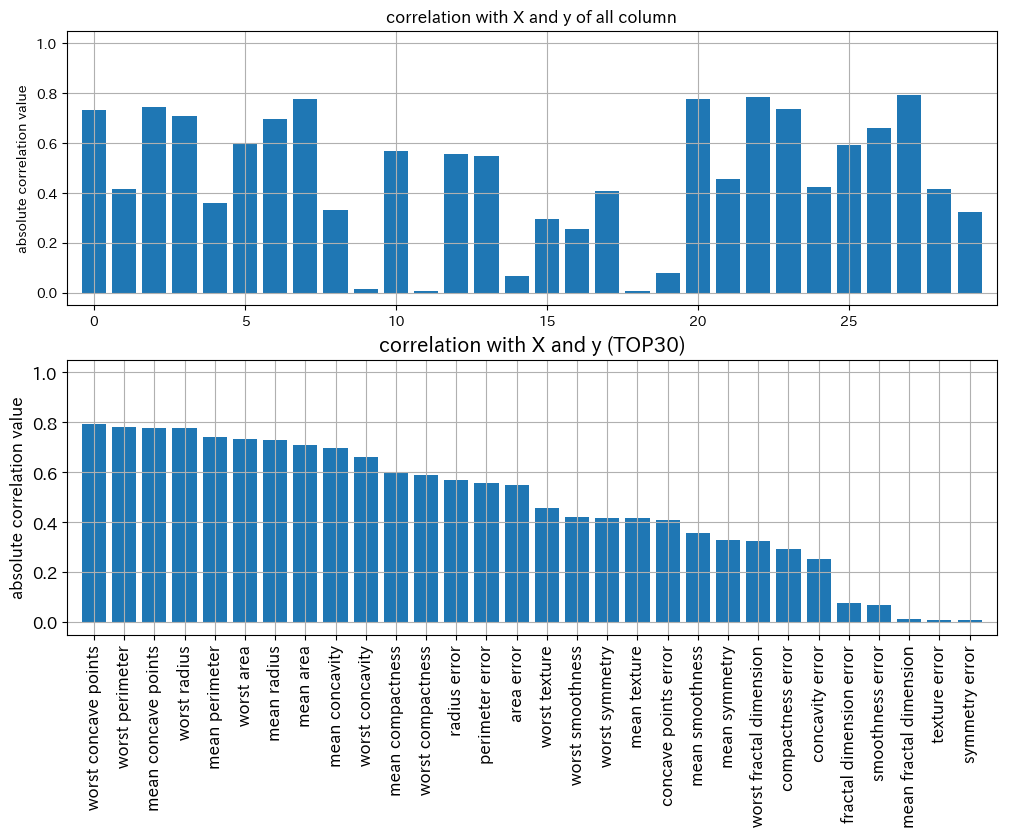



cross plot
(high corr TOP10)
---------------------------------------------
[27]


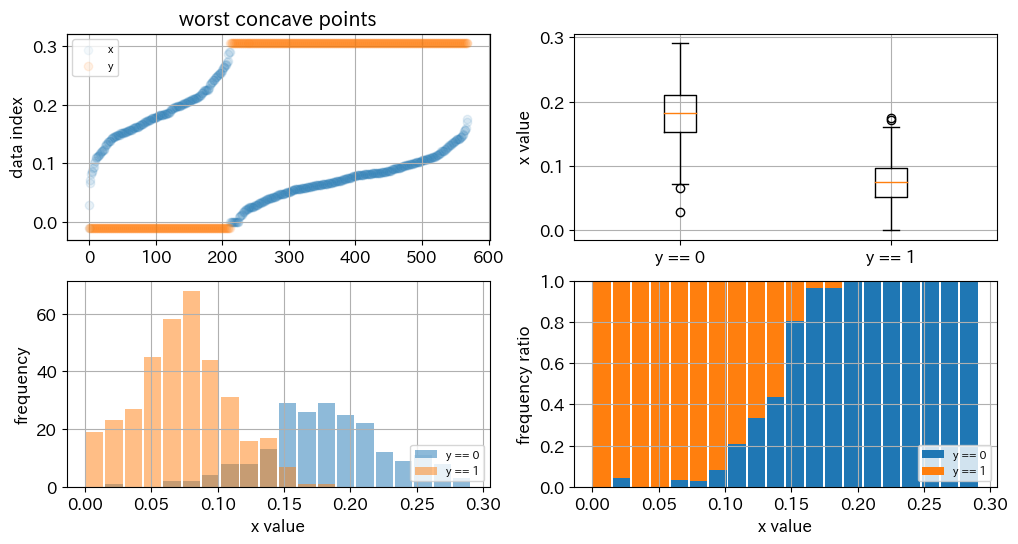



---------------------------------------------
[22]


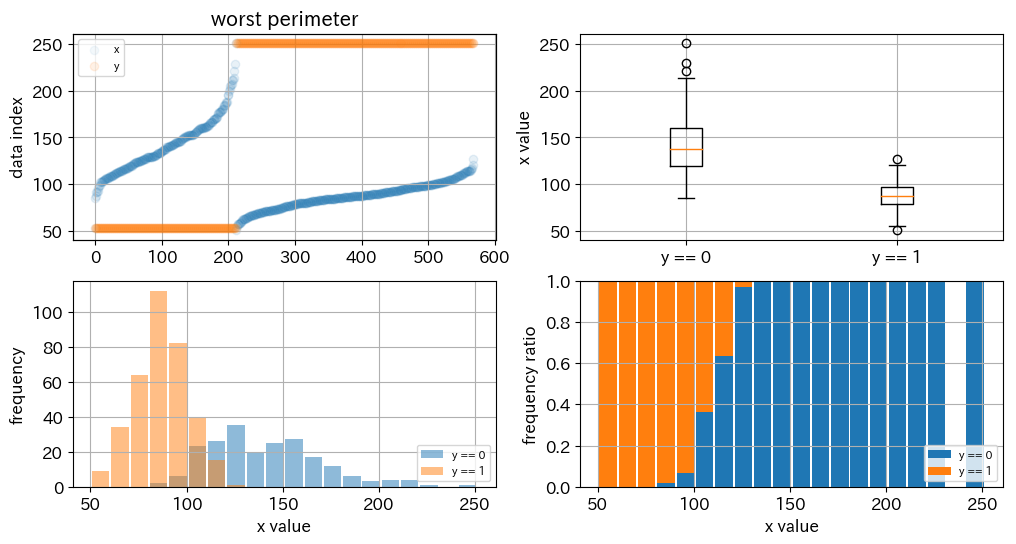



---------------------------------------------
[7]


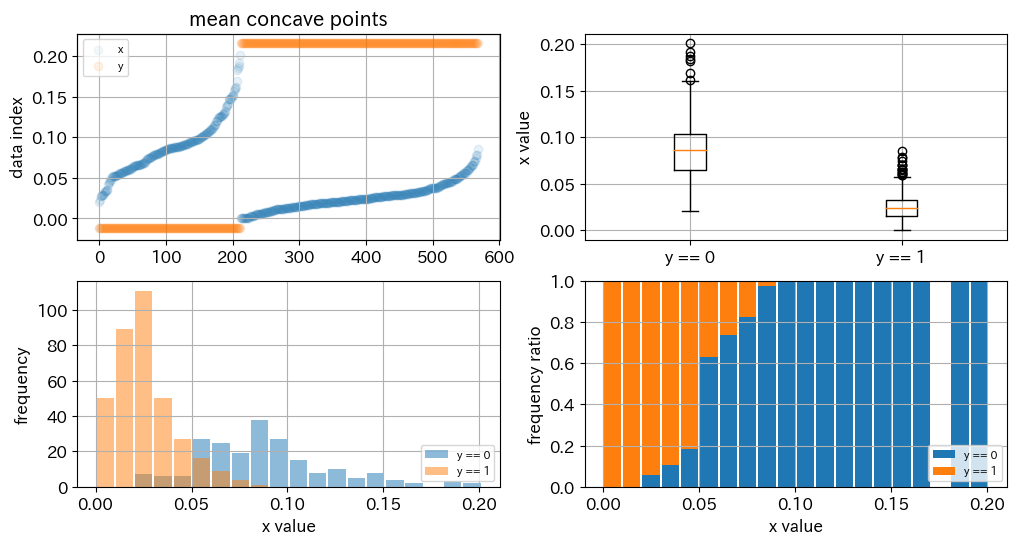



---------------------------------------------
[20]


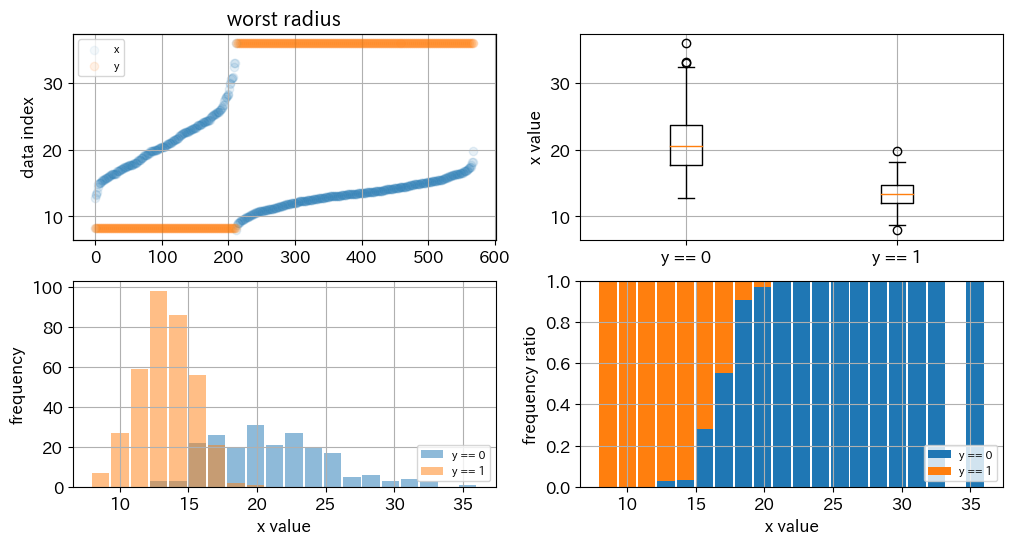



---------------------------------------------
[2]


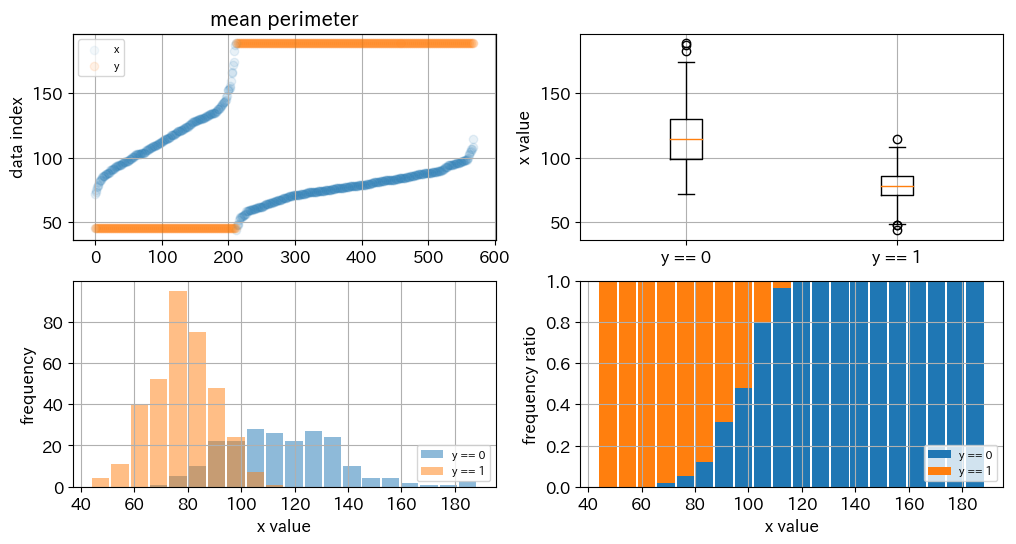



---------------------------------------------
[23]


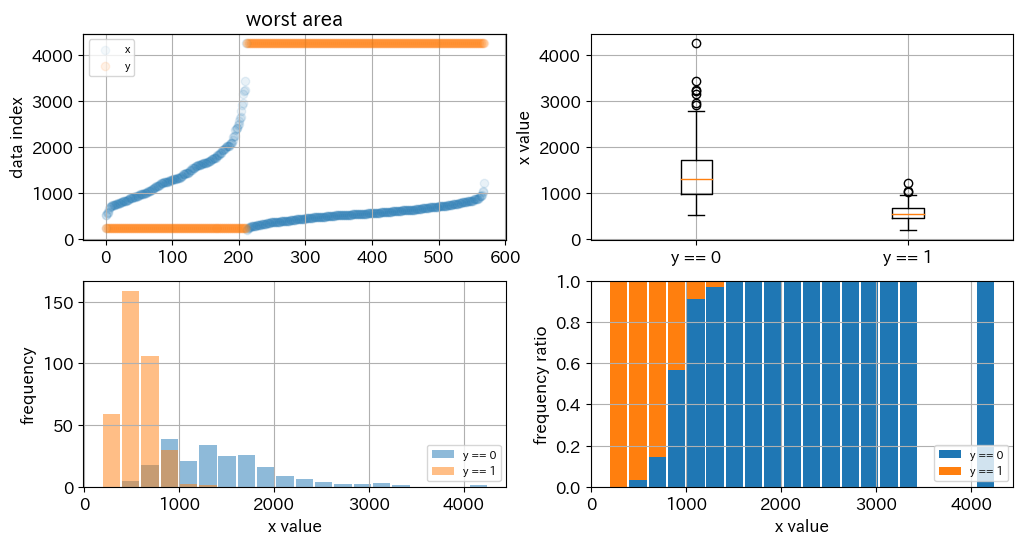



---------------------------------------------
[0]


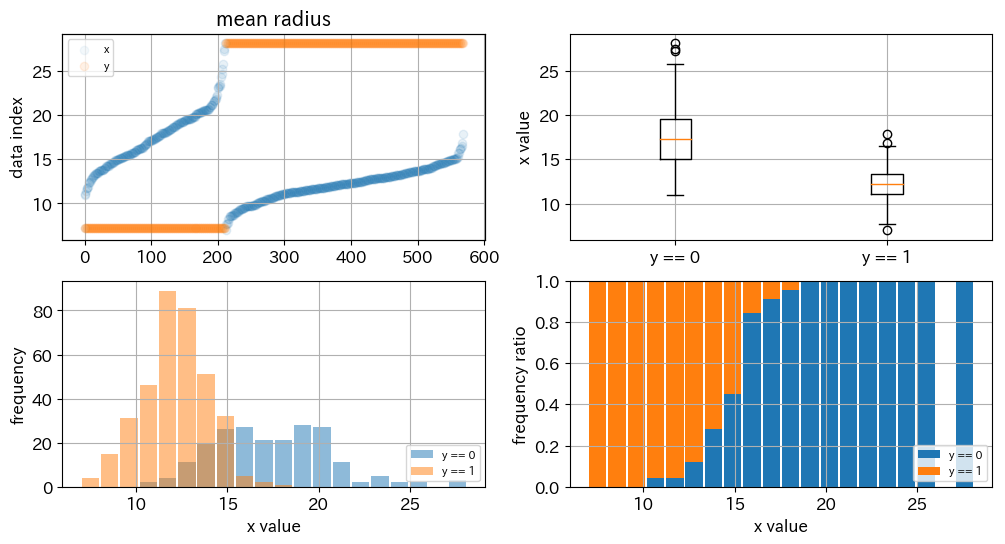



---------------------------------------------
[3]


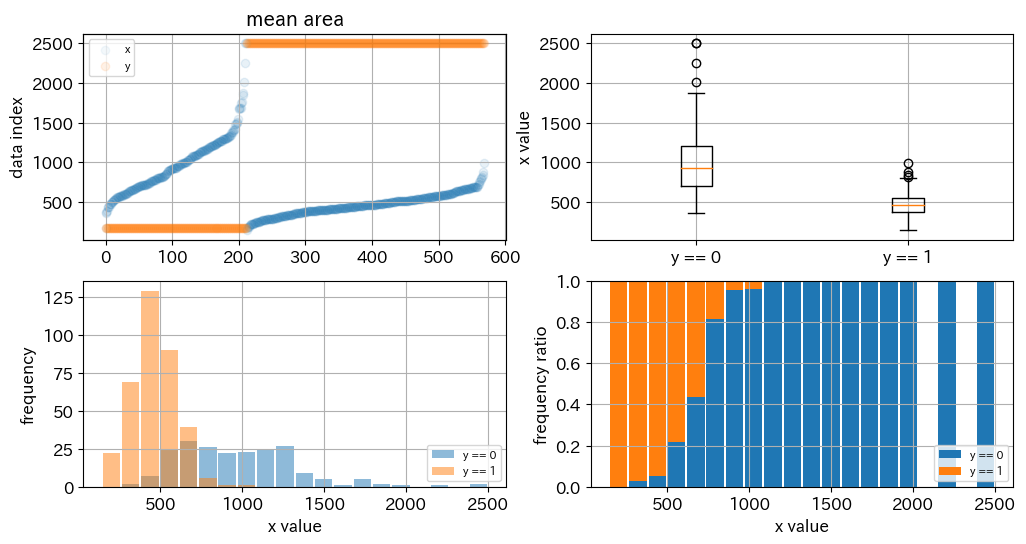



---------------------------------------------
[6]


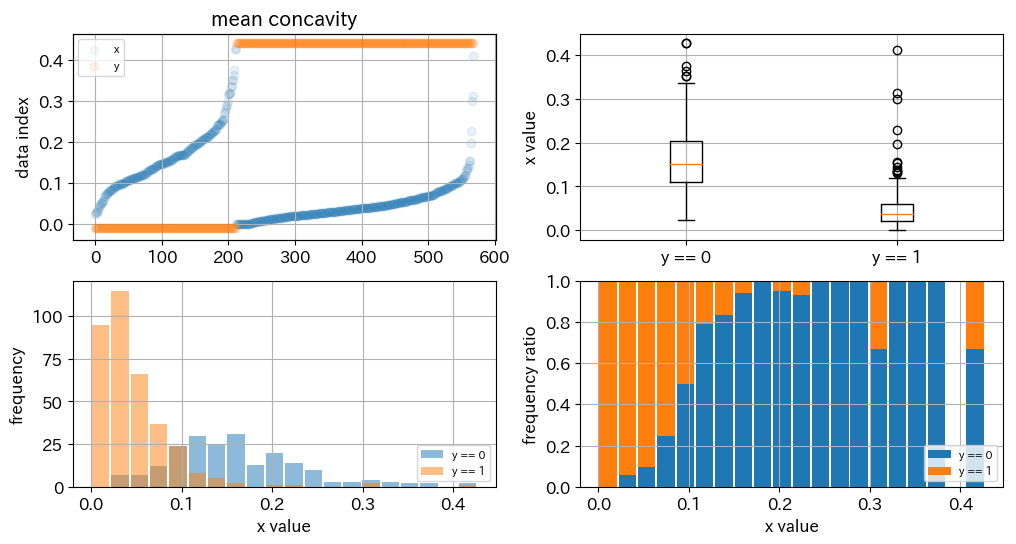



---------------------------------------------
[26]


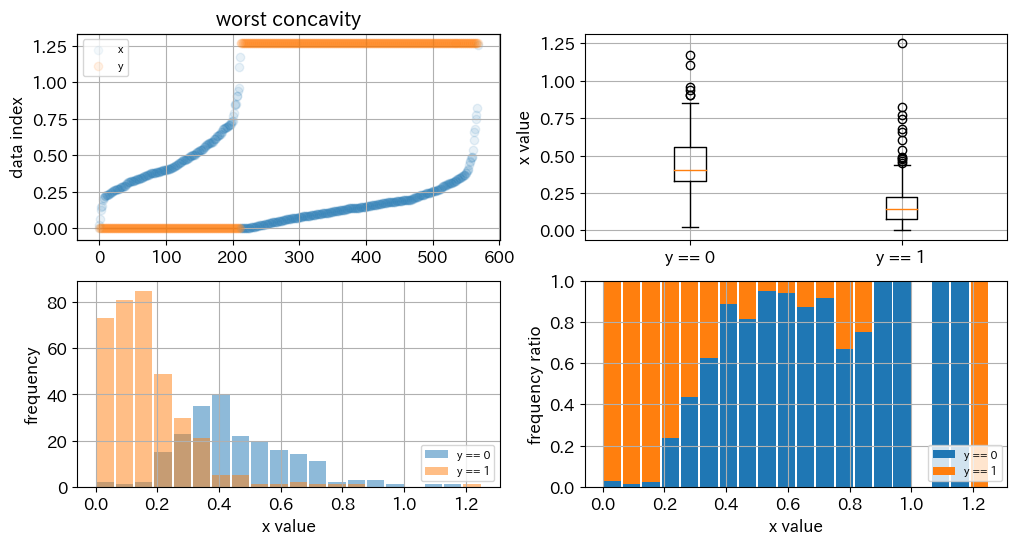

array([0.73002851, 0.4151853 , 0.74263553, 0.70898384, 0.35855997,
       0.59653368, 0.69635971, 0.77661384, 0.33049855, 0.0128376 ,
       0.56713382, 0.00830333, 0.5561407 , 0.54823594, 0.06701601,
       0.29299924, 0.25372977, 0.40804233, 0.00652176, 0.07797242,
       0.77645378, 0.45690282, 0.78291414, 0.73382503, 0.42146486,
       0.59099824, 0.65961021, 0.79356602, 0.41629431, 0.32387219])

In [10]:
# [STEP 5]
# check leakage and predictability
ppap_tab_ut.check_X_and_y_status(X           = X, 
                                 y           = y, 
                                 column_name = column_name)


2dim visualization


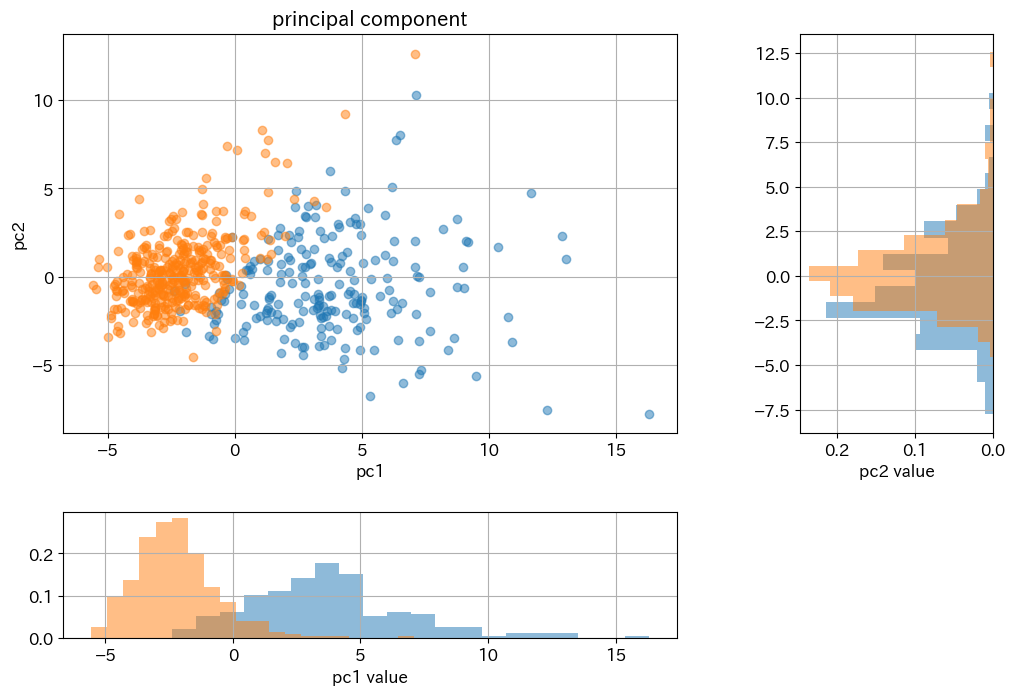

2dim visualization


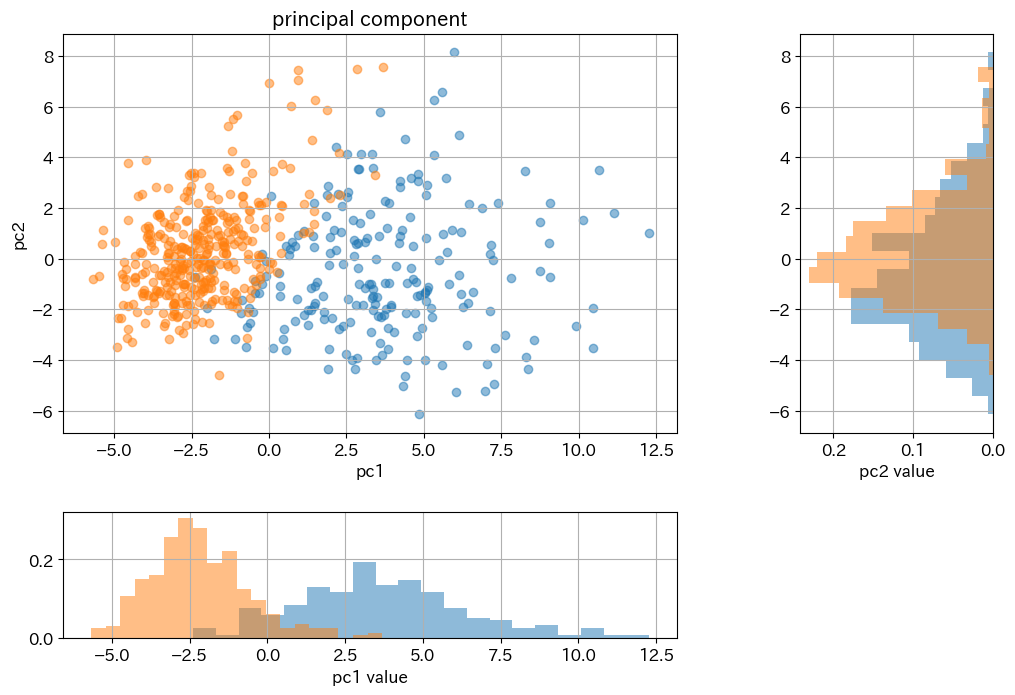

In [11]:
# [STEP 6-1]
# visualize on PCA
_, _, _ = ppap_tab_ut.understandable_visualize(X = X, 
                                               y = y)

# visualize on PCA (suppress outlier)
_, _, _ = ppap_tab_ut.understandable_visualize(X              = X, 
                                               y              = y, 
                                               X_outlier_care = True)


2dim visualization


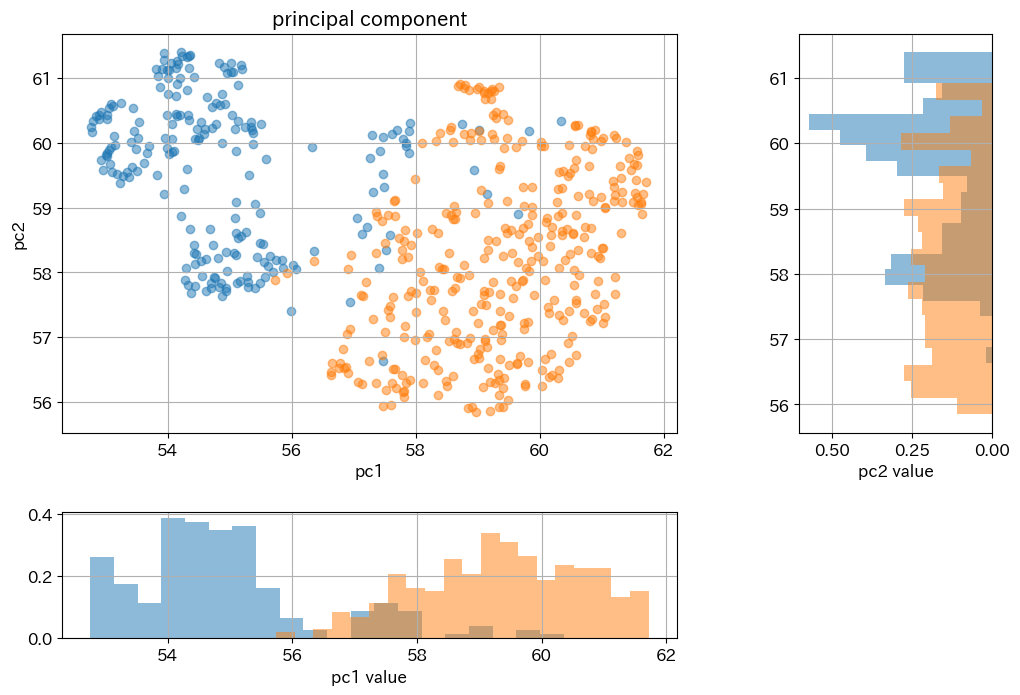

2dim visualization


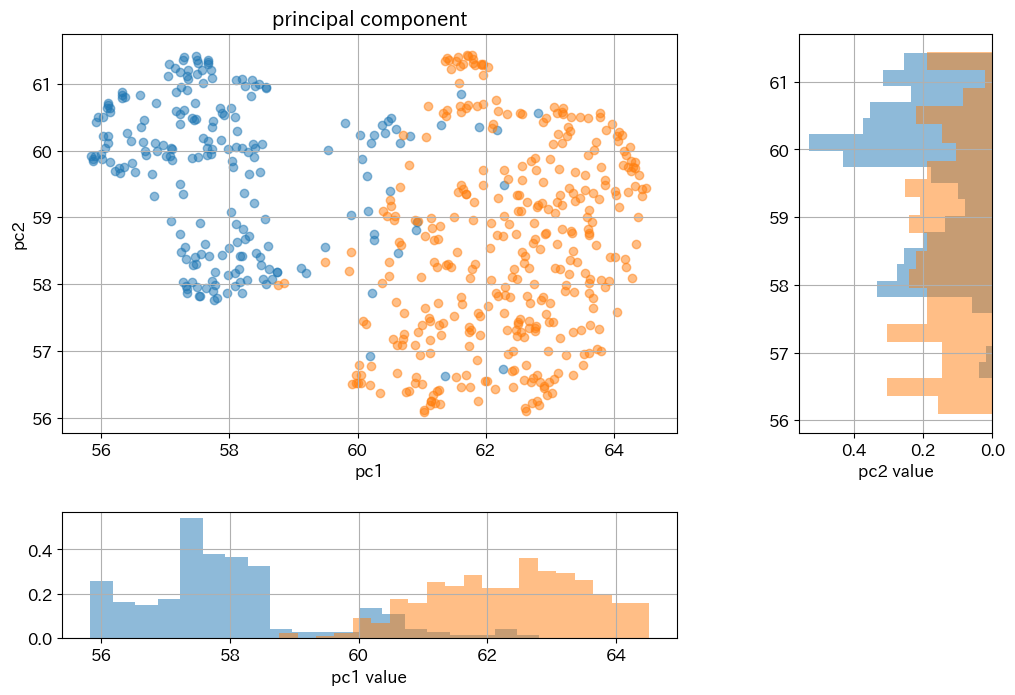

In [12]:
# [STEP 6-2]
# visualize on UMAP
_, _, _ = ppap_tab_ut.understandable_visualize(X     = X, 
                                               y     = y, 
                                               model = UMAP(random_state=0))

# visualize on UMAP (suppress outlier)
_, _, _ = ppap_tab_ut.understandable_visualize(X              = X, 
                                               y              = y,
                                               model          = UMAP(random_state=0),
                                               X_outlier_care = True)


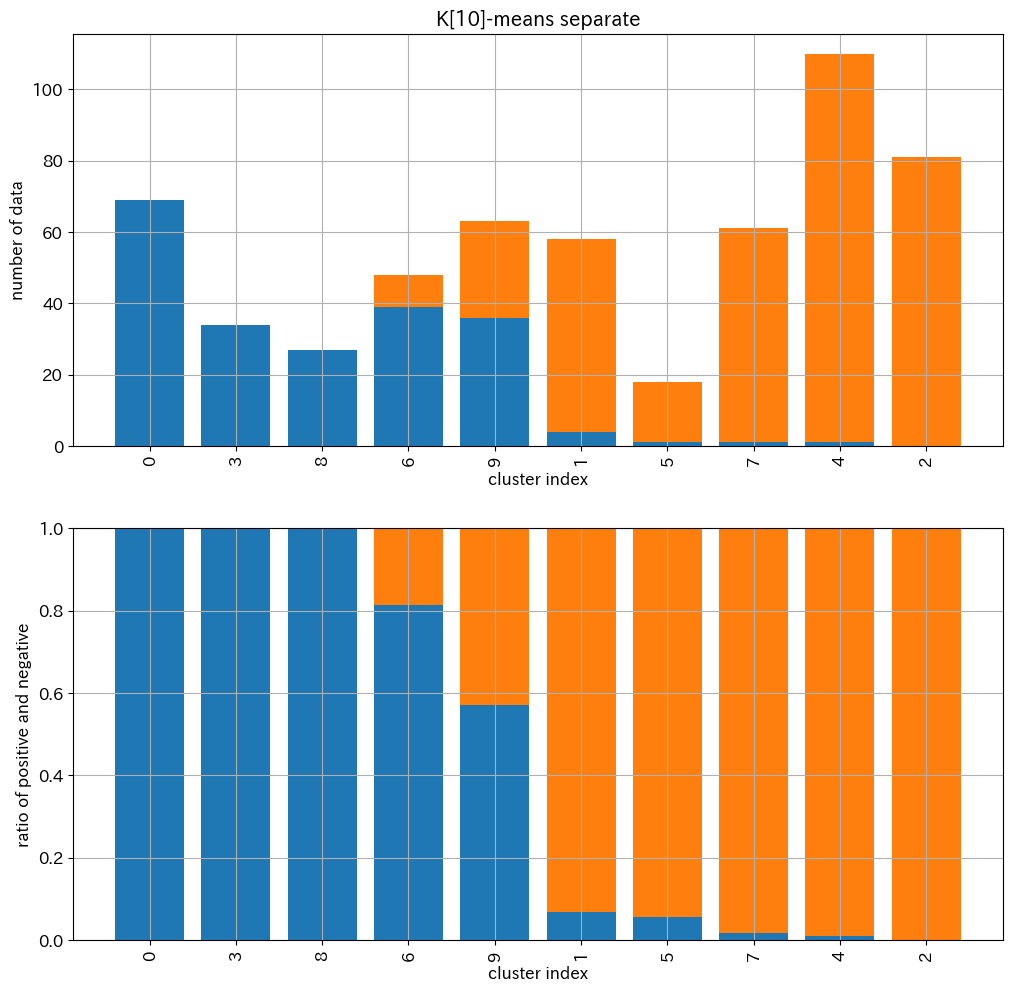

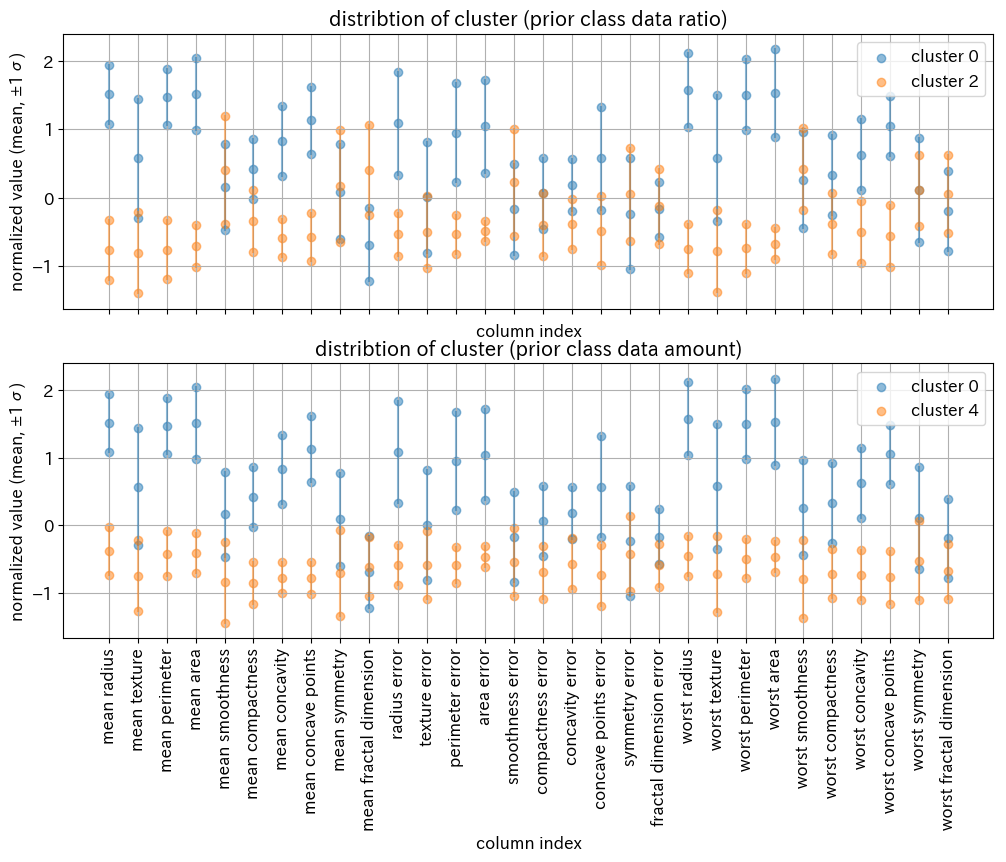

In [20]:
# [STEP 7] 
# judge predictable or not by kmeans
(kmeans_result, 
 _, 
 idx_sort_k) = ppap_tab_ut.kmeans_classification(X              = X, 
                                                 y              = y, 
                                                 column_name    = column_name, 
                                                 X_outlier_care = True)


k-nn searching on positive data [start time is 2019-07-09 17:37:58.891750]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                                [end time is 2019-07-09 17:37:59.969702]



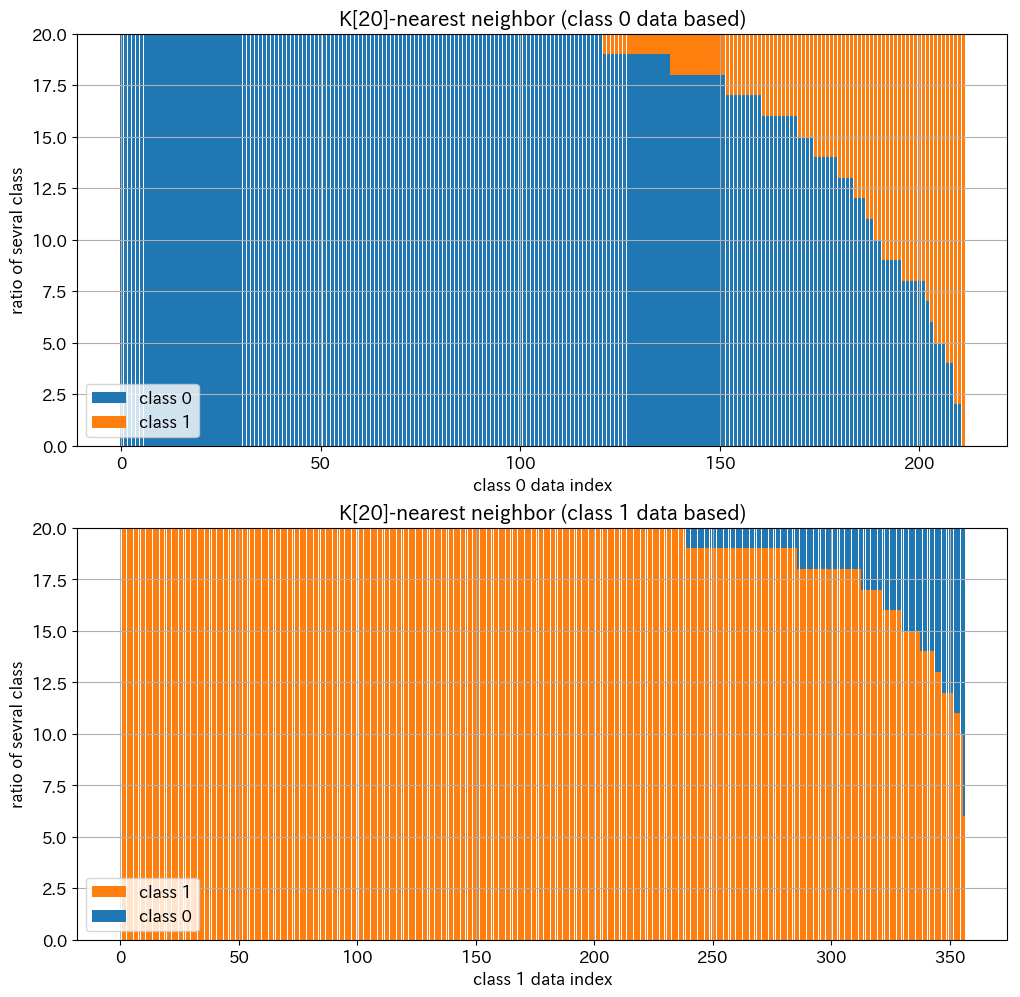

In [21]:
# [STEP 8] 
# judge predictable or not by kmeans
_ = ppap_tab_ut.knn_classification(X              = X, 
                                   y              = y, 
                                   X_outlier_care = False)


k-nn searching on positive data [start time is 2019-07-09 17:40:56.404083]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                                [end time is 2019-07-09 17:40:56.728949]



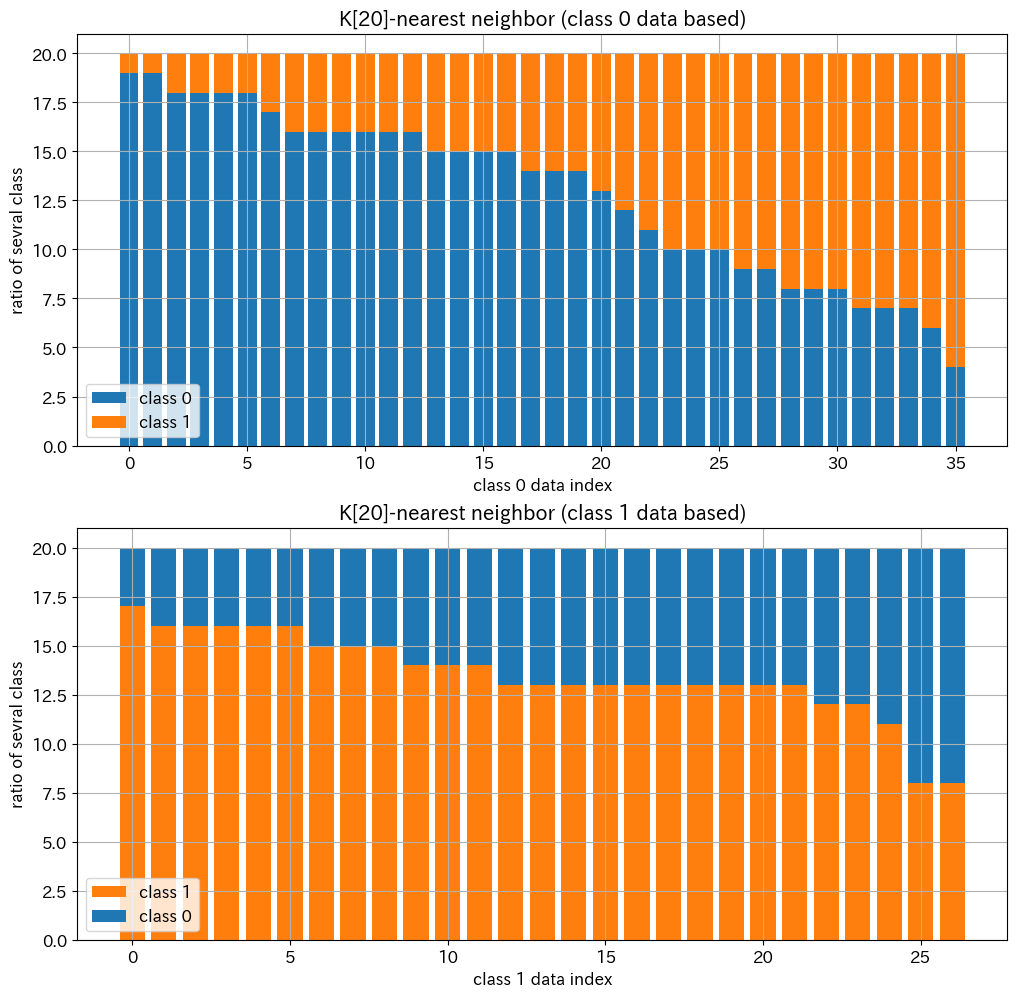

In [26]:
# [STEP 12-2] 
# judge predictable or not by knn
_ = ppap_tab_ut.knn_classification(X              = X[kmeans_result.labels_ == idx_sort_k[4], :], 
                                   y              = y[kmeans_result.labels_ == idx_sort_k[4]], 
                                   X_outlier_care = True)


# Prediction

In [27]:
# separate train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print('np.shape(X_train) = (%d, %d)' % np.shape(X_train))
print('np.shape(y_train) = (%d)'     % np.shape(y_train))
print('np.shape(X_test)  = (%d, %d)' % np.shape(X_test))
print('np.shape(y_test)  = (%d)'     % np.shape(y_test))


np.shape(X_train) = (284, 30)
np.shape(y_train) = (284)
np.shape(X_test)  = (285, 30)
np.shape(y_test)  = (285)


In [28]:
# [STEP 1-1]
# train and predict by one model 
model = LGBMClassifier(objective     = 'binary',  
                       learning_rate = 0.1, 
                       n_estimators  = 100, 
                       random_state  = 0, 
                       n_jobs        = 4) 
# exec
(model, 
 y_train_hat, 
 y_test_hat, 
 _, 
 _) = ppap_tab_2c.train_and_predict(X_train        = X_train,
                                    y_train        = y_train,
                                    X_test         = X_test,
                                    y_test         = y_test, 
                                    model          = model)
#
print(np.shape(y_train_hat))
print(np.shape(y_test_hat))


(284,)
(285,)


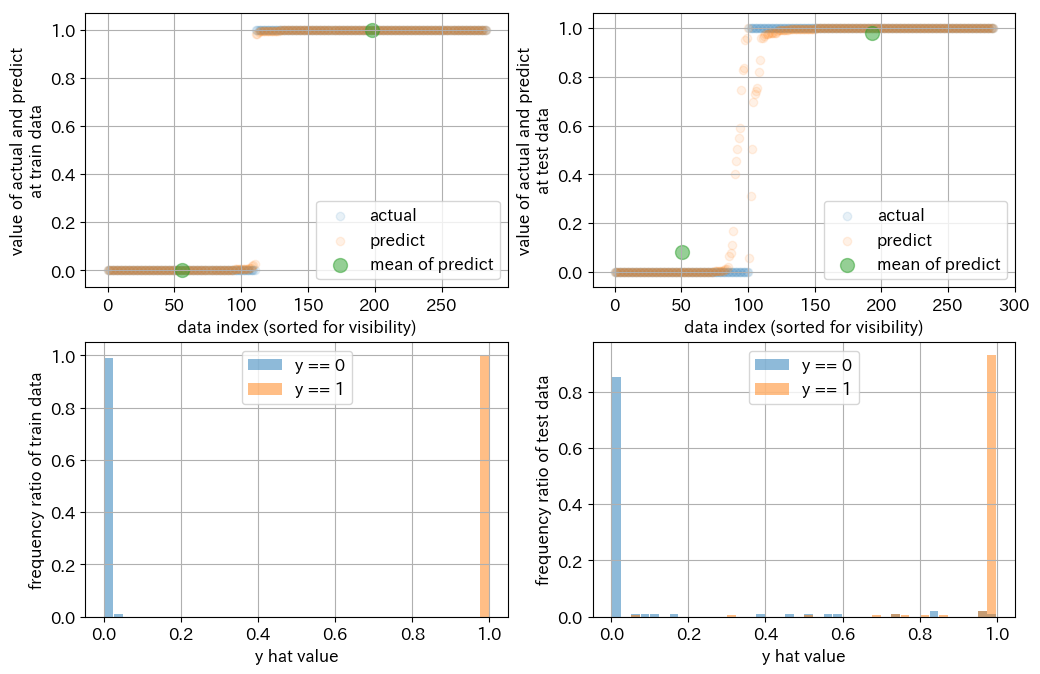

In [29]:
# [STEP 1-2]
# plot
fig = plt.figure(figsize=(12,8),dpi=100)

ax = plt.subplot(2, 2, 1)
ppap_tab_2c.draw_prediction_scat(y_hat     = y_train_hat, 
                                 y         = y_train, 
                                 data_type = 'train')
ax = plt.subplot(2, 2, 2)
ppap_tab_2c.draw_prediction_scat(y_hat     = y_test_hat, 
                                 y         = y_test, 
                                 data_type = 'test')
ax = plt.subplot(2, 2, 3)
ppap_tab_2c.draw_prediction_dist(y_hat     = y_train_hat, 
                                 y         = y_train, 
                                 data_type = 'train')
ax = plt.subplot(2, 2, 4)
ppap_tab_2c.draw_prediction_dist(y_hat     = y_test_hat, 
                                 y         = y_test, 
                                 data_type = 'test')



array([0])

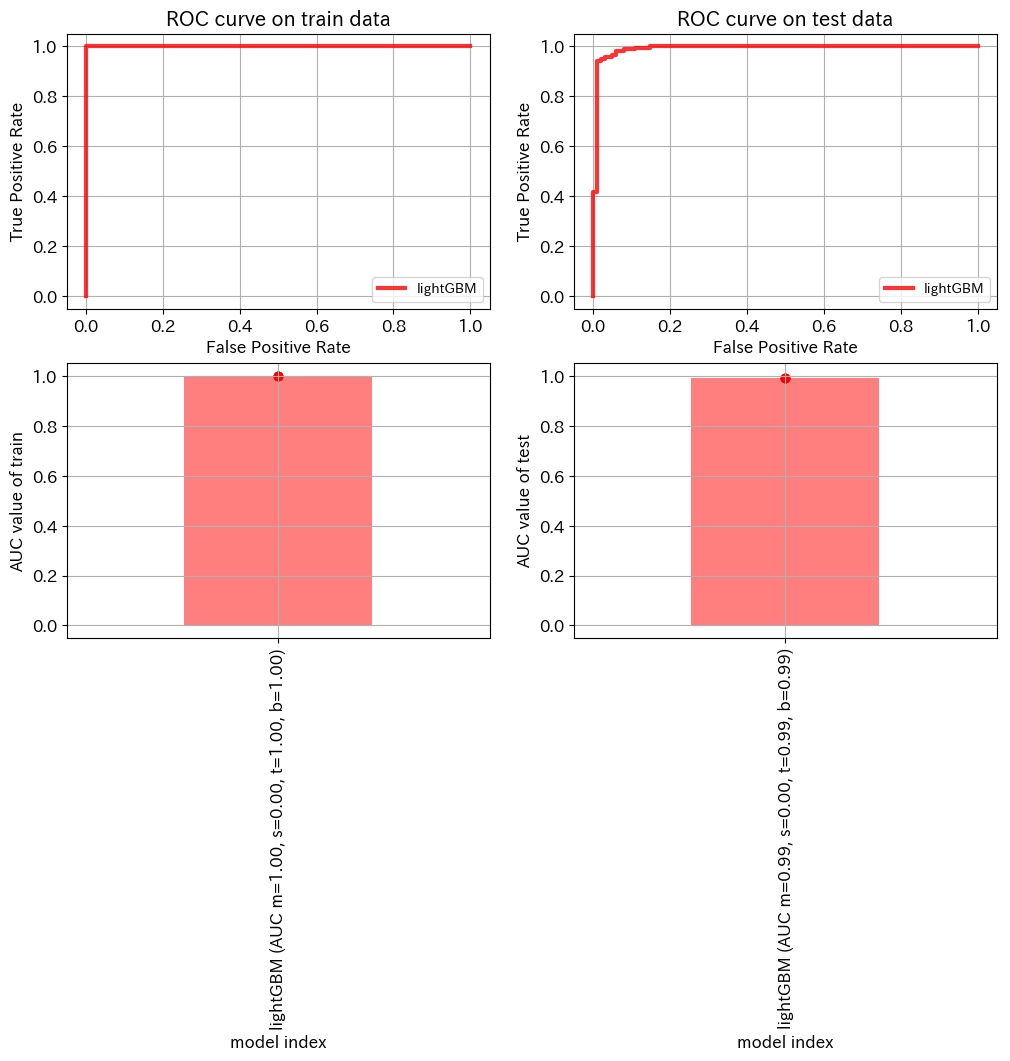

In [30]:
# [STEP 1-3]
# plot
fig = plt.figure(figsize=(12,8),dpi=100)

ax = plt.subplot(2, 2, 1)
auc_train = ppap_tab_2c.draw_roc(y_hat      = y_train_hat, 
                                 y          = y_train, 
                                 model_name = 'lightGBM', 
                                 data_type  = 'train')
ax = plt.subplot(2, 2, 2)
auc_test = ppap_tab_2c.draw_roc(y_hat      = y_test_hat, 
                                y          = y_test, 
                                model_name = 'lightGBM', 
                                data_type  = 'test')
ax = plt.subplot(2, 2, 3)
ppap_tab_2c.draw_auc(auc        = auc_train, 
                     model_name = 'lightGBM', 
                     data_type  = 'train')
ax = plt.subplot(2, 2, 4)
ppap_tab_2c.draw_auc(auc        = auc_test, 
                     model_name = 'lightGBM', 
                     data_type  = 'test')


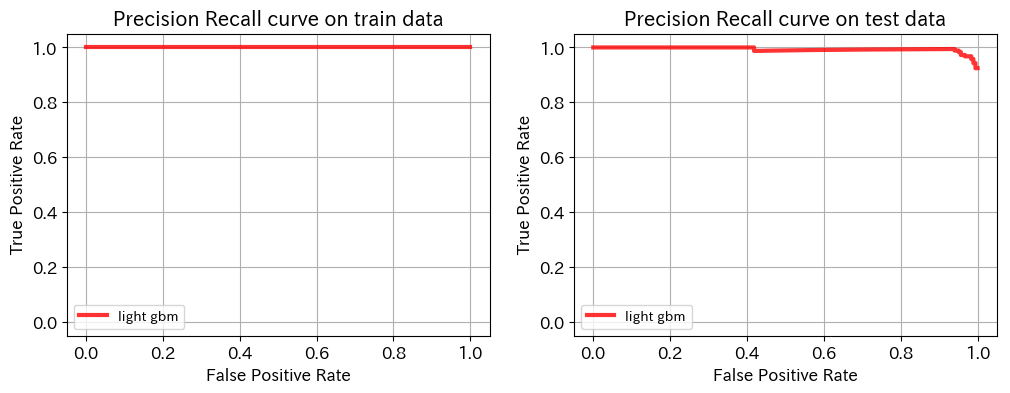

In [31]:
# [STEP 1-4]
# plot
fig = plt.figure(figsize=(12,4),dpi=100)

ax = plt.subplot(1, 2, 1)
auc_train = ppap_tab_2c.draw_pr(y_hat      = y_train_hat, 
                                y          = y_train, 
                                model_name = 'light gbm', 
                                data_type  = 'train')
ax = plt.subplot(1, 2, 2)
auc_test = ppap_tab_2c.draw_pr(y_hat      = y_test_hat, 
                               y          = y_test, 
                               model_name = 'light gbm', 
                               data_type  = 'test')


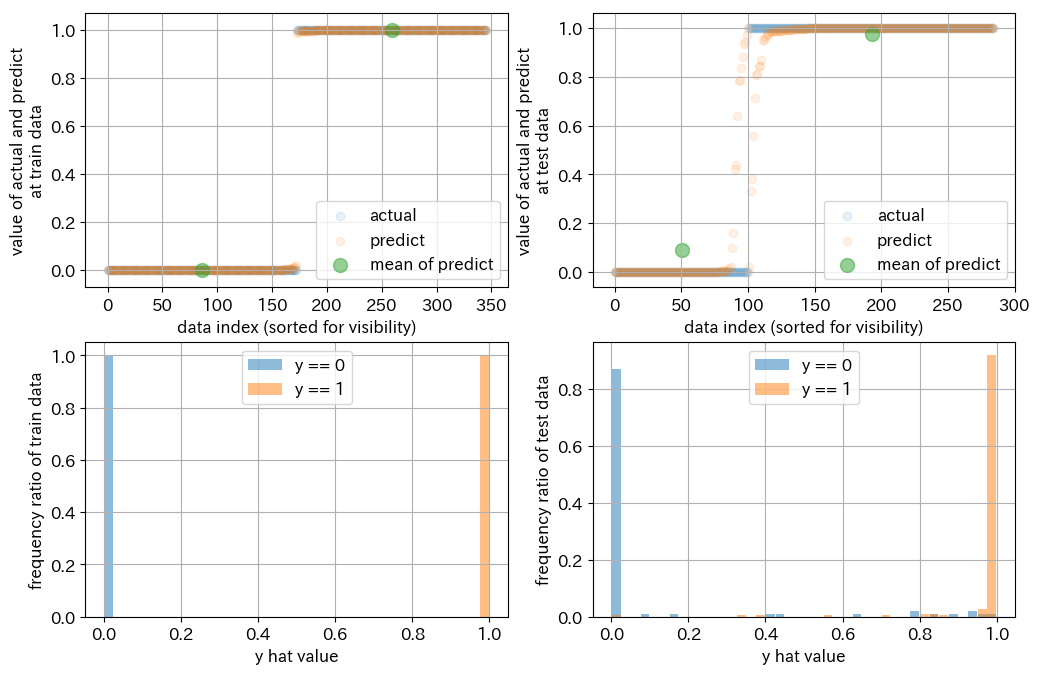

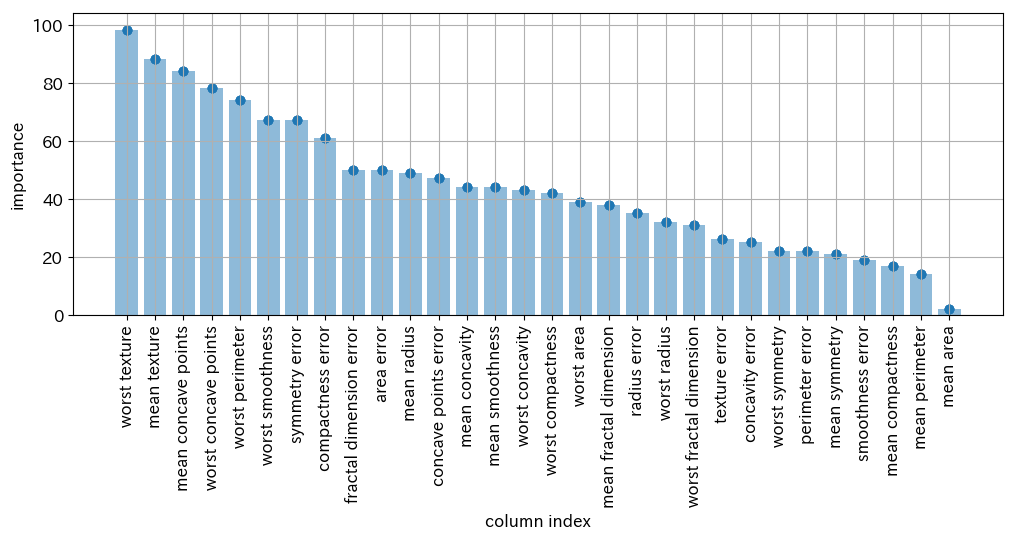

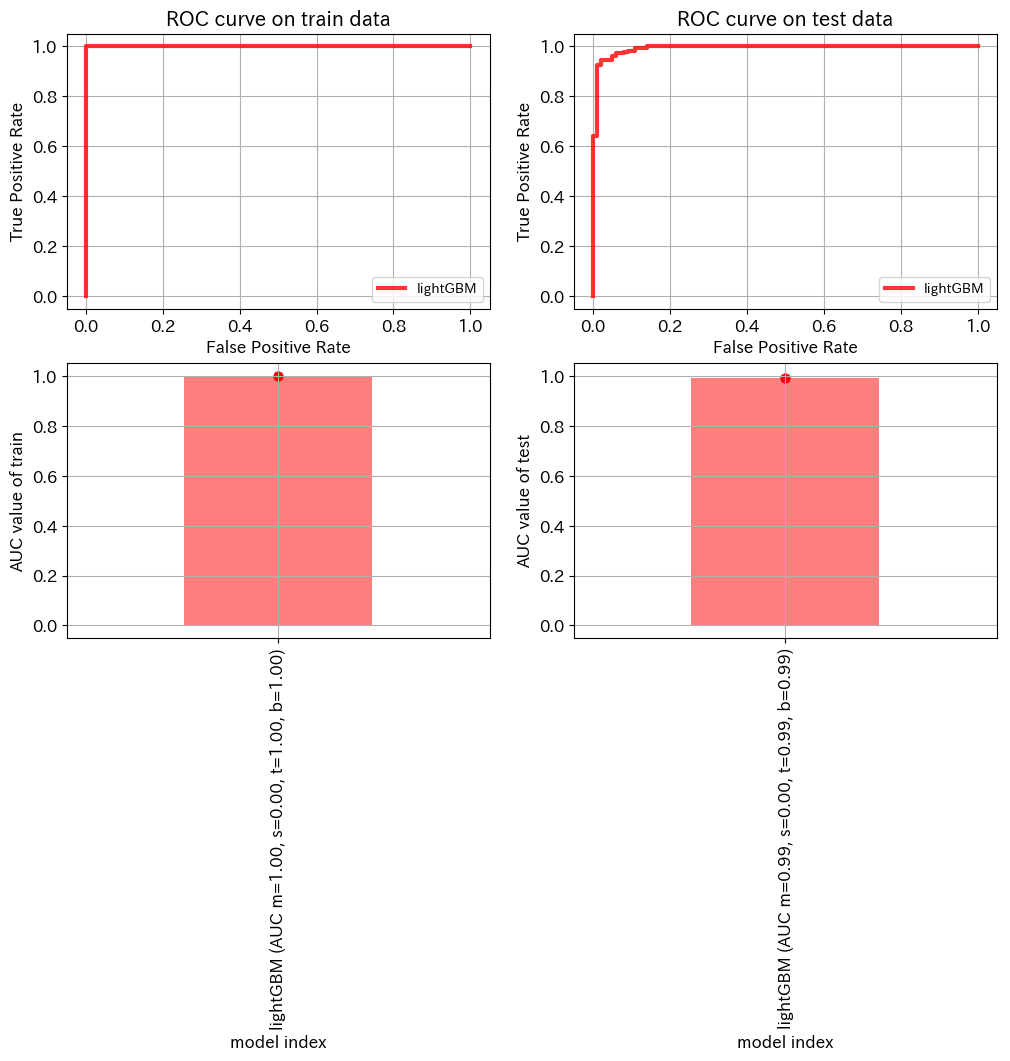

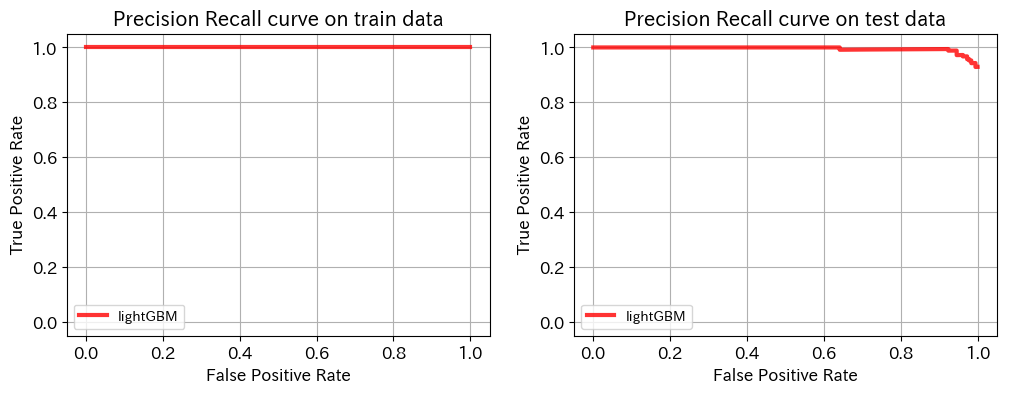

In [32]:
# [STEP 2]
# train and predict by one model (with upsampling)
model = LGBMClassifier(objective     = 'binary',  
                       learning_rate = 0.1, 
                       n_estimators  = 100, 
                       random_state  = 0, 
                       n_jobs        = 4) 

# exec
(model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_2c.train_predict_and_measure(X_train        = X_train,
                                                     y_train        = y_train,
                                                     X_test         = X_test,
                                                     y_test         = y_test, 
                                                     model          = model, 
                                                     column_name    = column_name, 
                                                     sample_balance = True)


train on cv (model:lightGBM, feature dim:30) [start time is 2019-07-09 17:41:10.559468]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:12.011535]




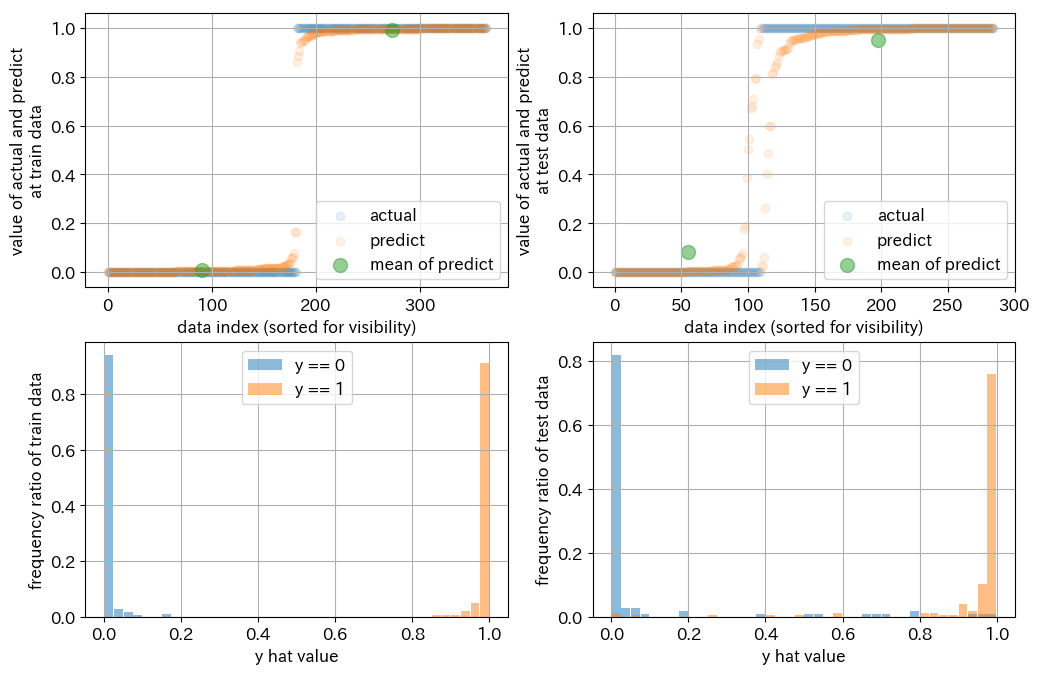

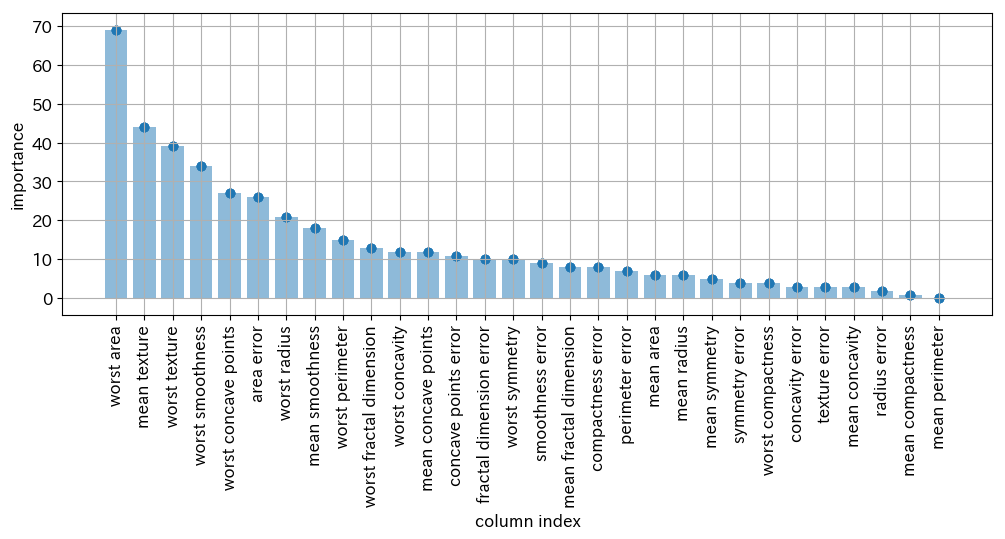

train on cv (model:XGBoost, feature dim:30) [start time is 2019-07-09 17:41:13.181626]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:14.260902]




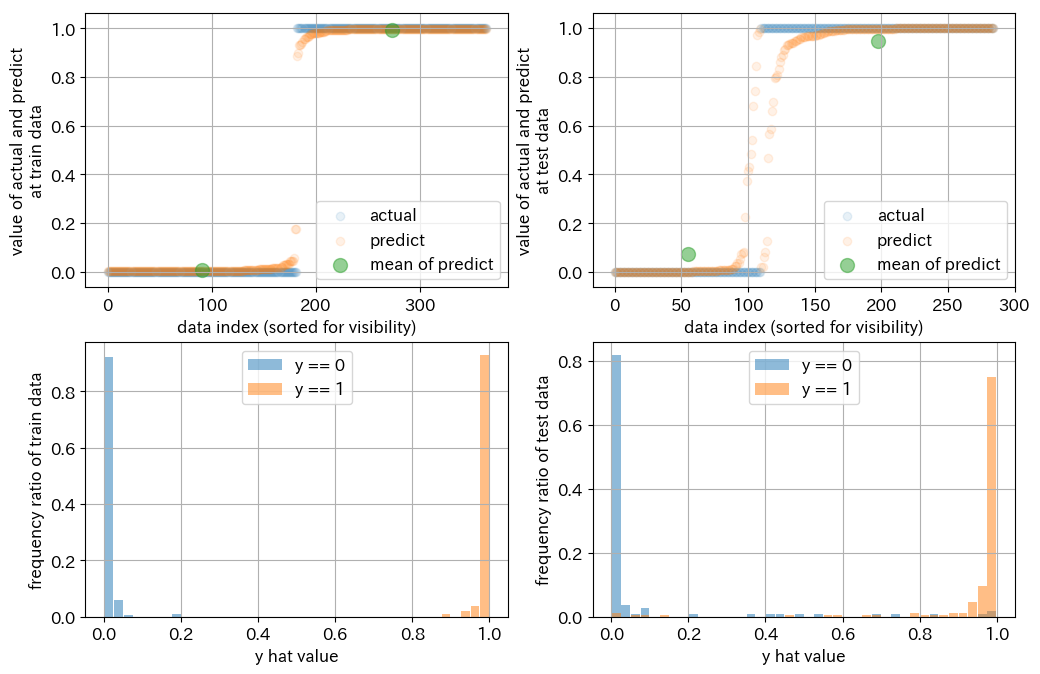

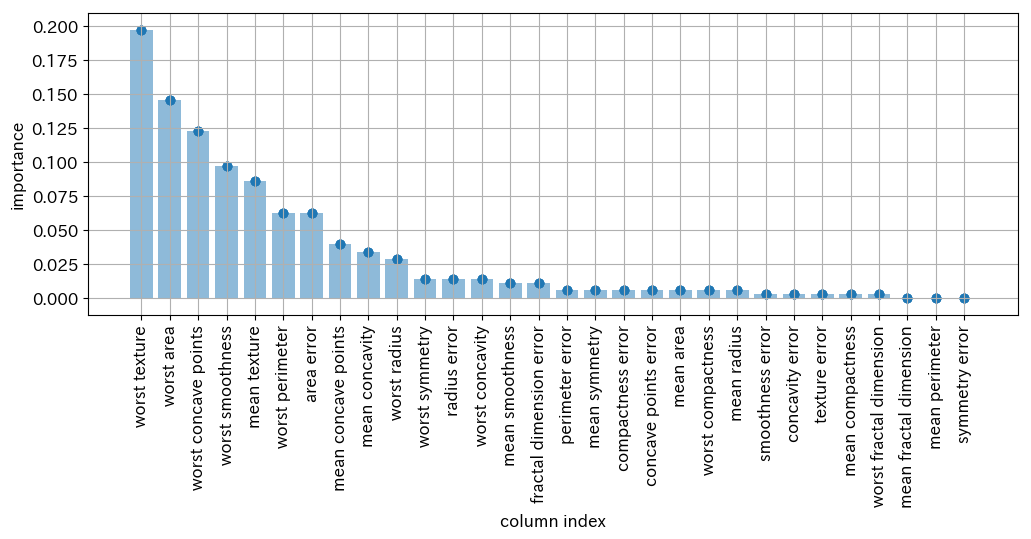

train on cv (model:LogReg, feature dim:30) [start time is 2019-07-09 17:41:15.307832]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.96, test = 0.94 [end time is 2019-07-09 17:41:16.783346]




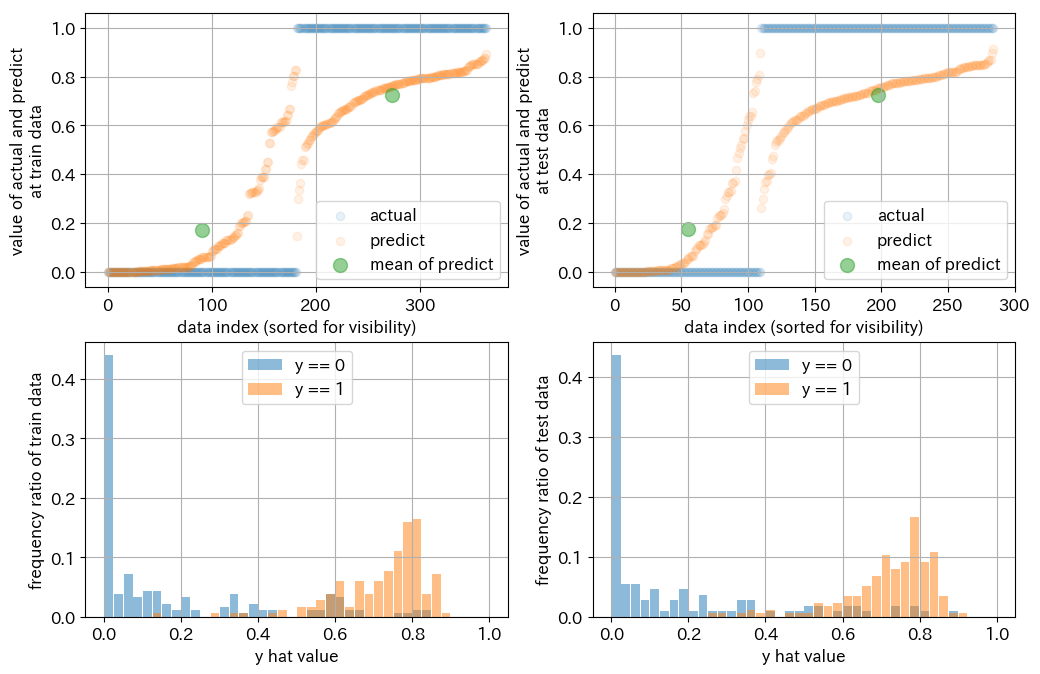

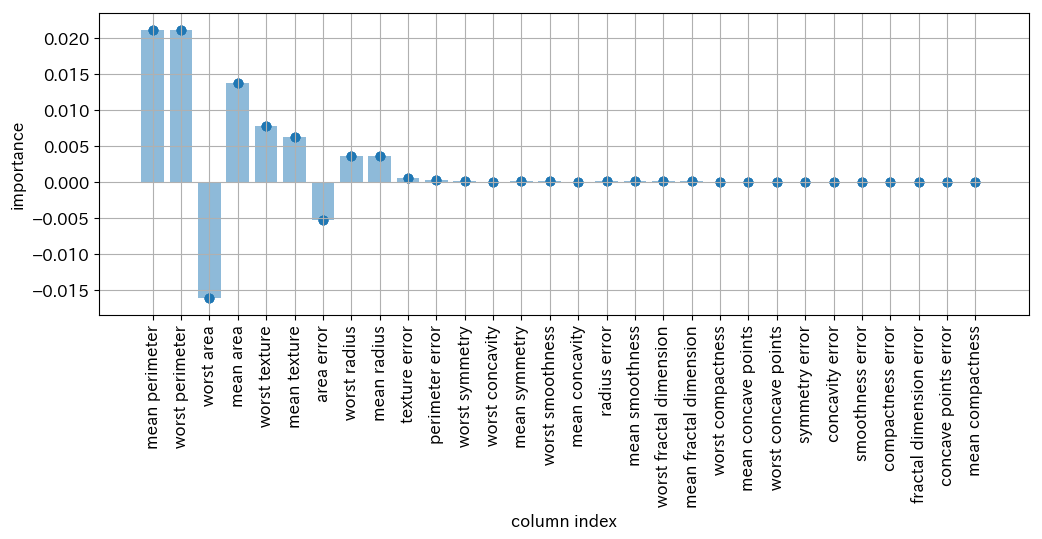



summary result


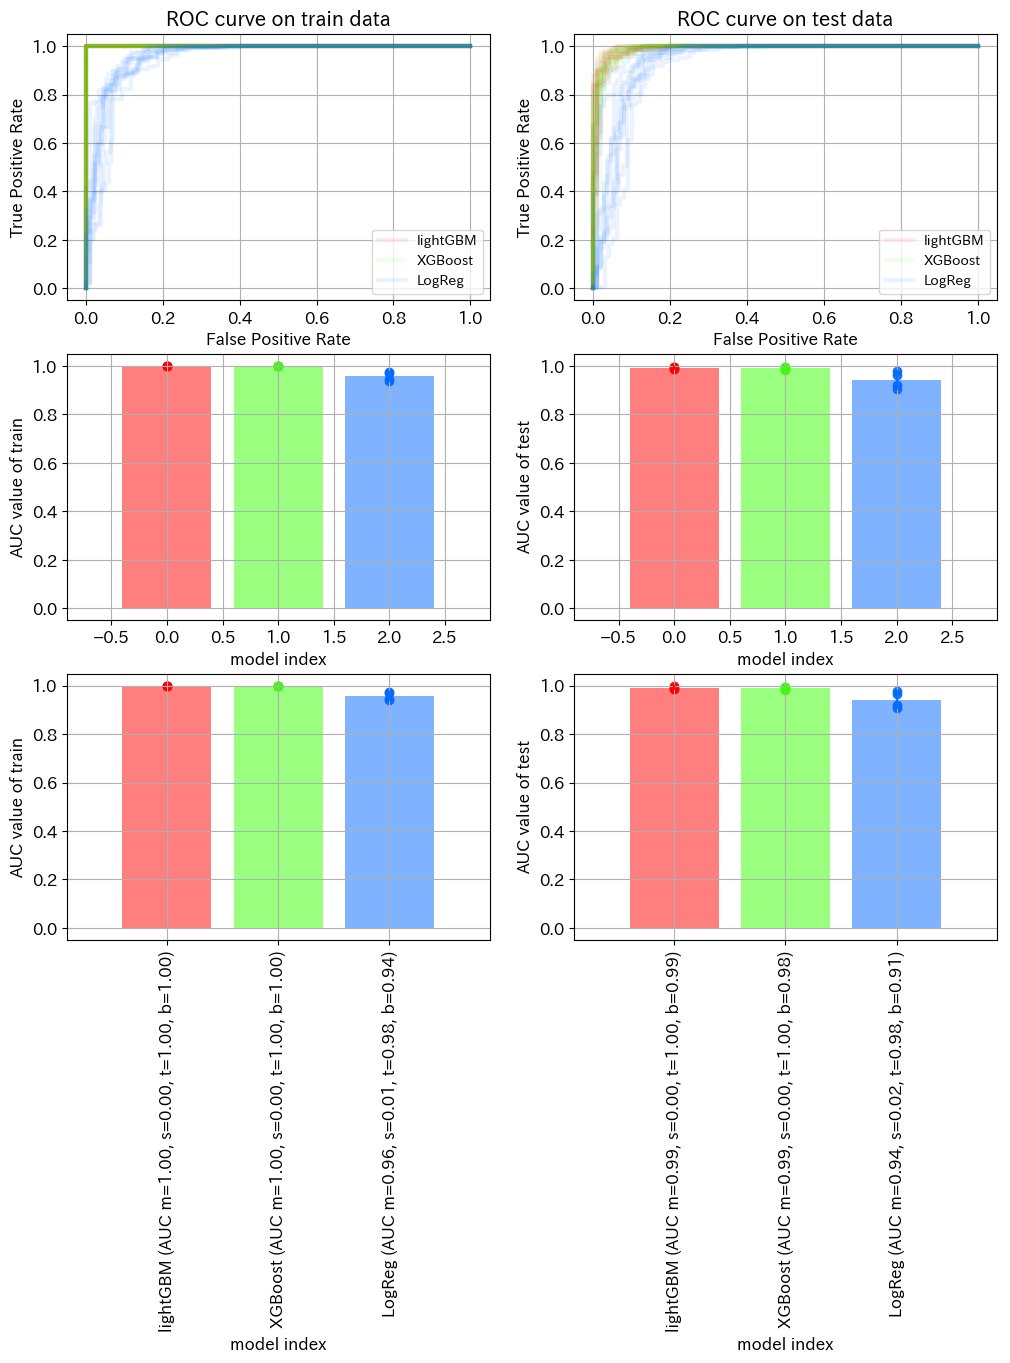

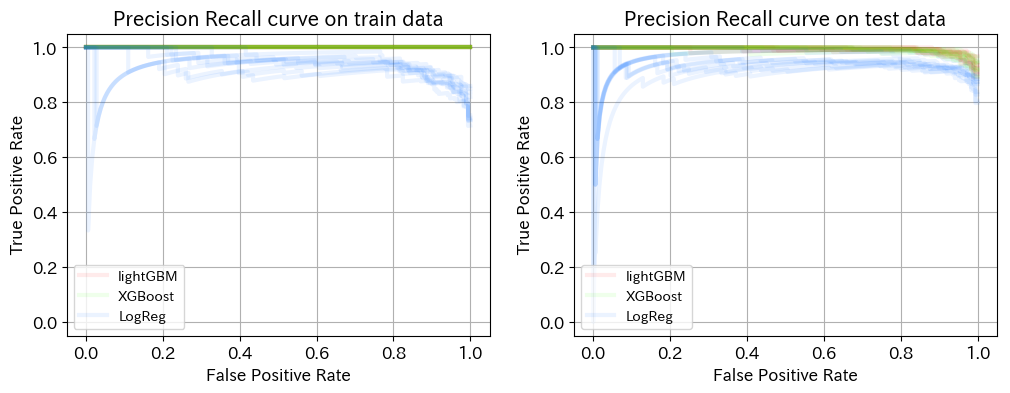

In [33]:
# [STEP 3]
# cross validation by multi model (with updampling)
model      = []
model_name = []

# 1. lightGBM
model_tmp = LGBMClassifier(objective        = 'binary',  
                           learning_rate    = 0.1, 
                           n_estimators     = 100, 
                           min_child_weight = 0.1,
                           num_leaves       = 20,
                           colsample_bytree = 0.5,
                           reg_lambda       = 2.0, 
                           random_state     = 0,
                           n_jobs           = 4) 
model.append(model_tmp)
model_name.append('lightGBM')

# 2. XGBoost
model_tmp = XGBClassifier(learning_rate = 0.1, 
                          n_estimators  = 100, 
                          max_depth     = 5, 
                          subsample     = 1.0, 
                          random_state  = 0, 
                          n_jobs        = 4) 
model.append(model_tmp)
model_name.append('XGBoost')

# 3. LogisticRegression
model_tmp = LogisticRegression(C      = 0.1, 
                               solver = 'sag', 
                               n_jobs = 4)
model.append(model_tmp)
model_name.append('LogReg')

# exec
(y_train_hat_stock_tmp, 
 y_train_stock_tmp, 
 y_test_hat_stock_tmp, 
 y_test_stock_tmp, 
 importance_stock_tmp) = ppap_tab_2c.cv_random(X              = X, 
                                               y              = y, 
                                               model          = model, 
                                               model_name     = model_name,
                                               column_name    = column_name,  
                                               sample_balance = True)

plt.show()


train on cv (model:[m:0,r:0] lightGBM_param0_RFE30, feature dim:30) [start time is 2019-07-09 17:41:19.328185]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:20.845034]




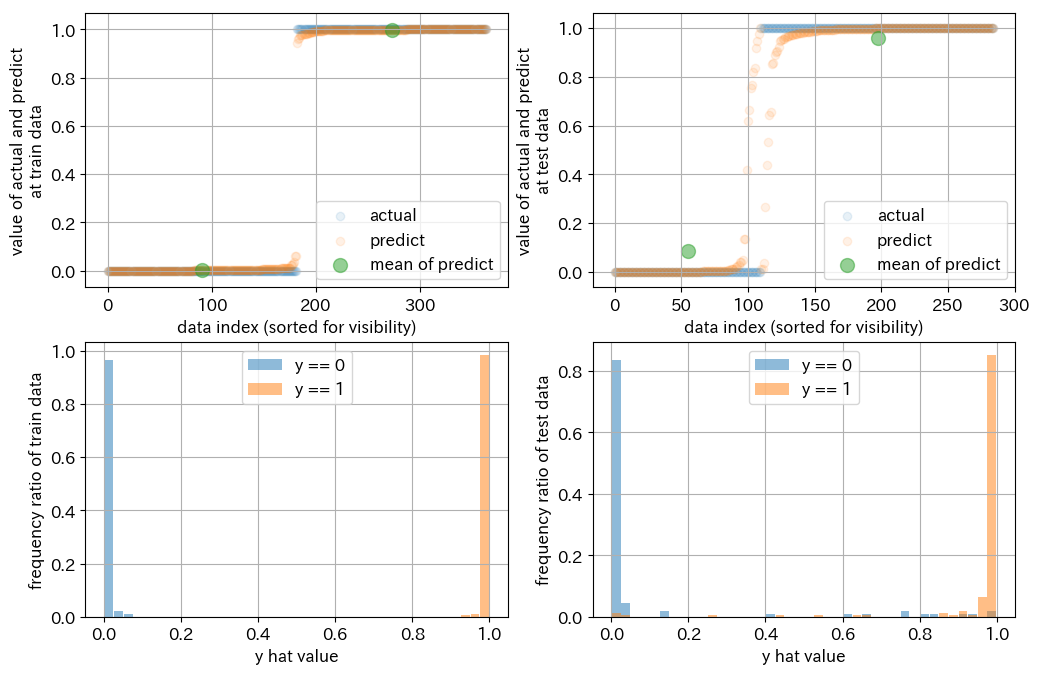

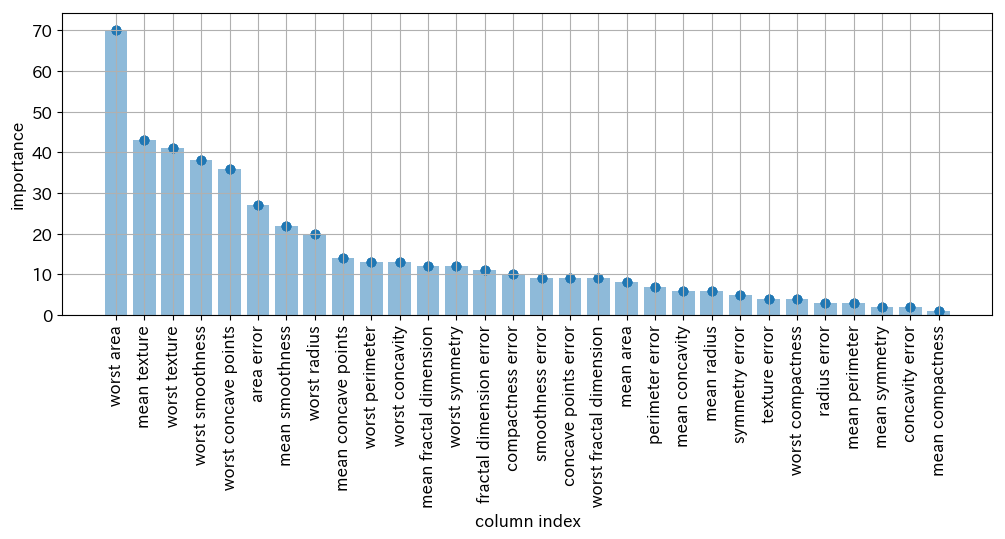

train on cv (model:[m:0,r:1] lightGBM_param0_RFE20, feature dim:20) [start time is 2019-07-09 17:41:21.816311]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:23.095390]




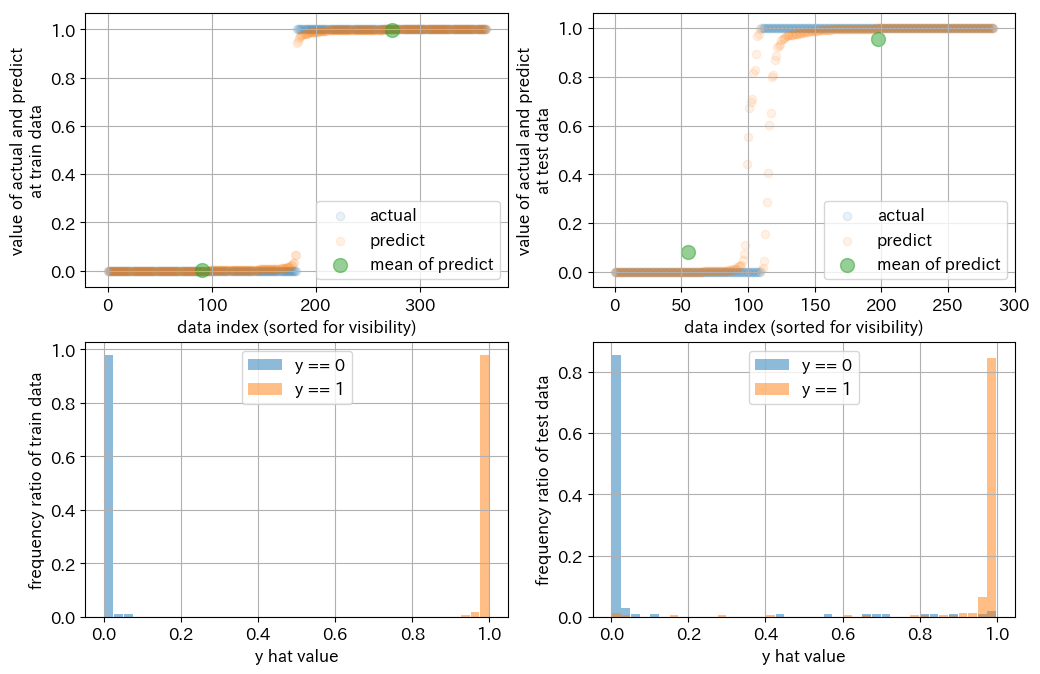

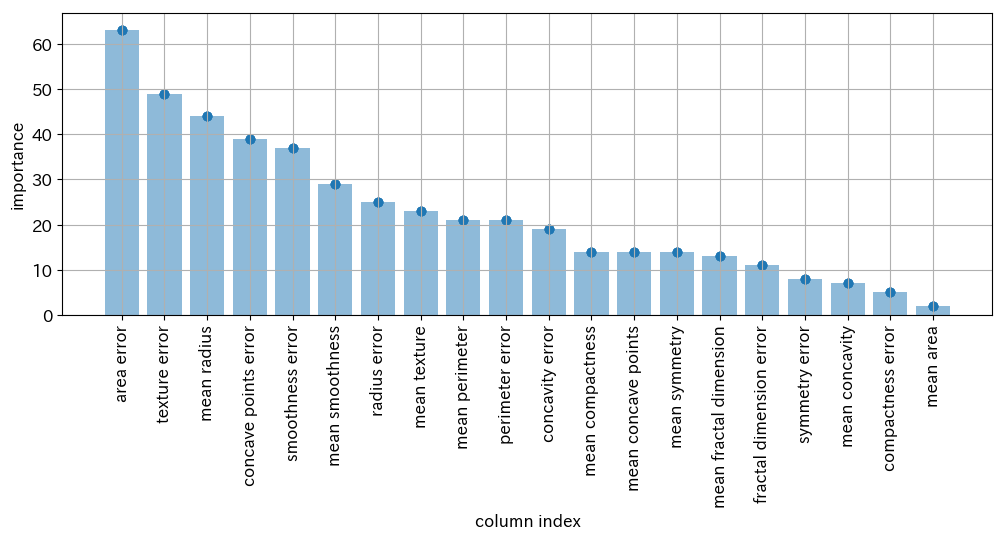

train on cv (model:[m:0,r:2] lightGBM_param0_RFE15, feature dim:15) [start time is 2019-07-09 17:41:23.970581]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:25.354158]




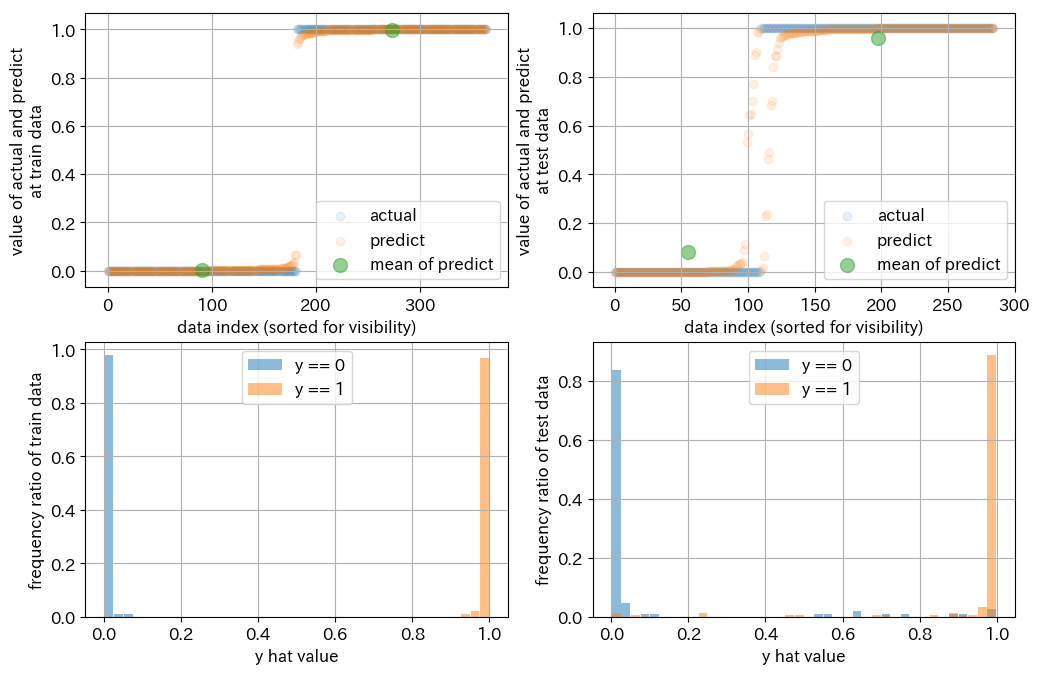

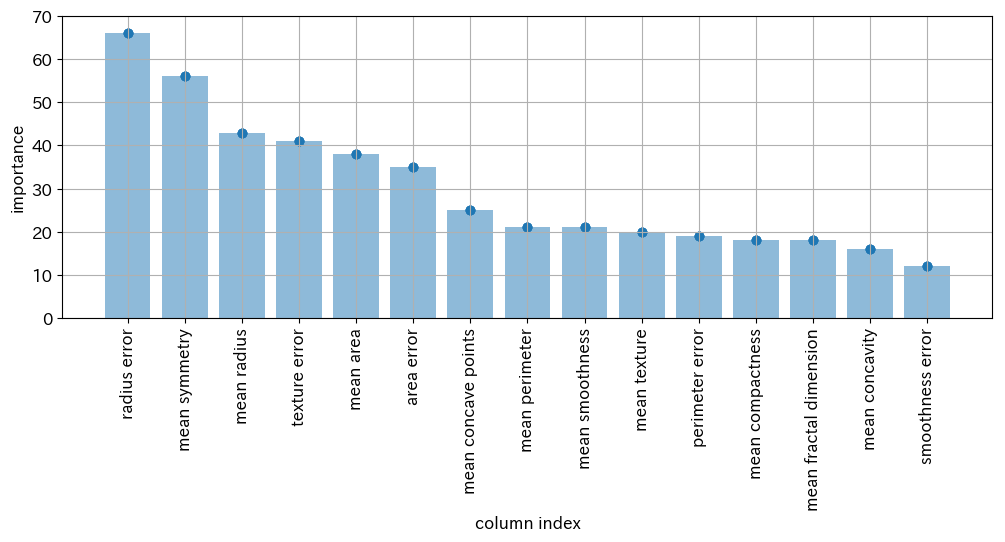

train on cv (model:[m:0,r:3] lightGBM_param0_RFE10, feature dim:10) [start time is 2019-07-09 17:41:26.225612]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:27.563769]




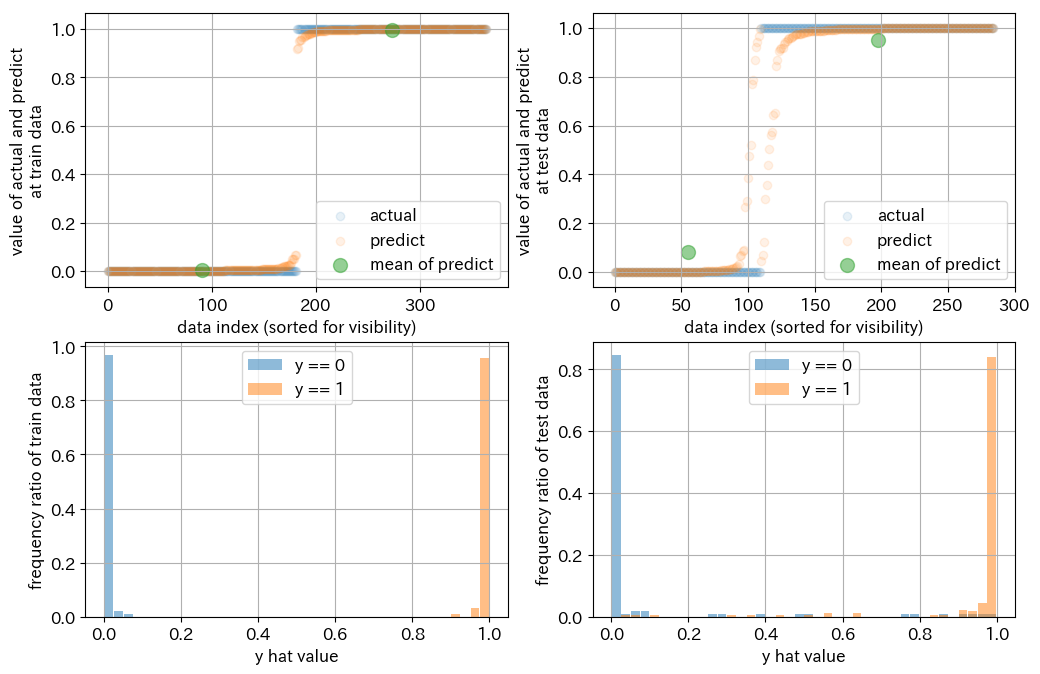

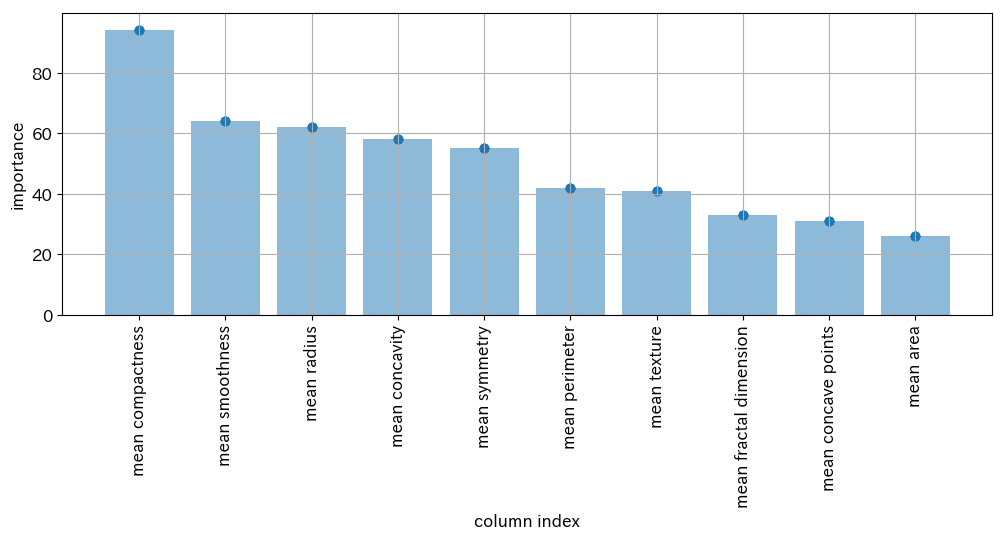

train on cv (model:[m:0,r:4] lightGBM_param0_RFE7, feature dim:7) [start time is 2019-07-09 17:41:28.528888]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:29.776955]




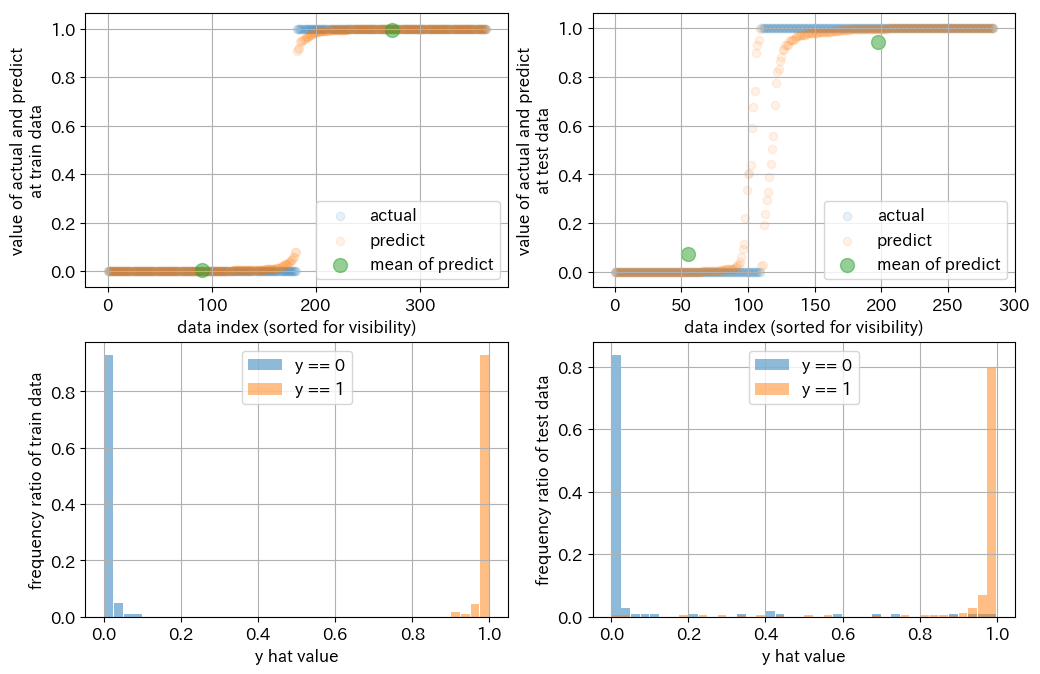

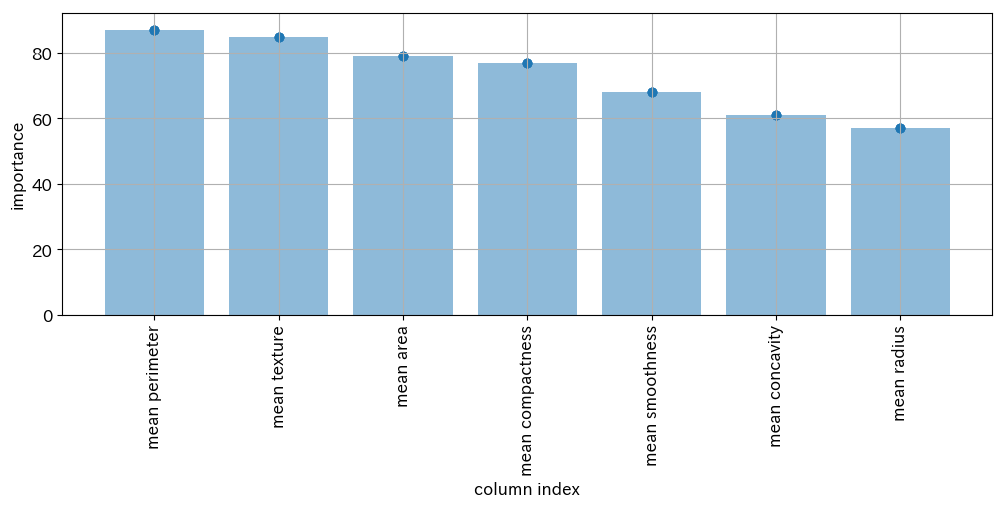

train on cv (model:[m:0,r:5] lightGBM_param0_RFE5, feature dim:5) [start time is 2019-07-09 17:41:30.681300]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:32.098452]




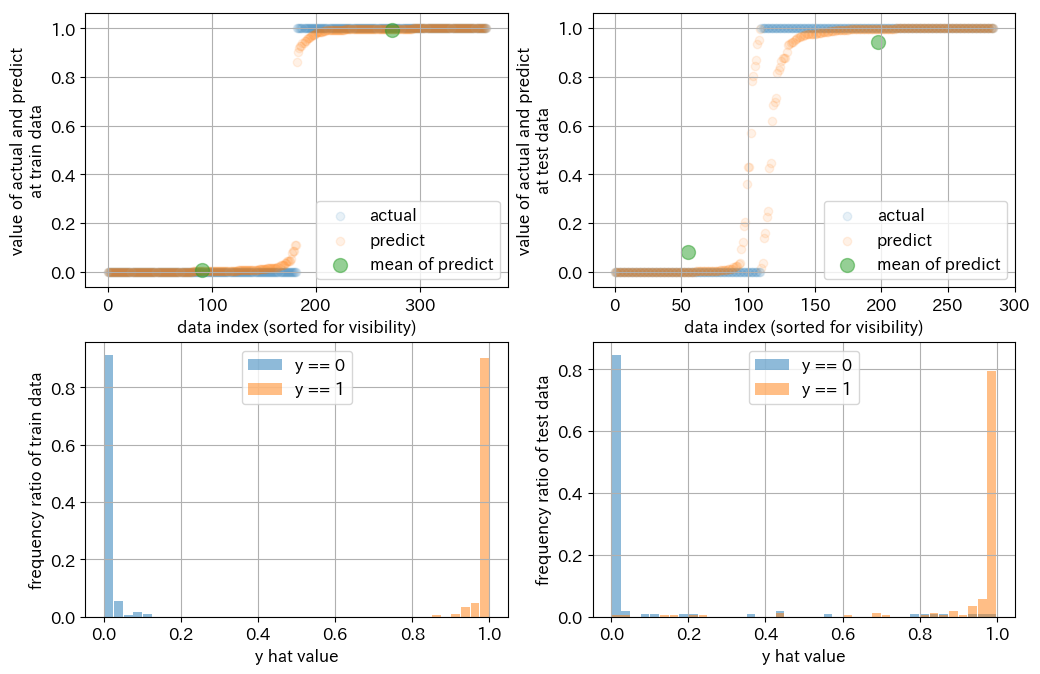

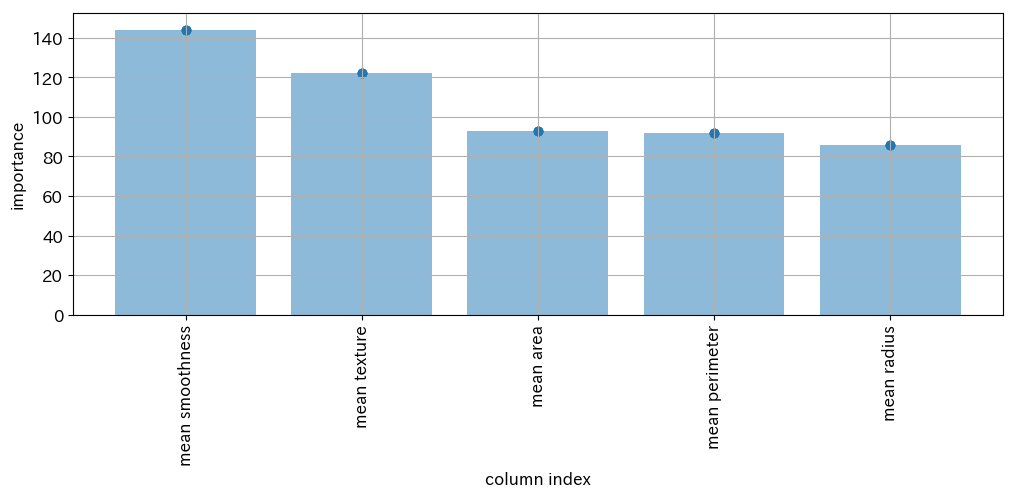

train on cv (model:[m:0,r:6] lightGBM_param0_RFE3, feature dim:3) [start time is 2019-07-09 17:41:33.012006]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.95 [end time is 2019-07-09 17:41:34.617108]




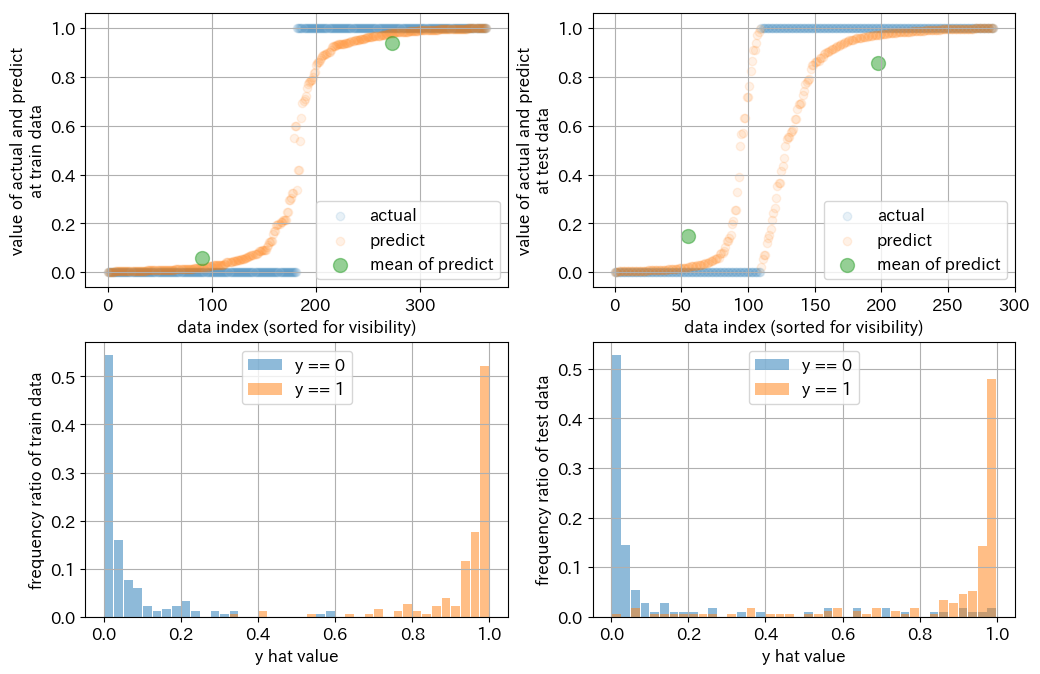

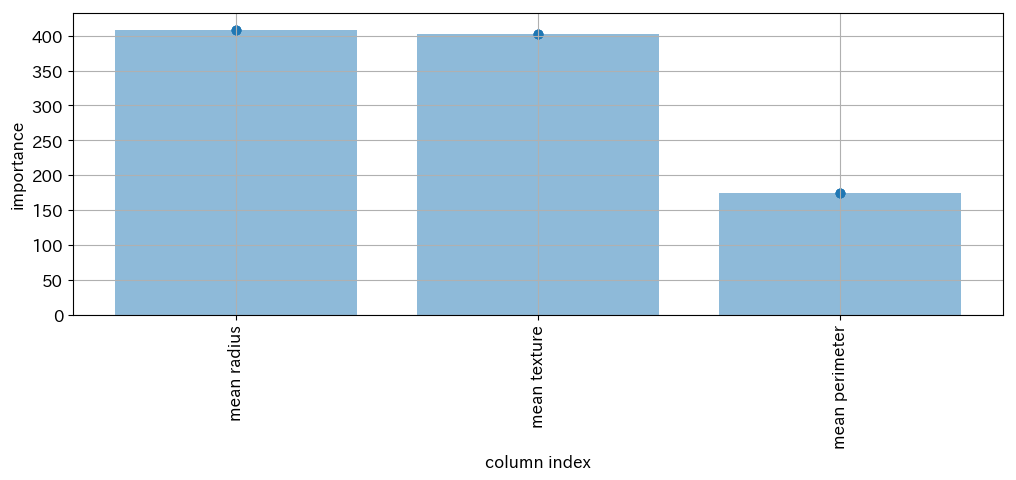

train on cv (model:[m:1,r:0] XGBoost_param0_RFE30, feature dim:30) [start time is 2019-07-09 17:41:35.482246]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:36.613686]




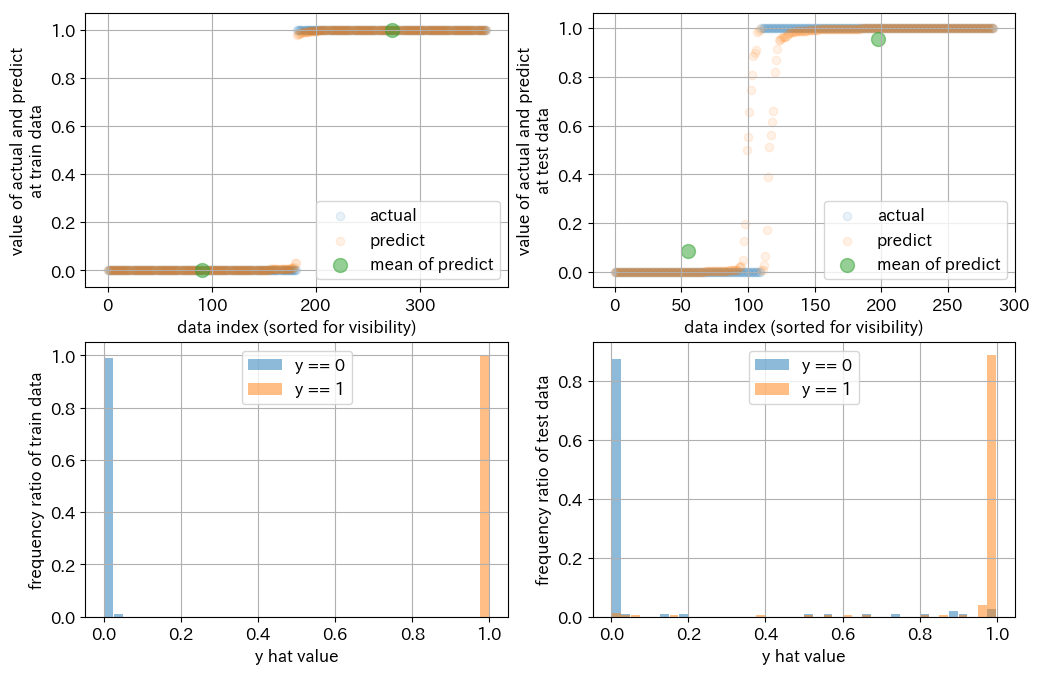

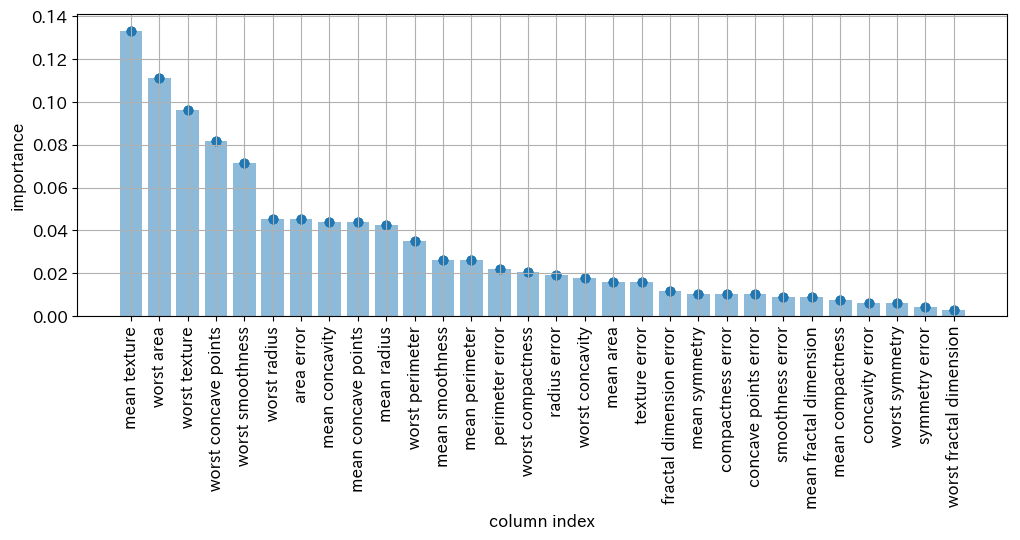

train on cv (model:[m:1,r:1] XGBoost_param0_RFE20, feature dim:20) [start time is 2019-07-09 17:41:37.789805]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:38.728411]




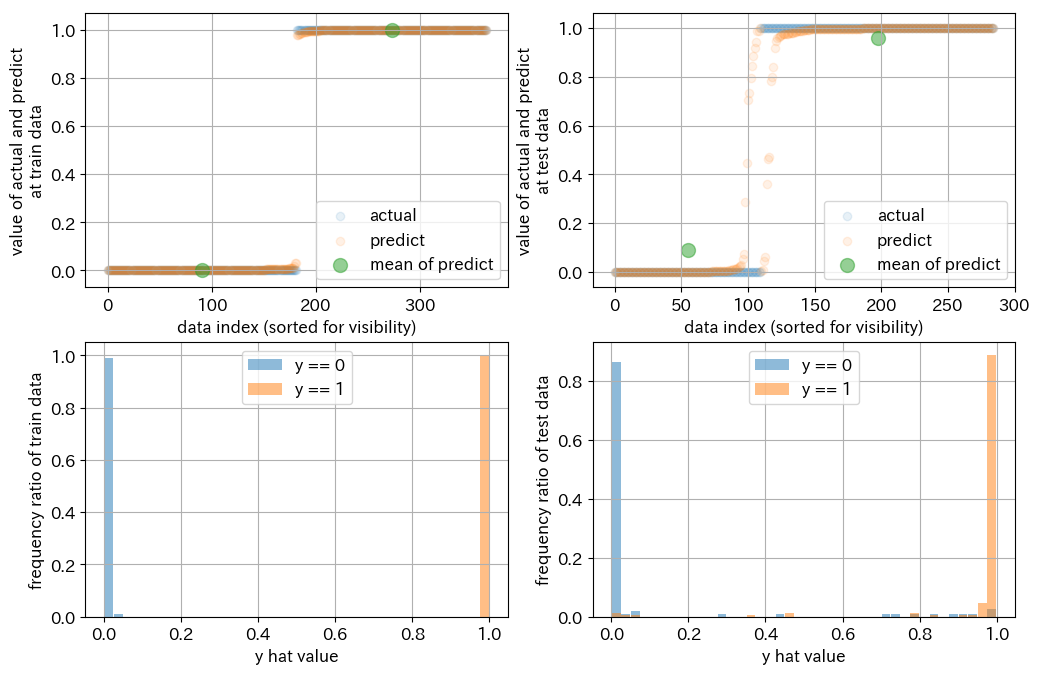

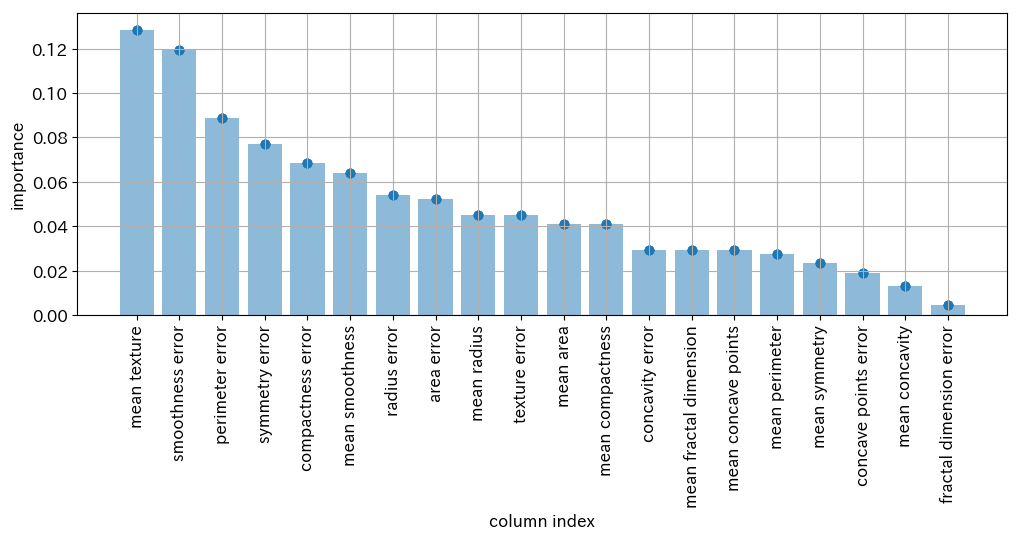

train on cv (model:[m:1,r:2] XGBoost_param0_RFE15, feature dim:15) [start time is 2019-07-09 17:41:39.816923]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:40.753412]




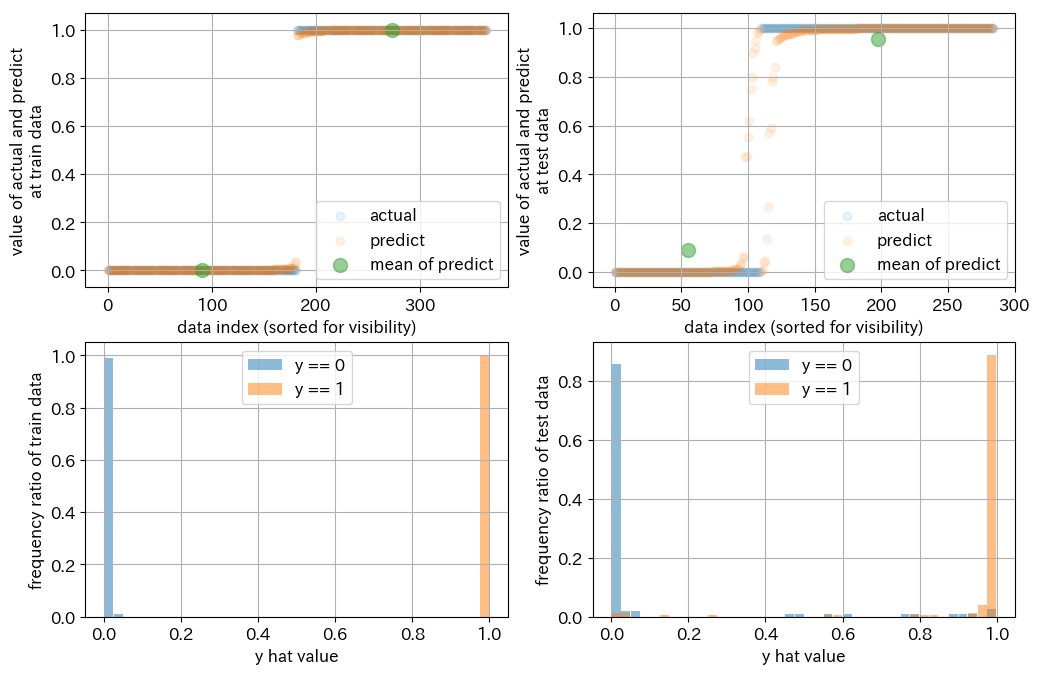

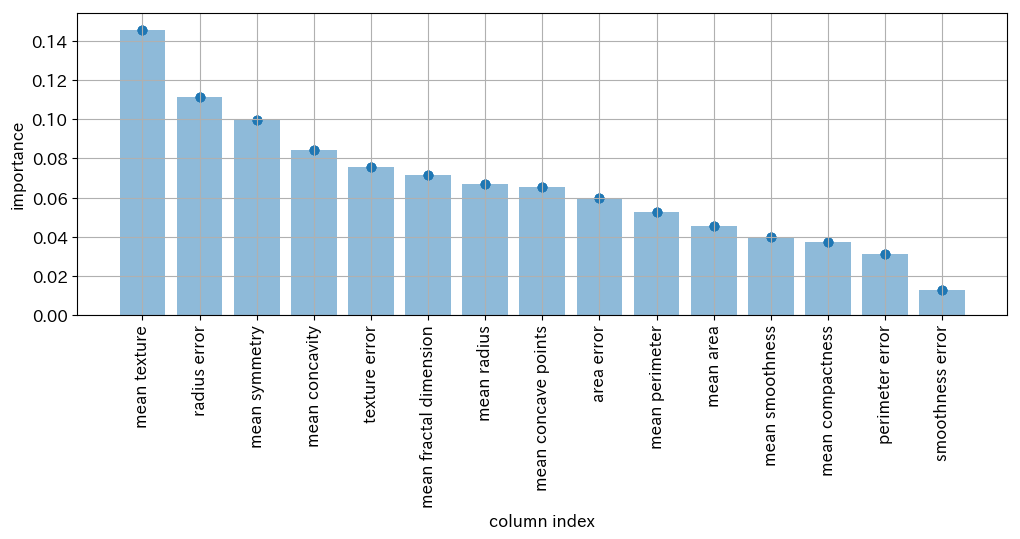

train on cv (model:[m:1,r:3] XGBoost_param0_RFE10, feature dim:10) [start time is 2019-07-09 17:41:41.775265]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:42.787545]




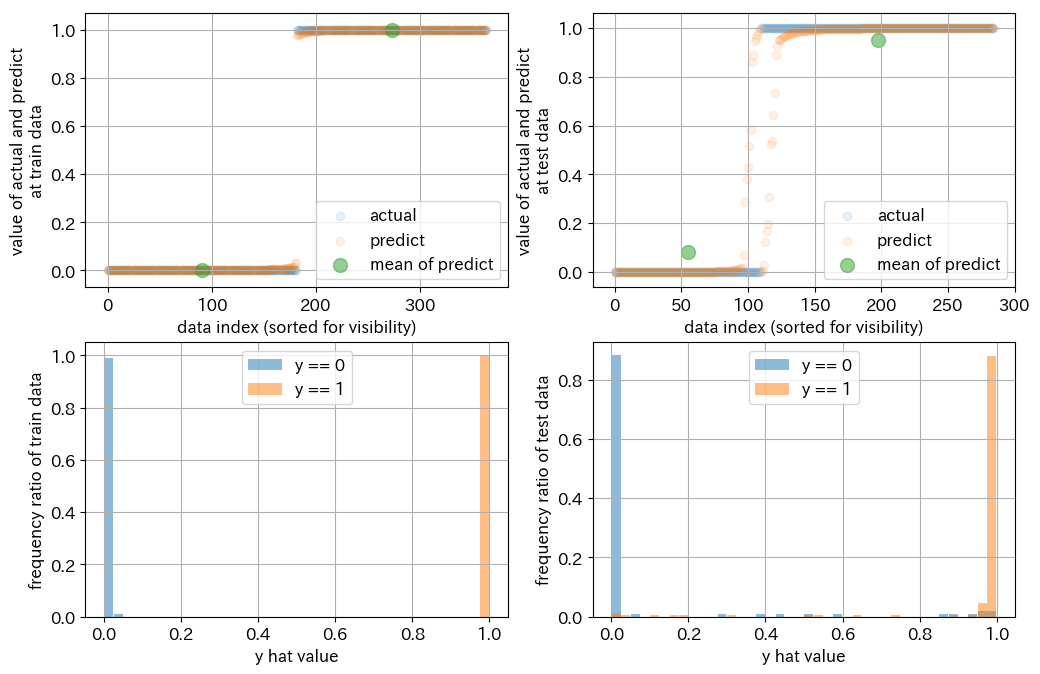

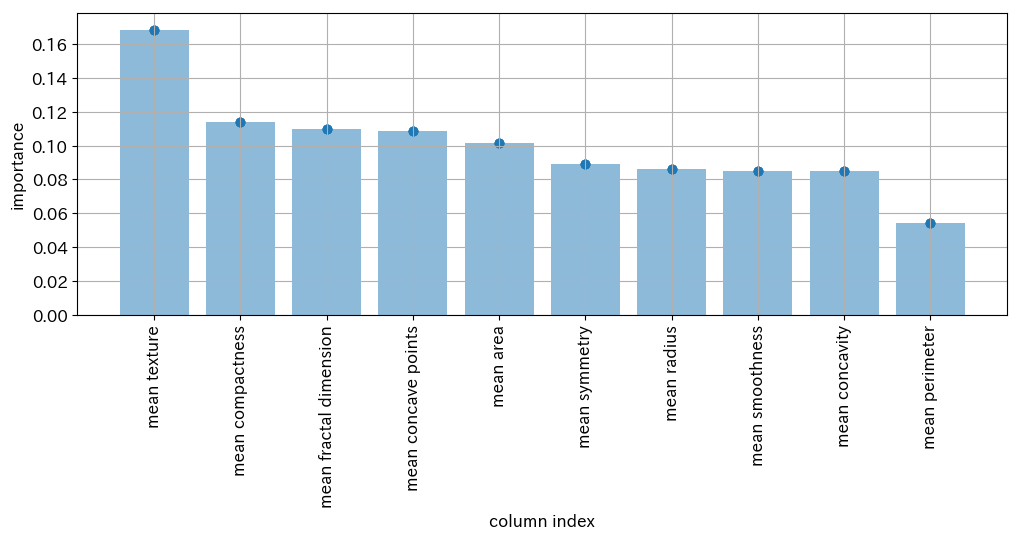

train on cv (model:[m:1,r:4] XGBoost_param0_RFE7, feature dim:7) [start time is 2019-07-09 17:41:43.853144]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:44.651973]




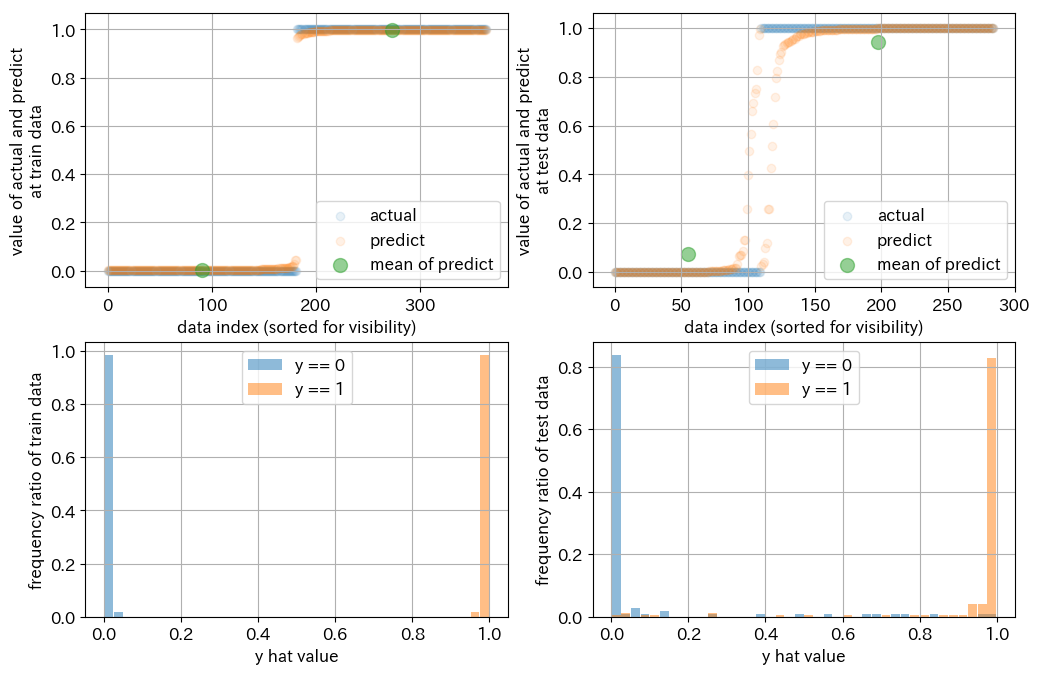

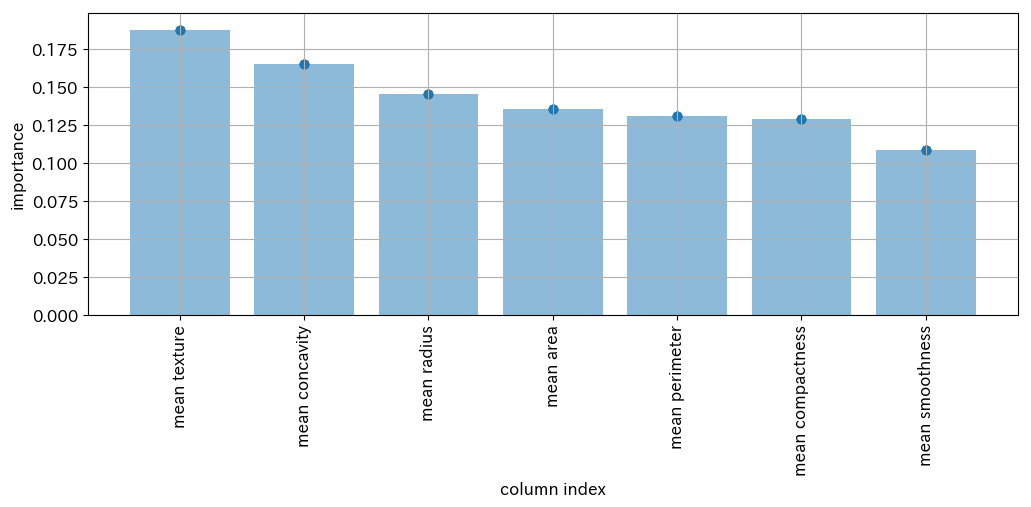

train on cv (model:[m:1,r:5] XGBoost_param0_RFE5, feature dim:5) [start time is 2019-07-09 17:41:45.662390]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:41:46.466283]




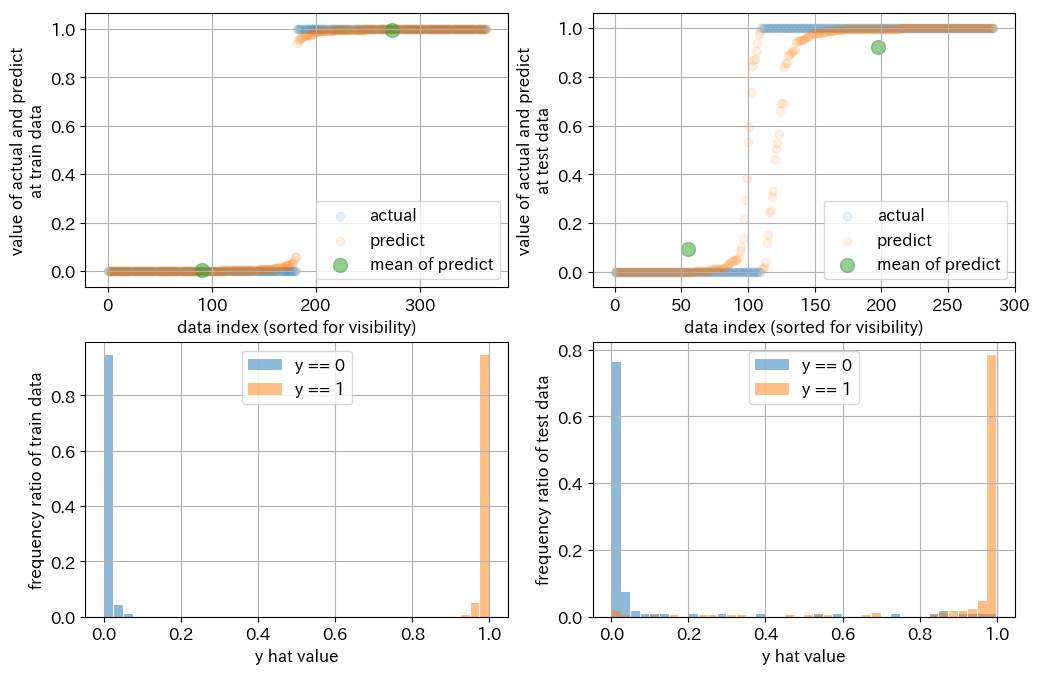

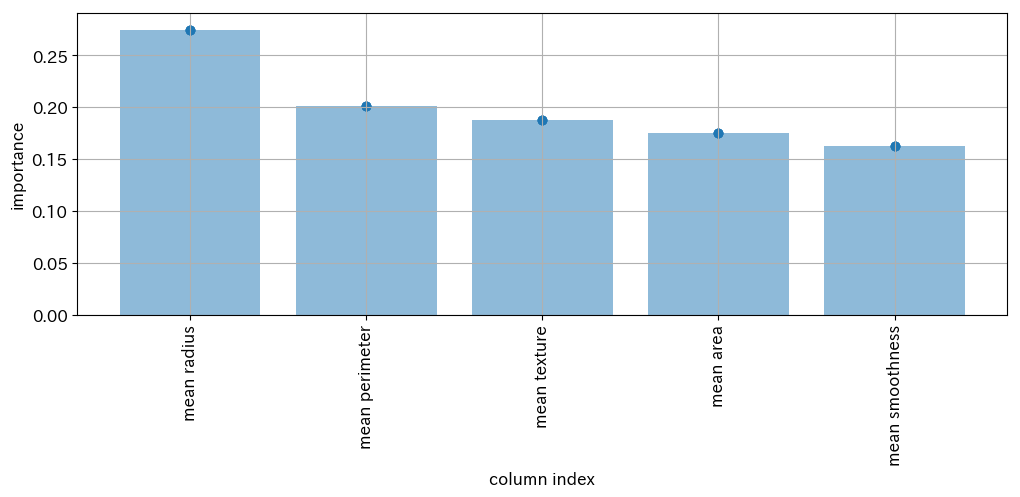

train on cv (model:[m:1,r:6] XGBoost_param0_RFE3, feature dim:3) [start time is 2019-07-09 17:41:47.559031]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.94 [end time is 2019-07-09 17:41:48.354475]




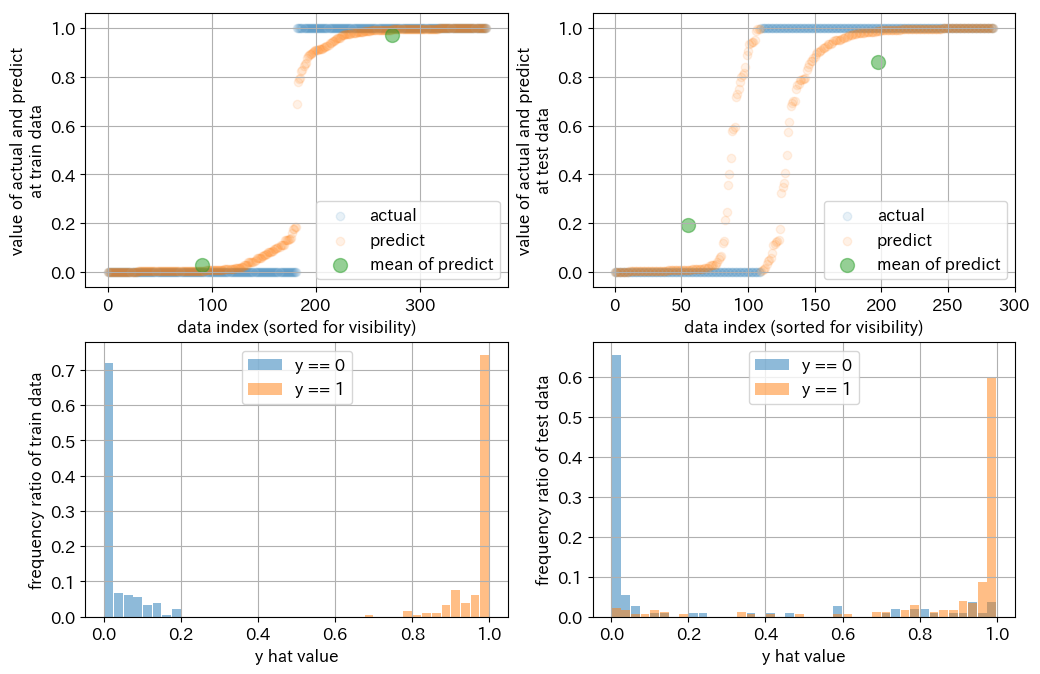

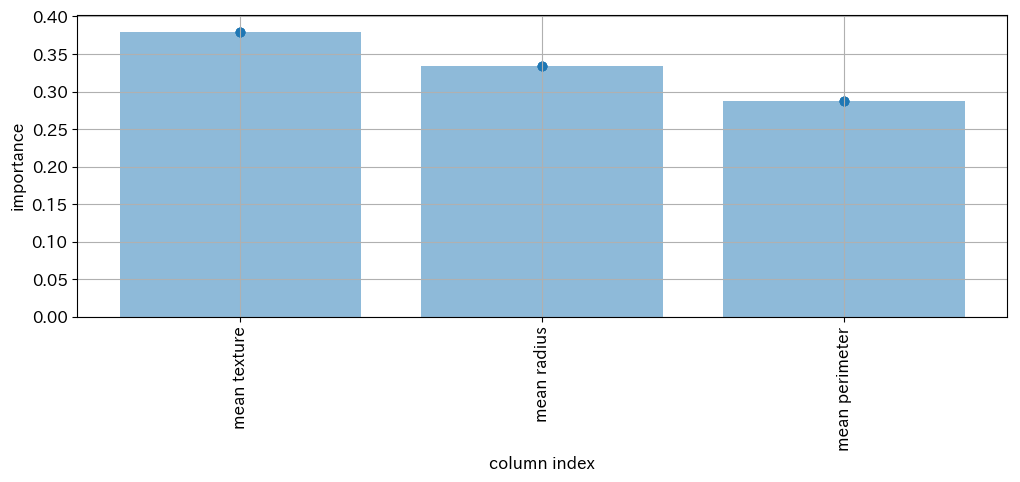

train on cv (model:[m:2,r:0] LogReg_param0_RFE30, feature dim:30) [start time is 2019-07-09 17:41:49.348324]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.96, test = 0.94 [end time is 2019-07-09 17:41:50.900266]




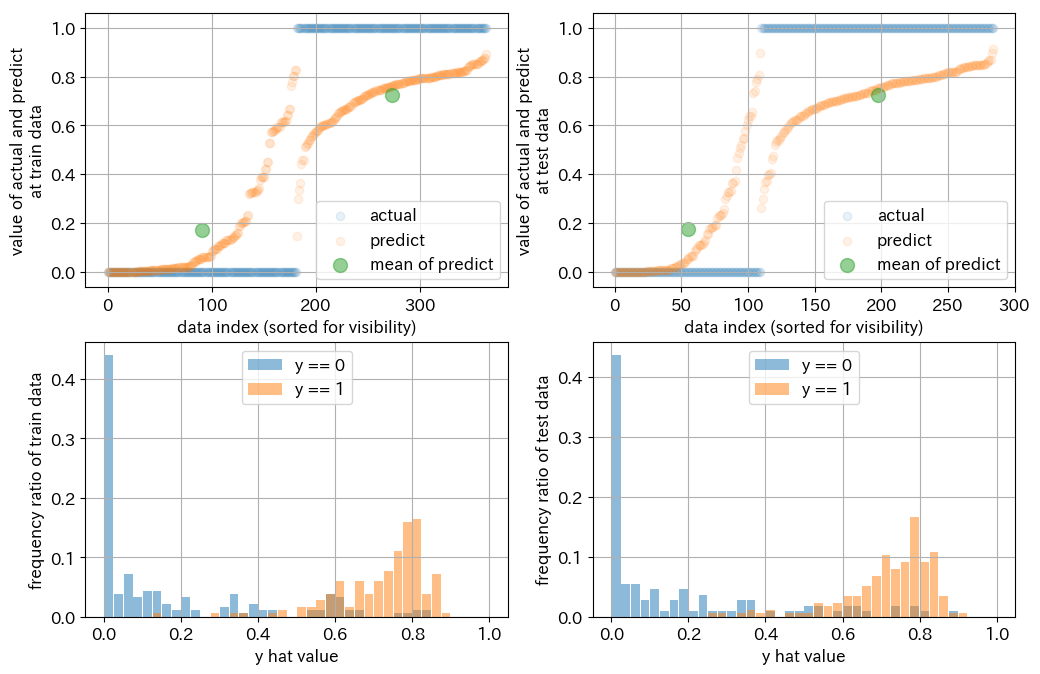

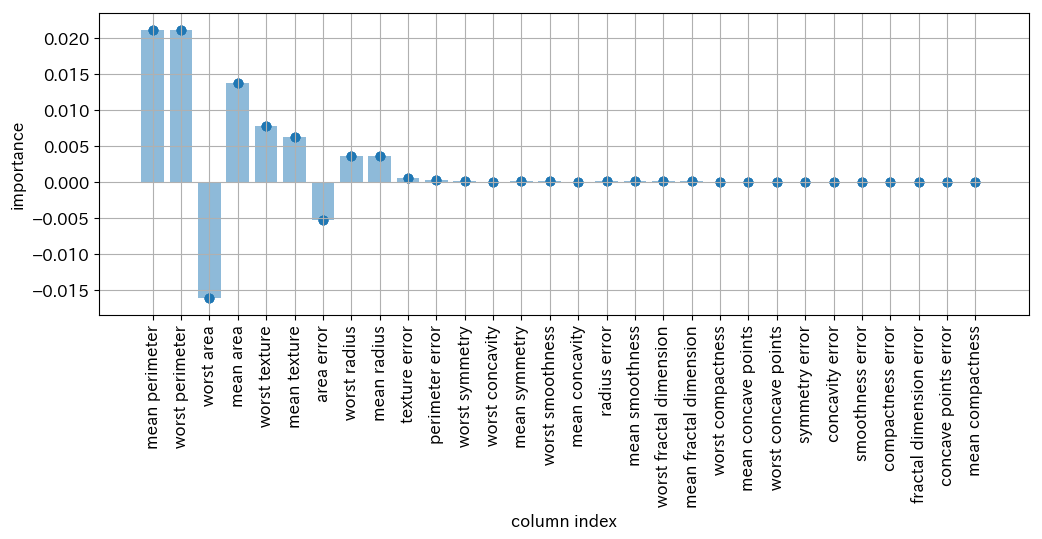

train on cv (model:[m:2,r:1] LogReg_param0_RFE20, feature dim:20) [start time is 2019-07-09 17:41:52.007709]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.89, test = 0.89 [end time is 2019-07-09 17:41:53.539910]




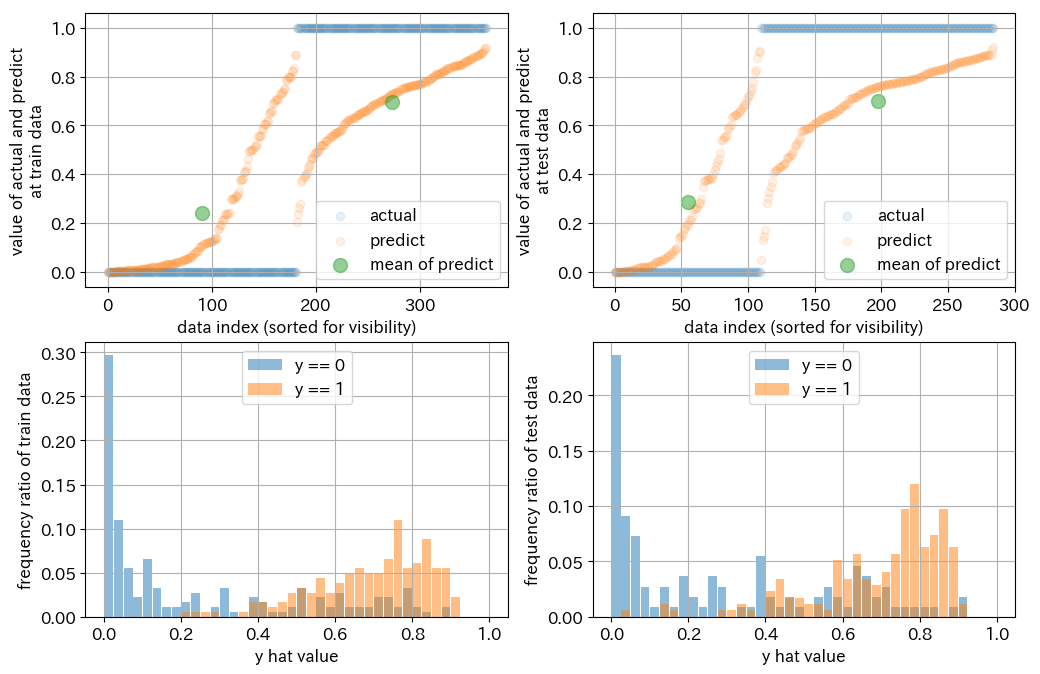

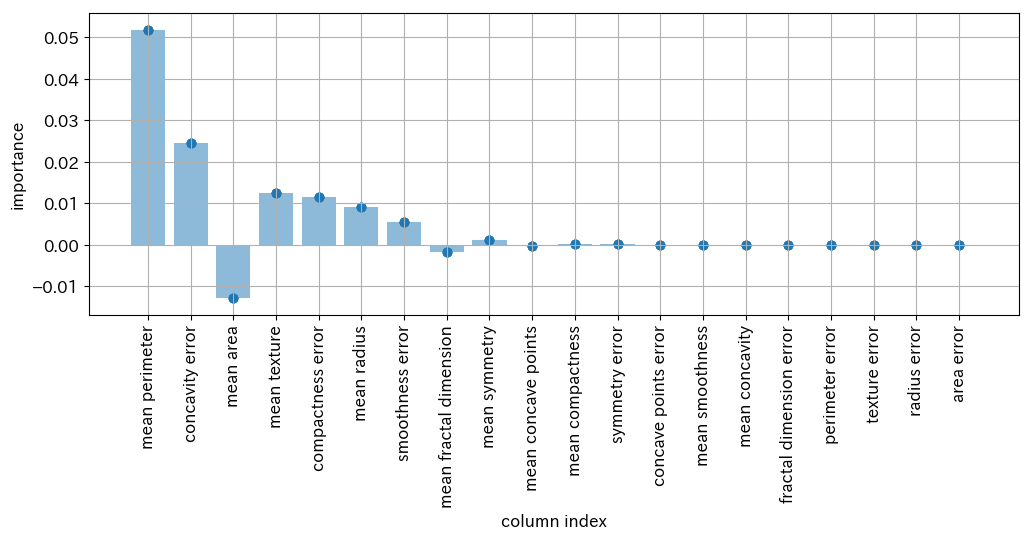

train on cv (model:[m:2,r:2] LogReg_param0_RFE15, feature dim:15) [start time is 2019-07-09 17:41:54.577731]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.91, test = 0.89 [end time is 2019-07-09 17:41:55.984128]




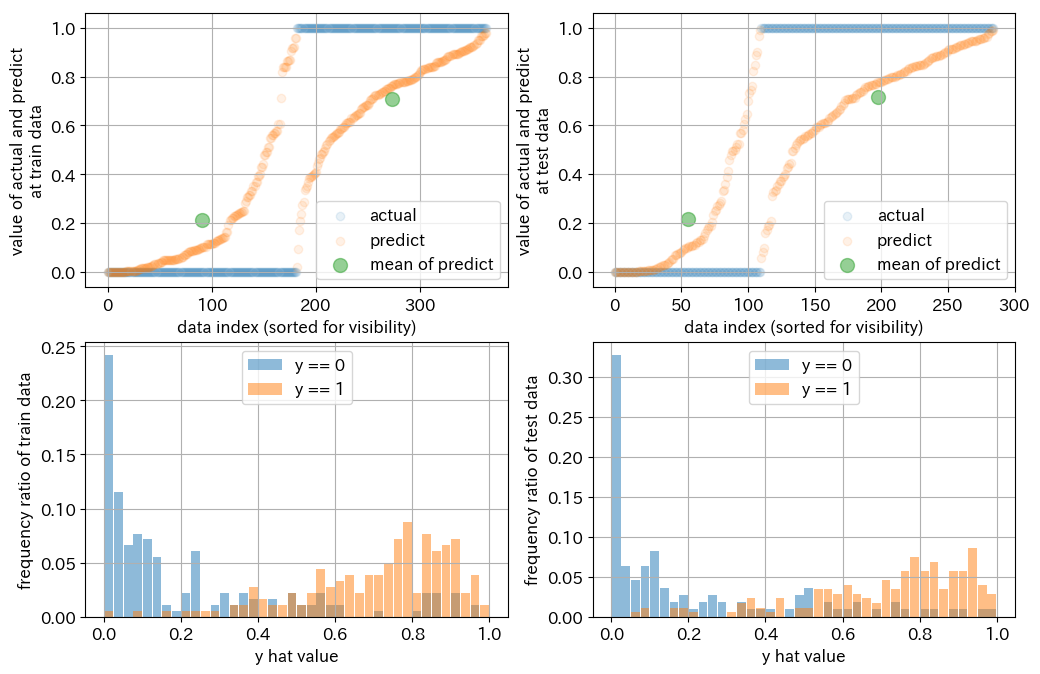

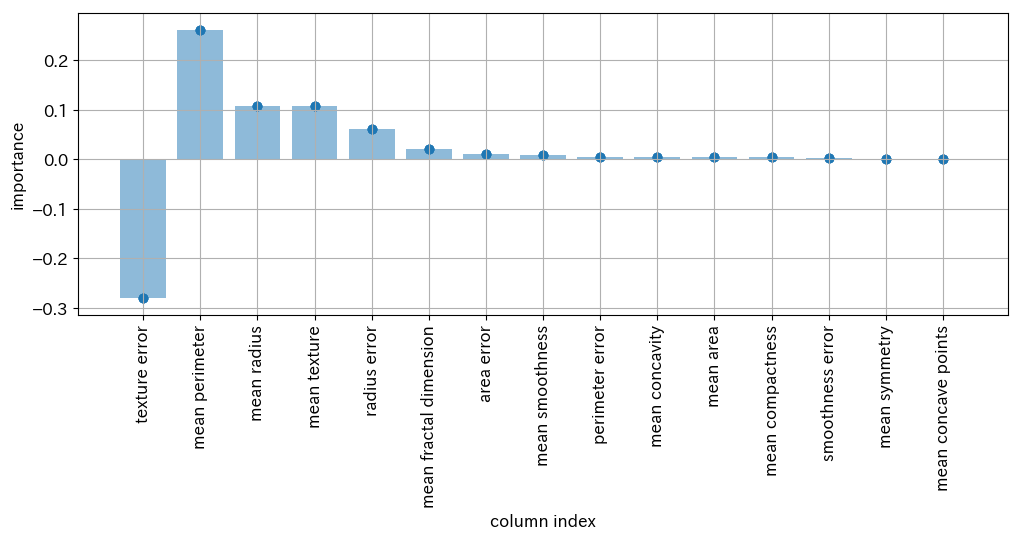

train on cv (model:[m:2,r:3] LogReg_param0_RFE10, feature dim:10) [start time is 2019-07-09 17:41:57.038185]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.87, test = 0.85 [end time is 2019-07-09 17:41:58.425843]




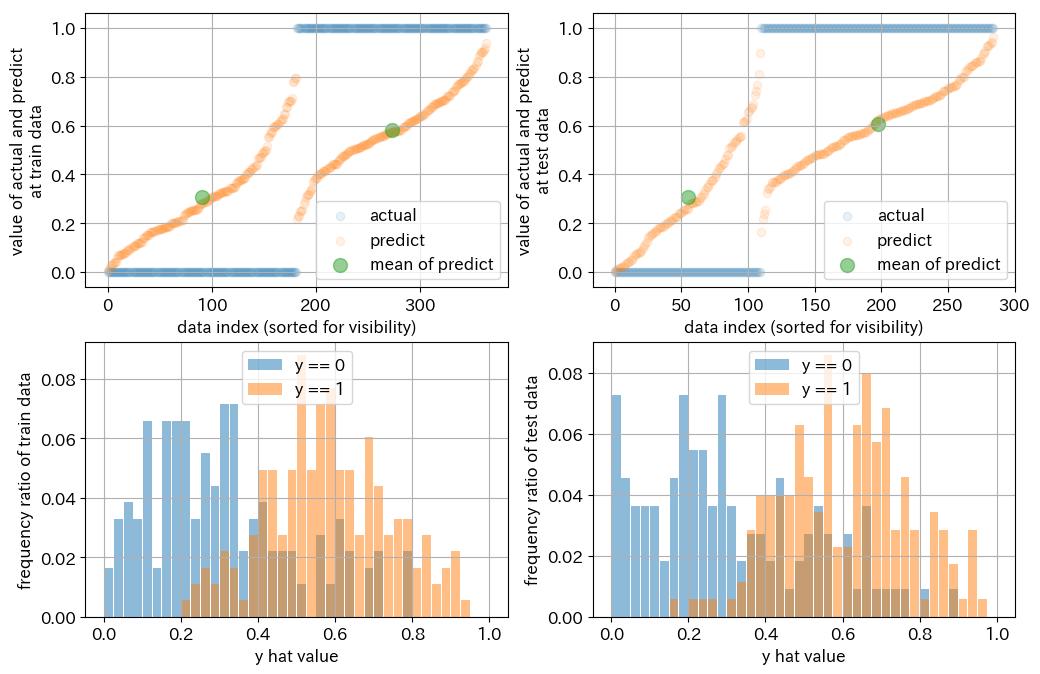

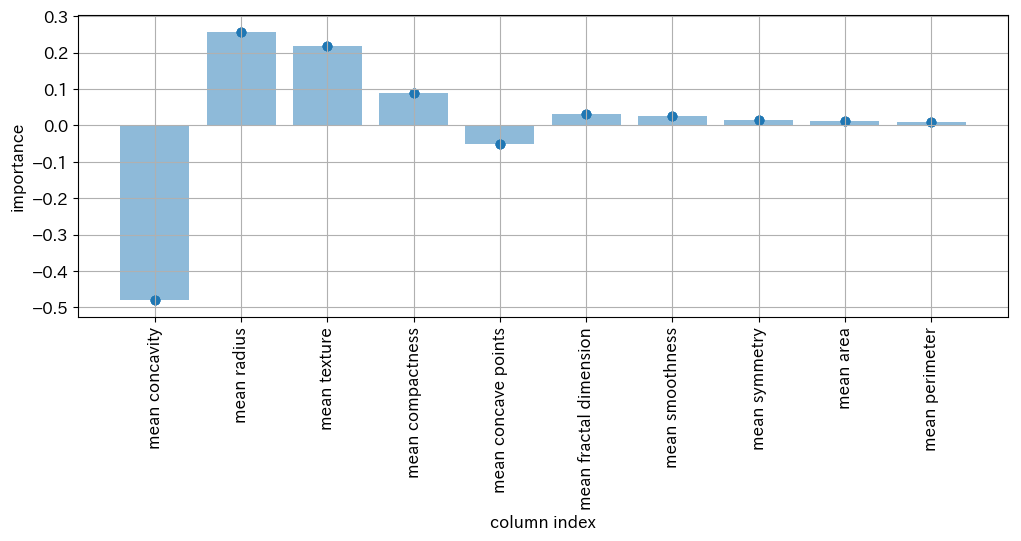

train on cv (model:[m:2,r:4] LogReg_param0_RFE7, feature dim:7) [start time is 2019-07-09 17:41:59.387147]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.78, test = 0.78 [end time is 2019-07-09 17:42:00.918511]




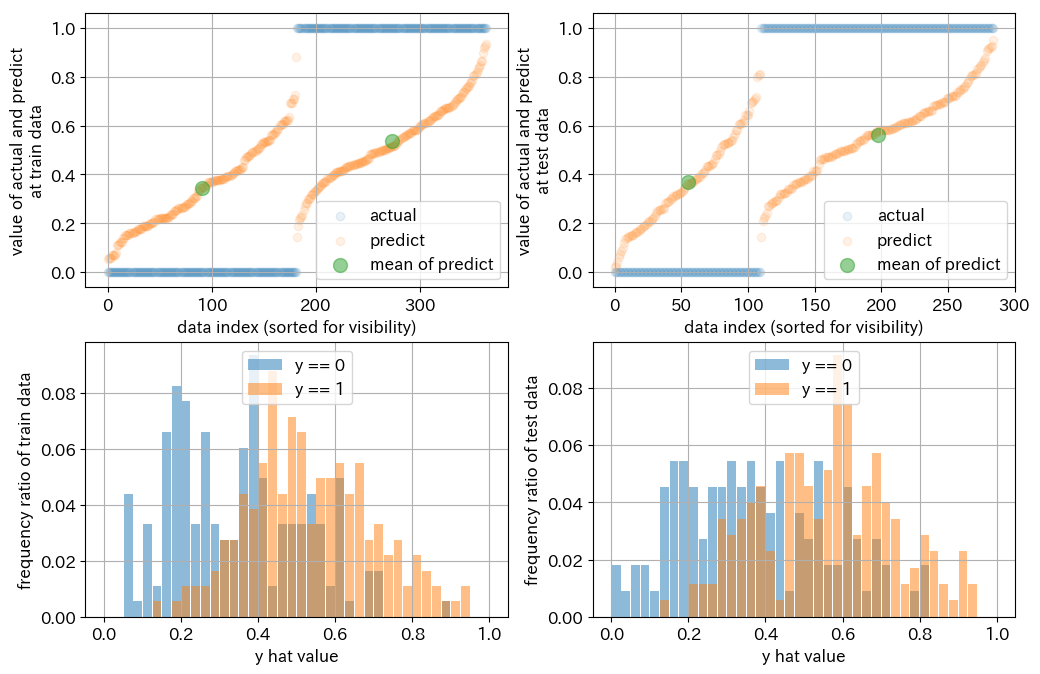

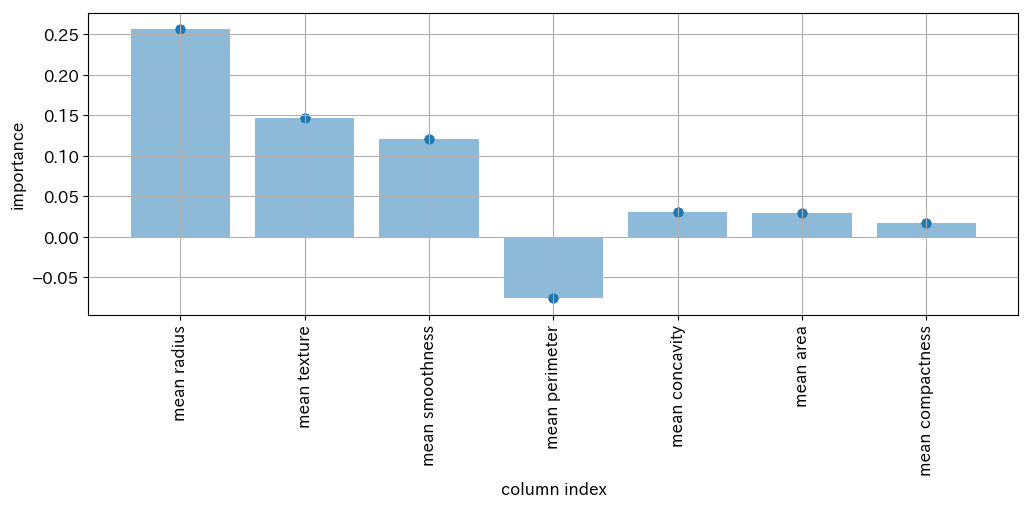

train on cv (model:[m:2,r:5] LogReg_param0_RFE5, feature dim:5) [start time is 2019-07-09 17:42:01.850758]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.92, test = 0.92 [end time is 2019-07-09 17:42:03.226830]




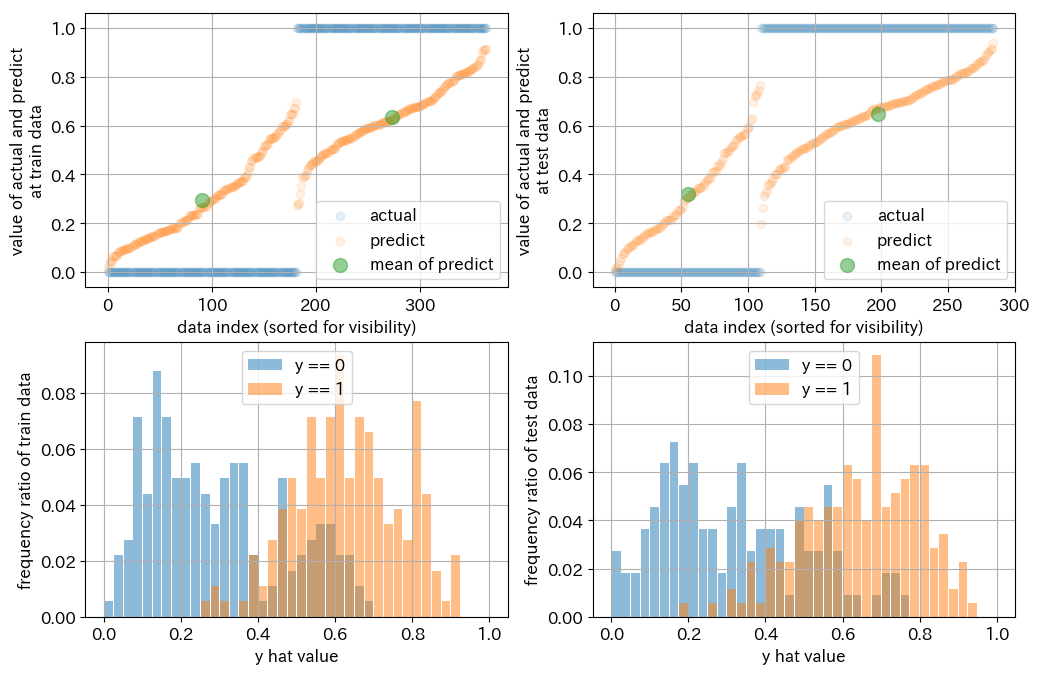

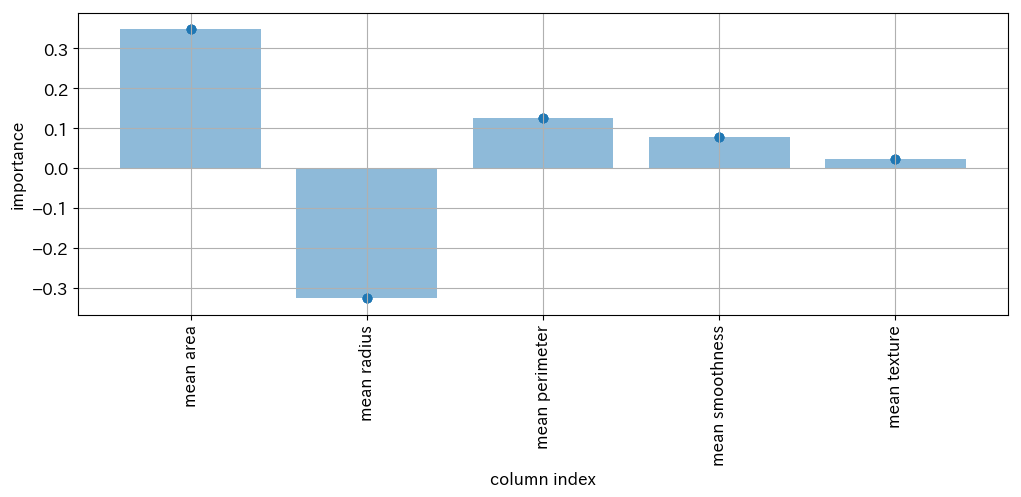

train on cv (model:[m:2,r:6] LogReg_param0_RFE3, feature dim:3) [start time is 2019-07-09 17:42:04.058039]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.67, test = 0.64 [end time is 2019-07-09 17:42:05.468595]




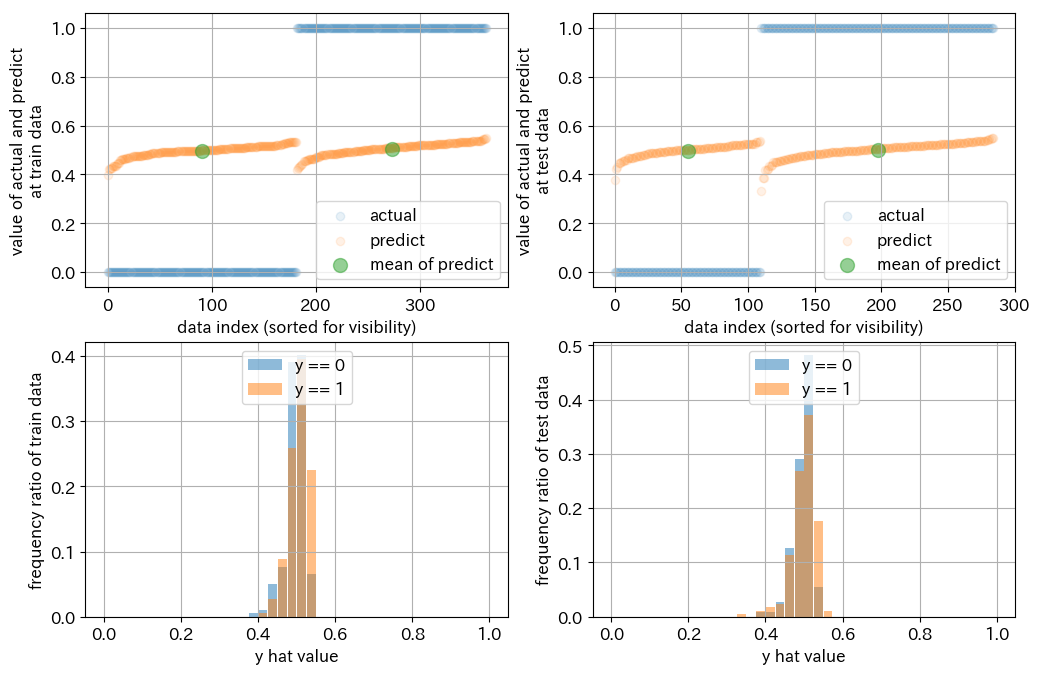

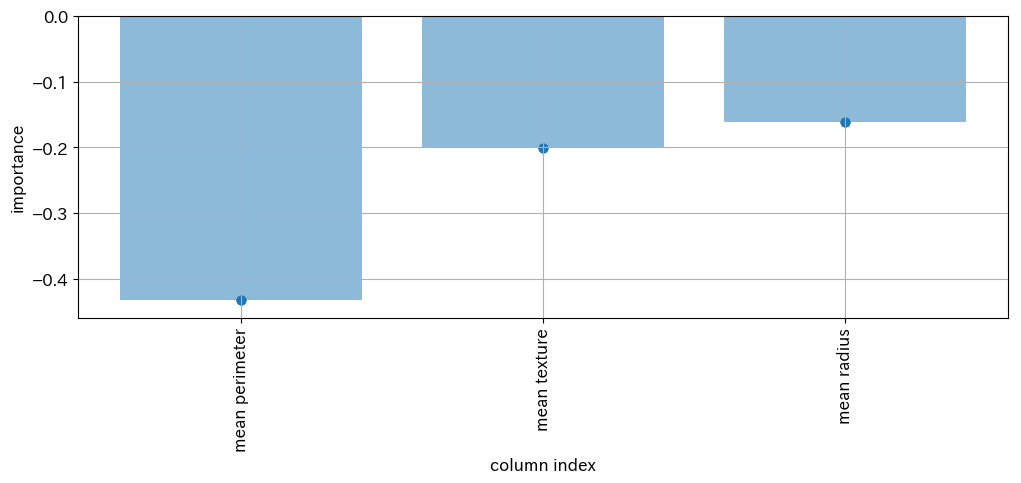



summary result


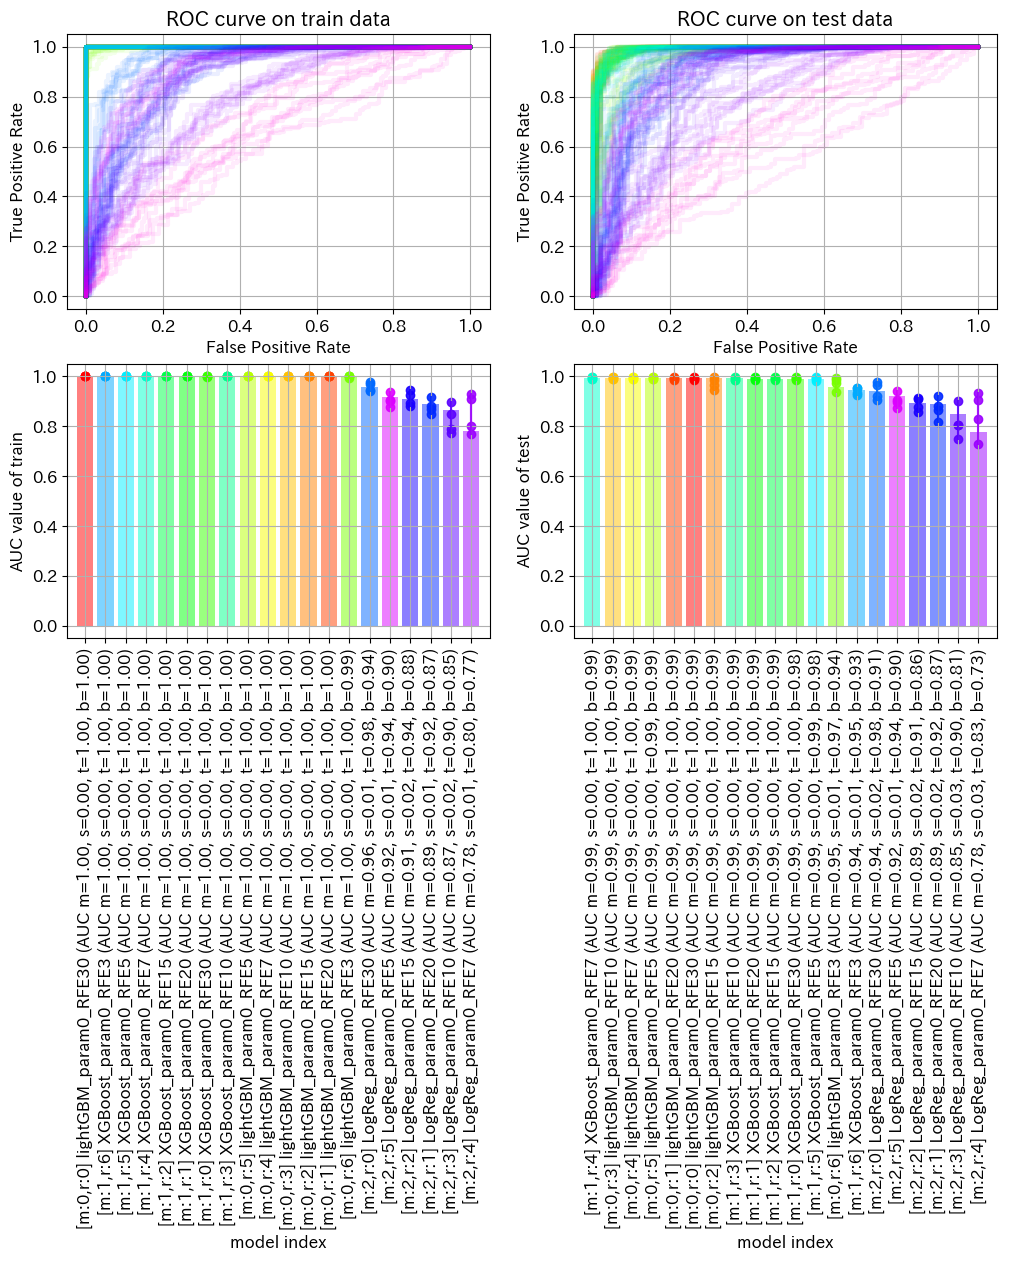

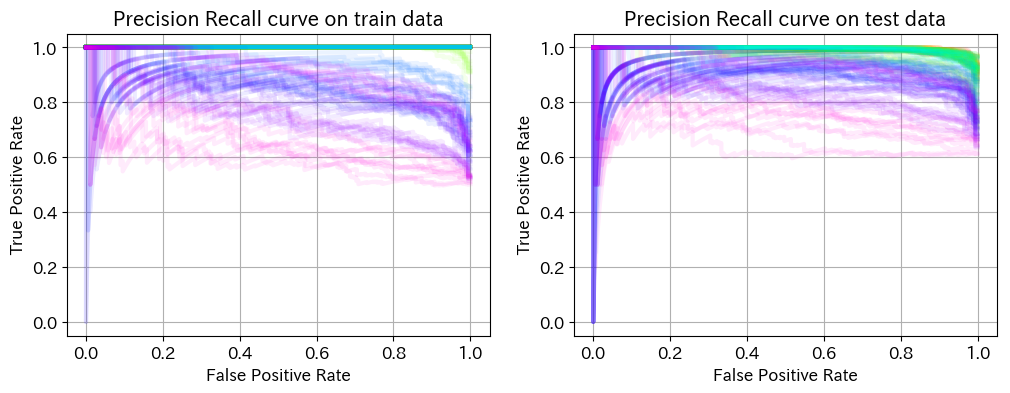

In [34]:
# [STEP 4]
# cross validation by multi model and rfe (with upsampling)
model      = []
model_name = []

# set common param
rfe_step   = [20, 15, 10, 7, 5, 3]

# 1. lightGBM
param = [[0.1, 100, 0.1, 30, 0.5, 0.5]]
for param_i in range(len(param)):
    model_tmp = LGBMClassifier(objective        = 'binary',  
                               learning_rate    = param[param_i][0], 
                               n_estimators     = param[param_i][1], 
                               min_child_weight = param[param_i][2],
                               num_leaves       = param[param_i][3],
                               colsample_bytree = param[param_i][4],
                               reg_lambda       = param[param_i][5],
                               subsample        = 1.0, 
                               random_state     = 0, 
                               n_jobs           = 4) 
    model.append(model_tmp)
    model_name.append('lightGBM_param%d' % (param_i))

# 2. XGBoost
param = [[0.1, 100, 0.1, 5, 0.5, 0.5]]
for param_i in range(len(param)):
    model_tmp = XGBClassifier(learning_rate    = param[param_i][0], 
                              n_estimators     = param[param_i][1], 
                              min_child_weight = param[param_i][2],
                              max_depth        = param[param_i][3],
                              colsample_bytree = param[param_i][4],
                              reg_lambda       = param[param_i][5],
                              subsample     = 1.0, 
                              random_state  = 0, 
                              n_jobs        = 4) 
    model.append(model_tmp)
    model_name.append('XGBoost_param%d' % (param_i))

# 3. LogisticRegression
param = [[0.1]]
for param_i in range(len(param)):
    model_tmp = LogisticRegression(C      = param[param_i][0], 
                                   solver = 'sag', 
                                   n_jobs = 4)
    model.append(model_tmp)
    model_name.append('LogReg_param%d' % (param_i))

# exec
(importance_stock, 
 rfe_step, 
 remain_idx, 
 model_name_stock, 
 idx_sort_auc_test) = ppap_tab_2c.rfe_and_cv(X              = X, 
                                             y              = y, 
                                             model          = model, 
                                             model_name     = model_name, 
                                             column_name    = column_name,
                                             sample_balance = True, 
                                             rfe_step       = rfe_step, 
                                             draw_cv_ratio  = 0.1)

plt.show()


model is ...
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.1, min_split_gain=0.0,
        n_estimators=100, n_jobs=4, num_leaves=30, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.5, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

use feature is ...
  - worst concave points : 135.80
  - worst texture : 134.40
  - worst smoothness : 131.80
  - worst area : 118.90
  - area error : 106.90

train on cv (model:lightGBM_param0, feature dim:5) [start time is 2019-07-09 17:42:10.446194]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-09 17:42:11.854114]




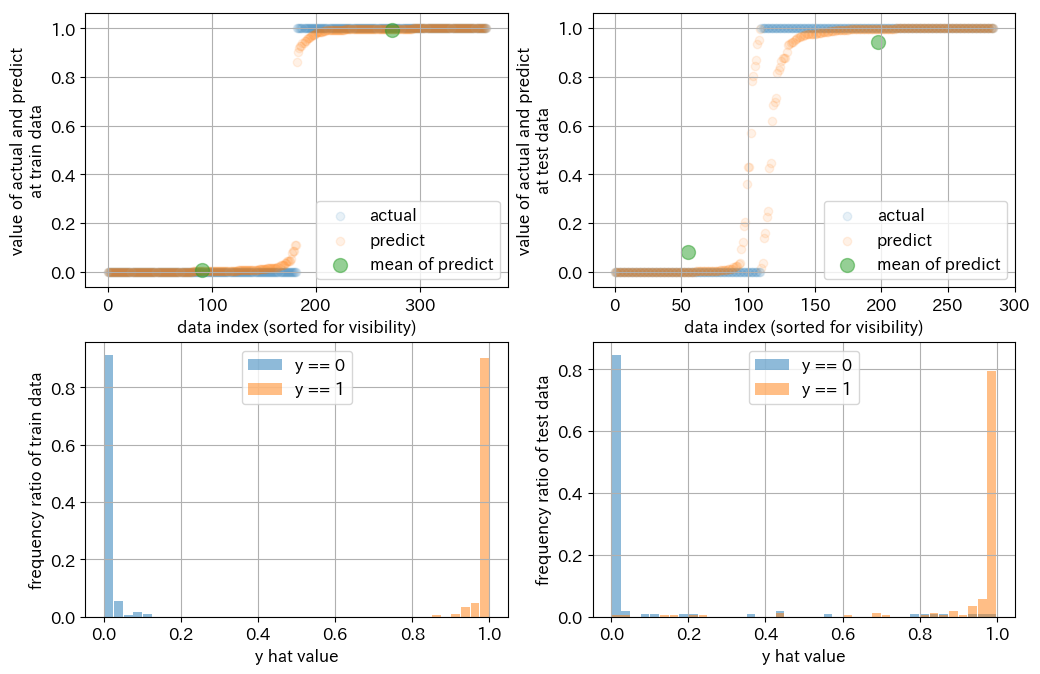

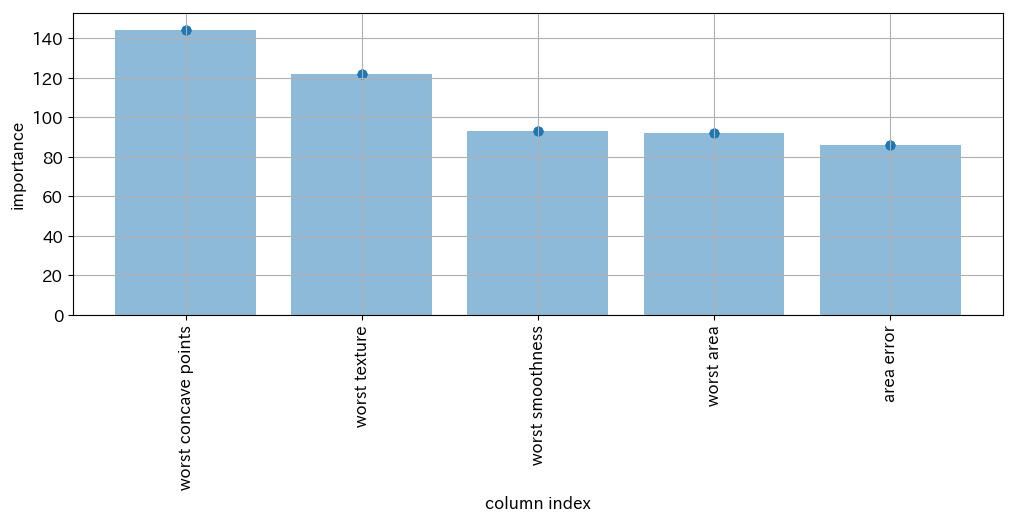



summary result


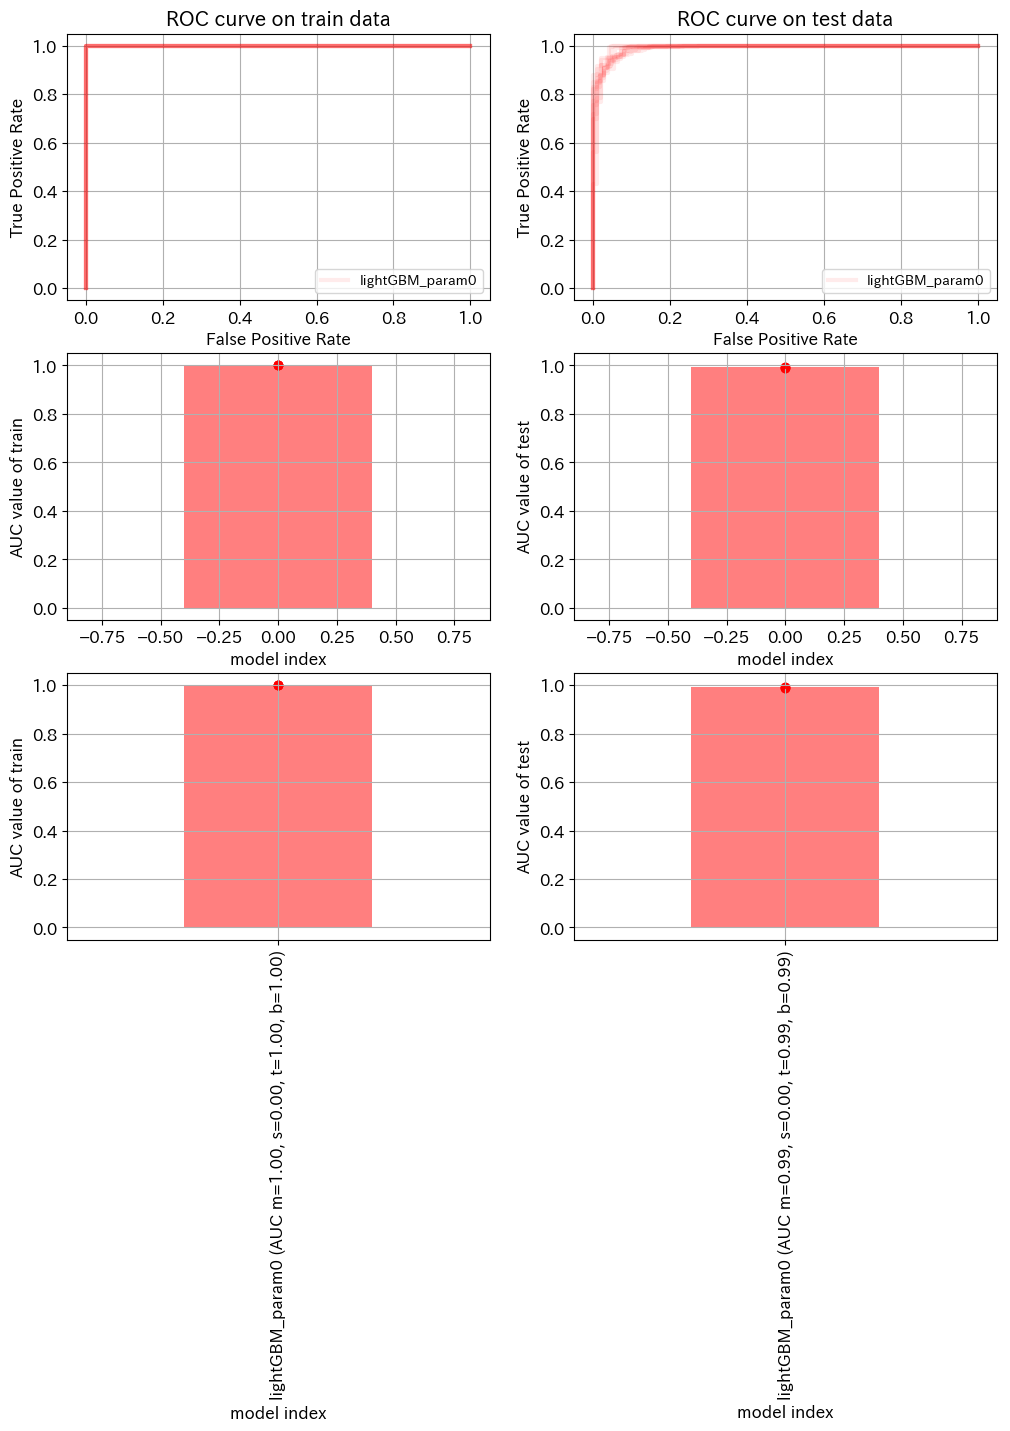

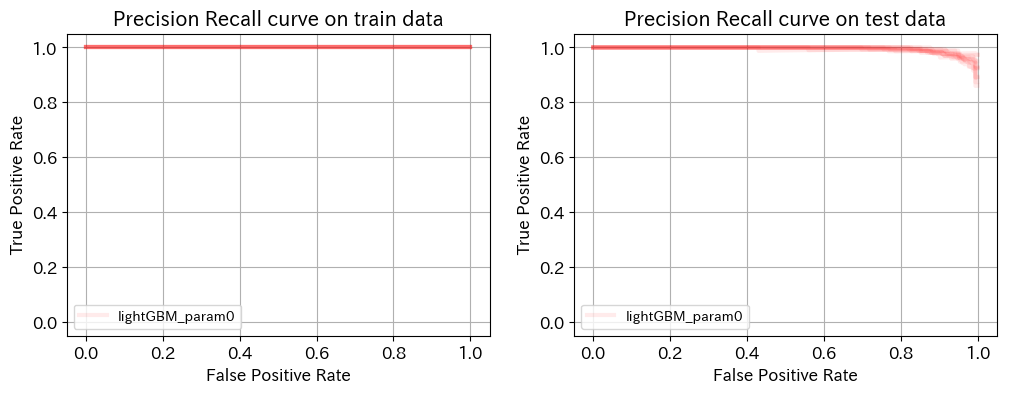

In [35]:
# [STEP ５]
# do the learning by good param setting 
rank_i       = 3 # choise method that column is small 

# 
model_i      = int(np.floor(idx_sort_auc_test[rank_i] / len(rfe_step)))
model_name_i = idx_sort_auc_test[rank_i]
rfe_step_i   = int(idx_sort_auc_test[rank_i] % len(rfe_step))

# 
model_       = model[model_i]
model_name_  = model_name_stock[idx_sort_auc_test[rank_i]]
model_name_  = model_name_[(model_name_.find('] ') + 2):]
model_name_  = model_name_[:model_name_.find('_RFE')]

# 
remain_idx_  = remain_idx[:, model_i, rfe_step_i]
X_slim       = X[:, remain_idx_]
column_name_ = column_name[remain_idx_]

# 
importance_  = np.mean(importance_stock[:, :, model_i, rfe_step_i], axis=1)

# 
print('model is ...')
print(model_)
print('')
print('use feature is ...')
for column_i in np.argsort(-importance_):
    if (remain_idx_[column_i]):
        print('  - %s : %.2f' % (column_name[column_i], importance_[column_i]))
print('')

# exec
(_, _, _, _, _) = ppap_tab_2c.cv_random(X              = X_slim, 
                                        y              = y, 
                                        model          = model_, 
                                        model_name     = model_name_, 
                                        column_name    = column_name_,
                                        sample_balance = True)


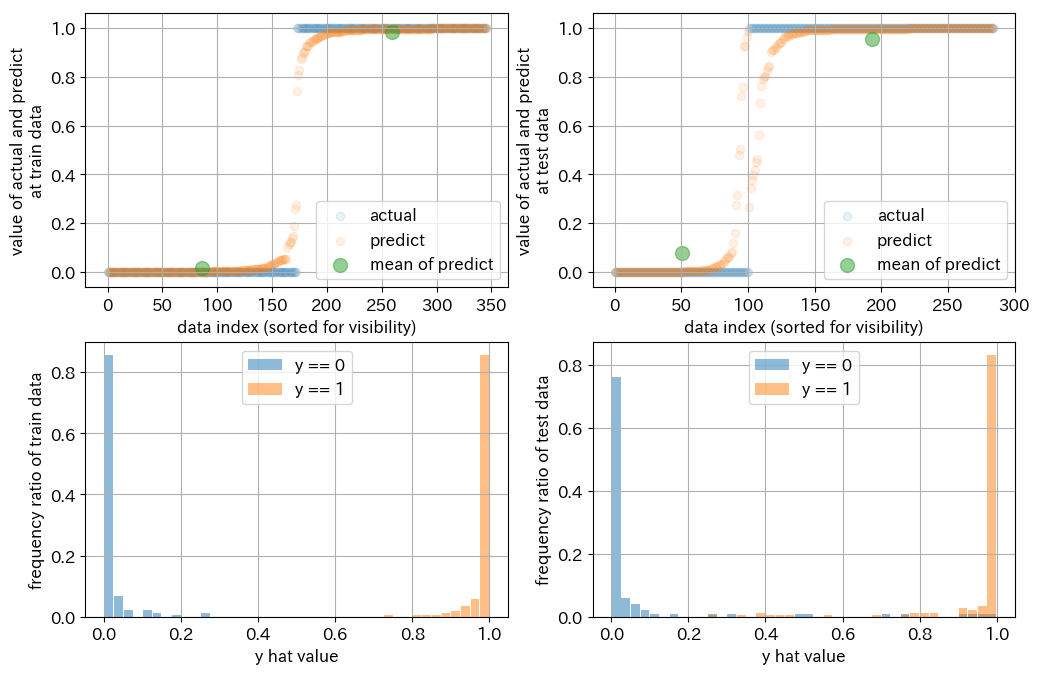

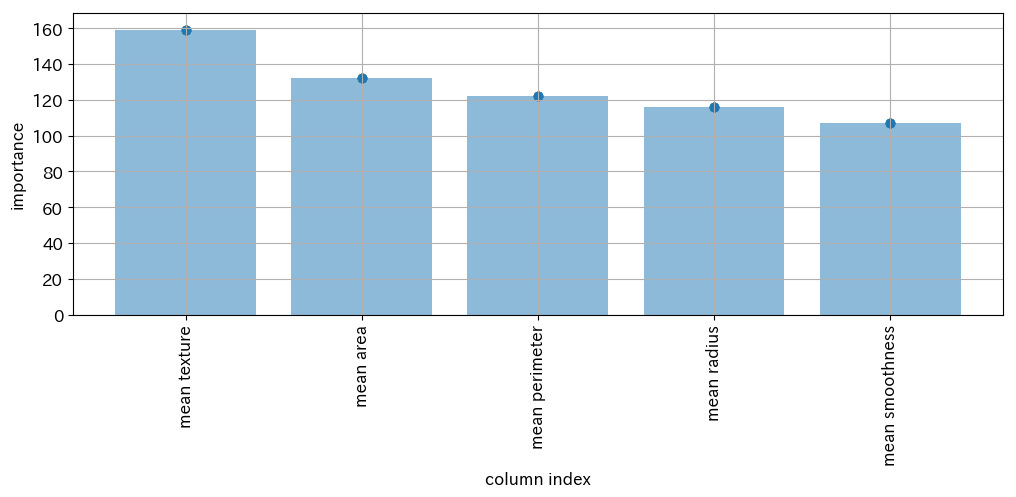

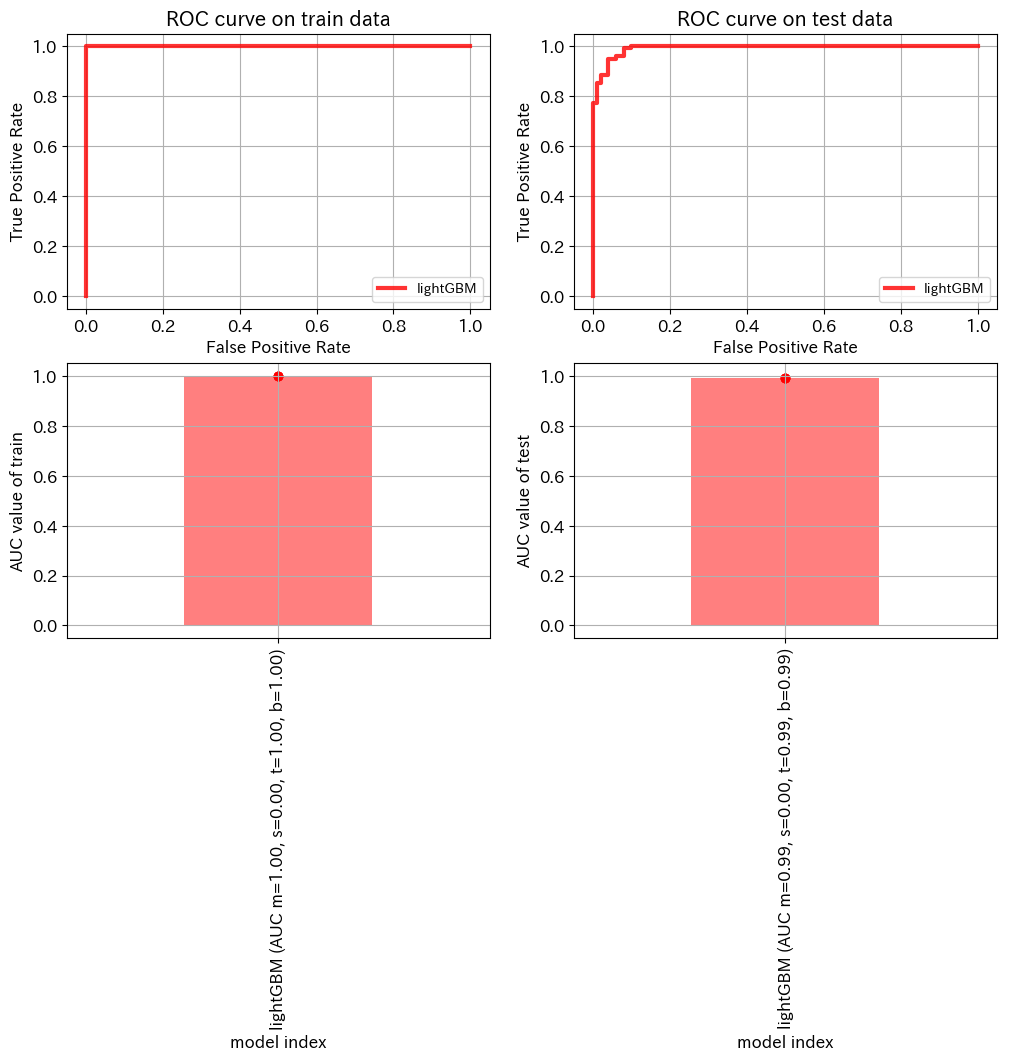

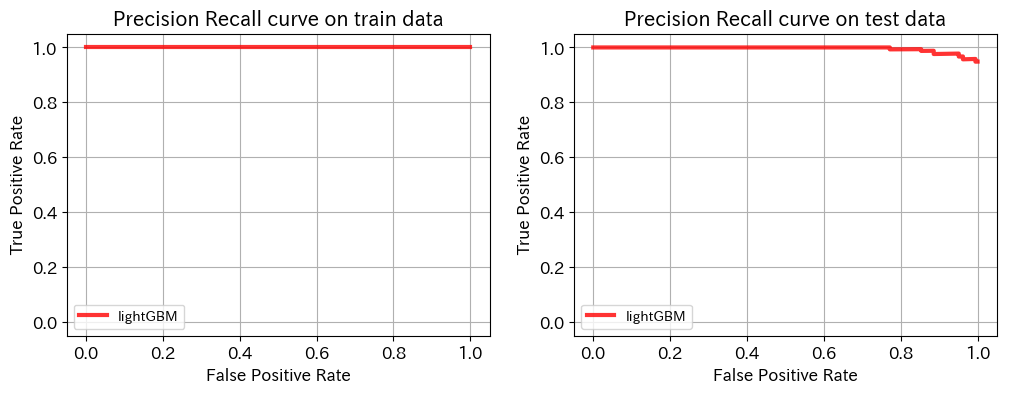

In [36]:
# [Step 6-1]
# try discretization for check wrong data
X_slim           = X[:, remain_idx_]
column_name_slim = column_name[remain_idx_]

# separate train data and test data
(X_train_slim, X_test_slim, 
 y_train, y_test) = train_test_split(X_slim, y, test_size=0.5, random_state=0)

# exec
np.random.seed(0) # need to confirm...
(learned_model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_2c.train_predict_and_measure(X_train        = X_train_slim,
                                                     y_train        = y_train,
                                                     X_test         = X_test_slim,
                                                     y_test         = y_test, 
                                                     model          = model_, 
                                                     column_name    = column_name, 
                                                     sample_balance = True)


In [37]:
# [Step 6-2]
# search large mistake

# knn search
(nearest_info) = ppap_tab_ut.knn_mistake_search(X           = X_test_slim, 
                                                y           = y_test, 
                                                y_hat       = y_test_hat, 
                                                column_name = column_name_slim, 
                                                k           = 20)

# view
df_nearest_info = nearest_info[0]
df_nearest_info


base   neighbor1   neighbor2   neighbor3  \
data index            252.000000  281.000000  115.000000    1.000000   
distance                0.000000    0.423459    0.479637    0.597428   
correct label           0.000000    1.000000    1.000000    1.000000   
prediction              0.988845    0.993603    0.995342    0.996197   
mistake                 0.988845    0.006397    0.004658    0.003803   
area error             19.870000   14.460000   20.200000   17.580000   
worst texture          33.370000   34.910000   32.040000   34.230000   
worst area            653.600000  357.600000  489.500000  632.900000   
worst smoothness        0.141900    0.138400    0.130300    0.128900   
worst concave points    0.093310    0.091270    0.074850    0.060050   

                       neighbor4   neighbor5   neighbor6   neighbor7  \
data index             47.000000  157.000000  133.000000  103.000000   
distance                0.654395    0.671229    0.673955    0.737178   
correct label           1.000000    0.000000    1.000000    1.000000   
prediction              0.993751    0.061152    0.977458    0.995288   
mistake                 0.006249    0.061152    0.022542    0.004712   
area error             22.070000   19.830000   15.090000   29.840000   
worst texture          30.280000   35.640000   29.160000   33.170000   
worst area            715.500000  848.700000  639.300000  706.700000   
worst smoothness        0.128700    0.147100    0.134900    0.124100   
worst concave points    0.079630    0.132900    0.112600    0.104800   

                       neighbor8   neighbor9  ...  neighbor11  neighbor12  \
data index            251.000000  118.000000  ...  244.000000  181.000000   
distance                0.770928    0.770989  ...    0.971361    0.980205   
correct label           1.000000    1.000000  ...    1.000000    1.000000   
prediction              0.960072    0.996970  ...    0.993342    0.983183   
mistake                 0.039928    0.003030  ...    0.006658    0.016817   
area error             27.240000   18.040000  ...   23.220000   15.340000   
worst texture          28.360000   31.990000  ...   29.460000   28.810000   
worst area            638.400000  622.900000  ...  402.800000  550.600000   
worst smoothness        0.142900    0.125600  ...    0.151500    0.155000   
worst concave points    0.108000    0.063350  ...    0.067360    0.081200   

                      neighbor13  neighbor14  neighbor15  neighbor16  \
data index             69.000000  263.000000   75.000000  226.000000   
distance                0.982023    1.064077    1.104106    1.108862   
correct label           1.000000    1.000000    1.000000    1.000000   
prediction              0.994437    0.997716    0.999145    0.993803   
mistake                 0.005563    0.002284    0.000855    0.006197   
area error             14.200000   16.830000   21.190000   19.530000   
worst texture          31.560000   35.740000   31.880000   27.210000   
worst area            330.700000  595.700000  628.500000  522.900000   
worst smoothness        0.154800    0.122700    0.121800    0.142600   
worst concave points    0.065170    0.064930    0.059210    0.082630   

                      neighbor17  neighbor18  neighbor19  neighbor20  
data index            134.000000  242.000000  222.000000   94.000000  
distance                1.193447    1.201774    1.314095    1.355155  
correct label           1.000000    1.000000    0.000000    1.000000  
prediction              0.984078    0.996644    0.027653    0.992631  
mistake                 0.015922    0.003356    0.027653    0.007369  
area error             16.390000   25.790000   43.400000   25.170000  
worst texture          27.960000   28.880000   29.870000   31.240000  
worst area            472.900000  610.200000  993.600000  359.400000  
worst smoothness        0.134700    0.124000    0.140100    0.152600  
worst concave points    0.121800    0.095320    0.116000    0.037700  

[10 rows x 21 colum

In [38]:
# 
pd.DataFrame(X_slim, columns=column_name_slim).describe()


area error  worst texture   worst area  worst smoothness  \
count  569.000000     569.000000   569.000000        569.000000   
mean    40.337079      25.677223   880.583128          0.132369   
std     45.491006       6.146258   569.356993          0.022832   
min      6.802000      12.020000   185.200000          0.071170   
25%     17.850000      21.080000   515.300000          0.116600   
50%     24.530000      25.410000   686.500000          0.131300   
75%     45.190000      29.720000  1084.000000          0.146000   
max    542.200000      49.540000  4254.000000          0.222600   

       worst concave points  
count            569.000000  
mean               0.114606  
std                0.065732  
min                0.000000  
25%                0.064930  
50%                0.099930  
75%                0.161400  
max                0.291000

In [39]:
# [Step 6-3]
# try to make reduce mistake
idx_tmp   = int(df_nearest_info.loc['data index', 'base'])
y_tmp     = y_test[idx_tmp]
X_tmp     = X_test_slim[[idx_tmp], :]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat before = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))

# 
example       = 'neighbor5'
column_change = ['worst area', 'worst concave points']

for column_i in range(len(column_change)):
    X_tmp[:, column_name_slim == column_change[column_i]] = df_nearest_info.loc[column_change[column_i], example]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat after  = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))


y_hat before = 0.988845 (correct = 0)
y_hat after  = 0.072927 (correct = 0)


In [40]:
# [Step 6-4]
# use LIME



1-k conding or discretization [start time is 2019-07-09 17:42:16.738575]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                              [end time is 2019-07-09 17:42:17.495035]



after quantize size = (569, 50)


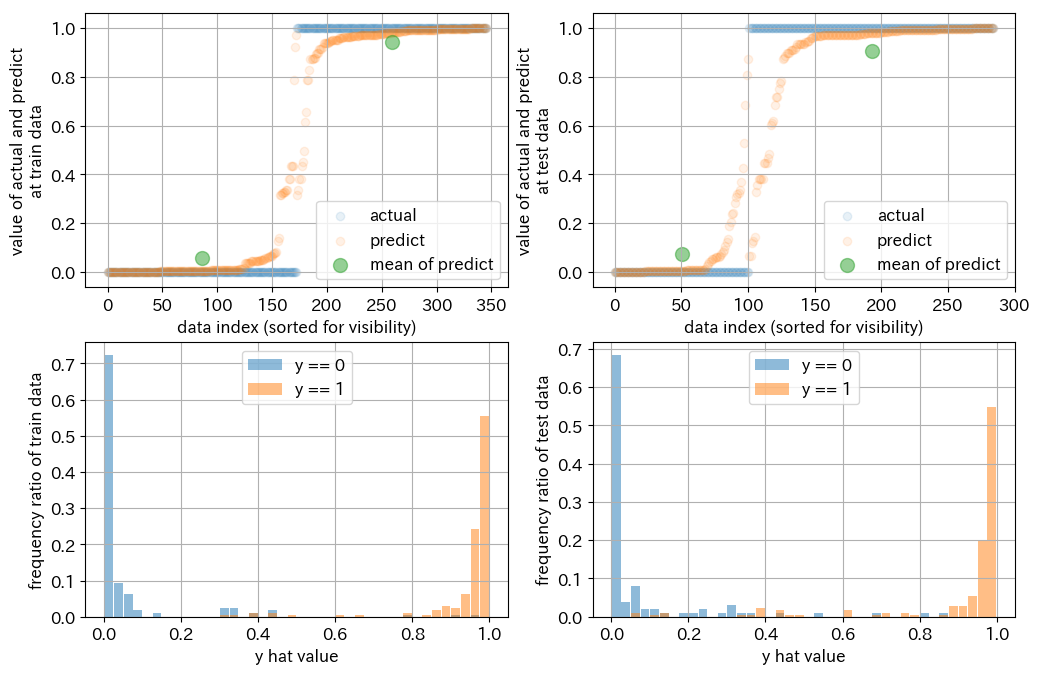

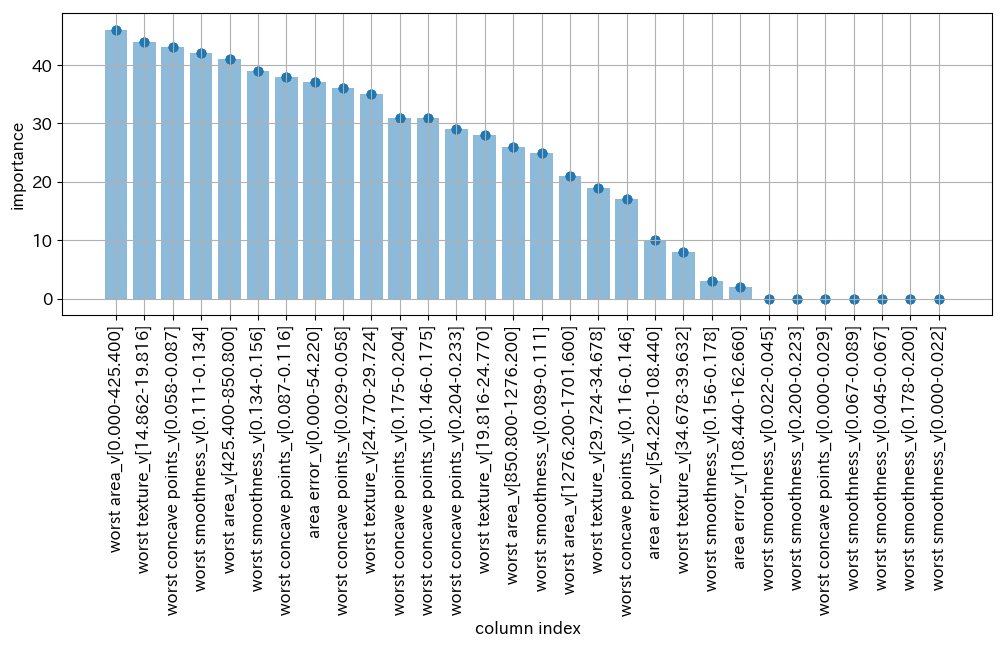

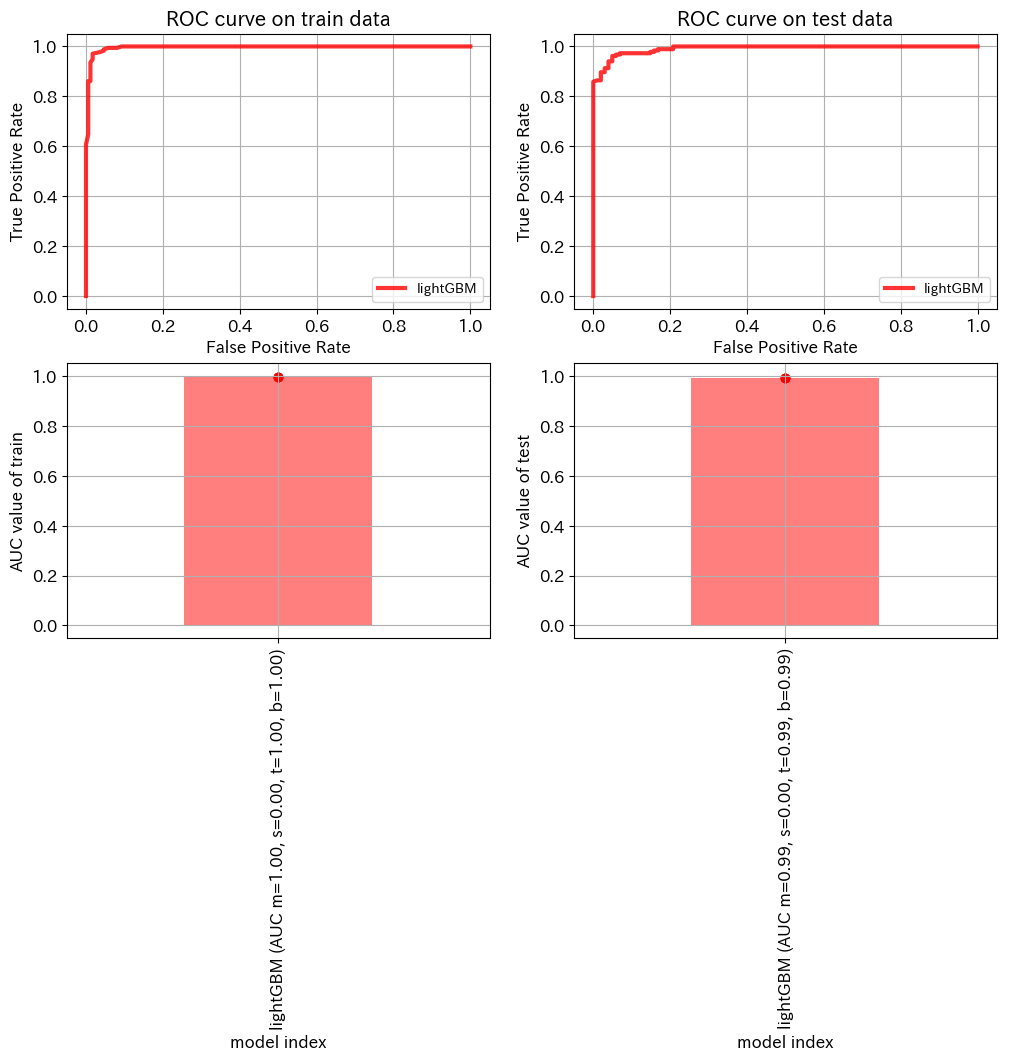

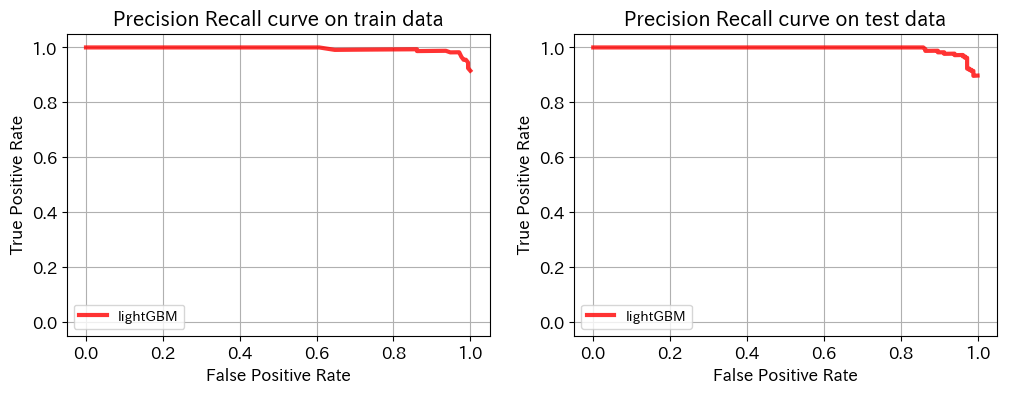

In [41]:
# [Step 7-1]
# try discretization for check wrong data
column_1k   = []               # set code column
column_disc = column_name_slim # set real number column
column_bow  = []               # set text column

# discretization data value
(X_disc, 
 column_name_disc)= ppap_tab_ut.one_k_code_and_disc(X             = X_slim, 
                                                    column_1k     = column_1k, 
                                                    column_disc   = column_disc,
                                                    column_bow    = column_bow, 
                                                    column_name   = column_name_slim, 
                                                    disc_bins_num = 10)

# separate train data and test data
(X_train_disc, X_test_disc, 
 y_train, y_test) = train_test_split(X_disc, y, test_size=0.5, random_state=0)

# exec
(learned_model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_2c.train_predict_and_measure(X_train        = X_train_disc,
                                                     y_train        = y_train,
                                                     X_test         = X_test_disc,
                                                     y_test         = y_test, 
                                                     model          = model_, 
                                                     column_name    = column_name_disc, 
                                                     sample_balance = True)


In [42]:
# [Step 7-2]
# search large mistake

# knn search
(nearest_info) = ppap_tab_ut.knn_mistake_search(X           = X_test_disc, 
                                                y           = y_test, 
                                                y_hat       = y_test_hat, 
                                                column_name = column_name_disc, 
                                                k           = 20, 
                                                X_normalize = False)

# view
df_nearest_info = nearest_info[0]
df_nearest_info


base   neighbor1   neighbor2  \
data index                           162.000000  284.000000  181.000000   
distance                               0.000000    2.000000    2.000000   
correct label                          1.000000    1.000000    1.000000   
prediction                             0.064147    0.971878    0.971878   
mistake                                0.935853    0.028122    0.028122   
area error_v[0.000-54.220]             1.000000    1.000000    1.000000   
area error_v[54.220-108.440]           0.000000    0.000000    0.000000   
area error_v[108.440-162.660]          0.000000    0.000000    0.000000   
area error_v[162.660-216.880]          0.000000    0.000000    0.000000   
area error_v[216.880-271.100]          0.000000    0.000000    0.000000   
area error_v[271.100-325.320]          0.000000    0.000000    0.000000   
area error_v[325.320-379.540]          0.000000    0.000000    0.000000   
area error_v[379.540-433.760]          0.000000    0.000000    0.000000   
area error_v[433.760-487.980]          0.000000    0.000000    0.000000   
area error_v[487.980-542.200]          0.000000    0.000000    0.000000   
worst texture_v[0.000-4.954]           0.000000    0.000000    0.000000   
worst texture_v[4.954-9.908]           0.000000    0.000000    0.000000   
worst texture_v[9.908-14.862]          0.000000    0.000000    0.000000   
worst texture_v[14.862-19.816]         0.000000    0.000000    0.000000   
worst texture_v[19.816-24.770]         0.000000    0.000000    0.000000   
worst texture_v[24.770-29.724]         1.000000    1.000000    1.000000   
worst texture_v[29.724-34.678]         0.000000    0.000000    0.000000   
worst texture_v[34.678-39.632]         0.000000    0.000000    0.000000   
worst texture_v[39.632-44.586]         0.000000    0.000000    0.000000   
worst texture_v[44.586-49.540]         0.000000    0.000000    0.000000   
worst area_v[0.000-425.400]            0.000000    0.000000    0.000000   
worst area_v[425.400-850.800]          1.000000    1.000000    1.000000   
worst area_v[850.800-1276.200]         0.000000    0.000000    0.000000   
worst area_v[1276.200-1701.600]        0.000000    0.000000    0.000000   
worst area_v[1701.600-2127.000]        0.000000    0.000000    0.000000   
worst area_v[2127.000-2552.400]        0.000000    0.000000    0.000000   
worst area_v[2552.400-2977.800]        0.000000    0.000000    0.000000   
worst area_v[2977.800-3403.200]        0.000000    0.000000    0.000000   
worst area_v[3403.200-3828.600]        0.000000    0.000000    0.000000   
worst area_v[3828.600-4254.000]        0.000000    0.000000    0.000000   
worst smoothness_v[0.000-0.022]        0.000000    0.000000    0.000000   
worst smoothness_v[0.022-0.045]        0.000000    0.000000    0.000000   
worst smoothness_v[0.045-0.067]        0.000000    0.000000    0.000000   
worst smoothness_v[0.067-0.089]        0.000000    0.000000    0.000000   
worst smoothness_v[0.089-0.111]        0.000000    0.000000    0.000000   
worst smoothness_v[0.111-0.134]        0.000000    0.000000    0.000000   
worst smoothness_v[0.134-0.156]        1.000000    1.000000    1.000000   
worst smoothness_v[0.156-0.178]        0.000000    0.000000    0.000000   
worst smoothness_v[0.178-0.200]        0.000000    0.000000    0.000000   
worst smoothness_v[0.200-0.223]        0.000000    0.000000    0.000000   
worst concave points_v[0.000-0.029]    0.000000    0.000000    0.000000   
worst concave points_v[0.029-0.058]    0.000000    0.000000    0.000000   
worst concave points_v[0.058-0.087]    0.000000    1.000000    1.000000   
worst concave points_v[0.087-0.116]    0.000000    0.000000    0.000000   
worst concave points_v[0.116-0.146]    0.000000    0.000000    0.000000   
worst concave points_v[0.146-0.175]    1.000000    0.000000    0.000000   
worst concave points_v[0.175-0.204]    0.000000    0.000000    0.000000   
worst concave points_v[0.204-0.233]    0.000000    0.000000    0.000

In [43]:
# [Step 7-3]
# try to make reduce mistake
idx_tmp   = int(df_nearest_info.loc['data index', 'base'])
y_tmp     = y_test[idx_tmp]
X_tmp     = X_test_disc[[idx_tmp], :]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat before = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))

# 
example       = 'neighbor1'
column_change = ['worst concave points_v[0.058-0.087]', 'worst concave points_v[0.146-0.175]']

for column_i in range(len(column_change)):
    X_tmp[:, column_name_disc == column_change[column_i]] = df_nearest_info.loc[column_change[column_i], example]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat after  = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))


y_hat before = 0.064147 (correct = 1)
y_hat after  = 0.971878 (correct = 1)


In [44]:
# [Step 7-4]
# use LIME
